# Final Project

### :מגישים 

אורי ביטון-213868797
דניאל גולדשמיד-209328244

# חשוב!
## לצורך בניית הקוד נעזרנו בצ'אט גיפיטי בחלק הטכני של מציאת הקודים המתאימים

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from scipy.stats import zscore
from fuzzywuzzy import process
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [2]:
# URL ל-API
url = "https://data.gov.il/api/3/action/datastore_search"
resource_id = "7c8255d0-49ef-49db-8904-4cf917586031"  # מזהה המשאב

# שליחת בקשת GET
params = {"resource_id": resource_id}  # הגבלת מספר שורות
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()  # המרת התגובה ל-JSON
    records = data["result"]["records"]  # שליפת הנתונים
    data = pd.DataFrame(records)  # המרת הנתונים ל-DataFrame
     
else:
    print(f"Failed to fetch data: {response.status_code}")

# visualization


In [3]:
data.head()

_id  WinnersMeshapryDiur  WinnersHasryDiur  WinnersSeriesC  WinnersSeriesB  \
0    1                    0                29               0               0   
1    2                    0                29               0               0   
2    3                    0                37               0               0   
3    4                    0                38               0               0   
4    5                    0                58               0               0   

   WinnersSeriesA WinnersBneyMakom  Winners  SubscribersMeshapryDiur  \
0              29                -       29                        0   
1              29                -       29                        0   
2              37                -       37                        0   
3              38                -       38                        0   
4              58                -       58                        0   

   SubscribersSeriesC  ...  LotteryStatusValue  Eligibility  MarketingRep  \
0                   0  ...       פורסמו תוצאות     לא מוגדר         משב"ש   
1                   0  ...       פורסמו תוצאות     לא מוגדר         משב"ש   
2                   0  ...       פורסמו תוצאות     לא מוגדר         משב"ש   
3                   0  ...       פורסמו תוצאות     לא מוגדר         משב"ש   
4                   0  ...       פורסמו תוצאות     לא מוגדר         משב"ש   

   MarketingMethodDesc  MarketingMethod         CentralizationType  \
0          מחיר למשתכן               23  הגרלה גדולה - ספטמבר 2024   
1          מחיר למשתכן               23  הגרלה גדולה - ספטמבר 2024   
2          מחיר למשתכן               23  הגרלה גדולה - ספטמבר 2024   
3          מחיר למשתכן               23  הגרלה גדולה - ספטמבר 2024   
4          מחיר למשתכן               23  הגרלה גדולה - ספטמבר 2024   

   ContinLotteryId ParentLotteryId  LotteryType LotteryId  
0                -               -       ראשונה      2503  
1                -               -       ראשונה      2502  
2                -               -       ראשונה      2501  
3                -               -       ראשונה      2500  
4                -               -       ראשונה      2499  

[5 rows x 40 columns]

In [4]:
data.columns

Index(['_id', 'WinnersMeshapryDiur', 'WinnersHasryDiur', 'WinnersSeriesC',
       'WinnersSeriesB', 'WinnersSeriesA', 'WinnersBneyMakom', 'Winners',
       'SubscribersMeshapryDiur', 'SubscribersSeriesC', 'SubscribersSeriesB',
       'SubscribersSeriesA', 'SubscribersDisabled', 'SubscribersBenyMakom',
       'Subscribers', 'LotteryNativeHousingUnits', 'LotteryHousingUnits',
       'LotterySignupNativeHousingUnits', 'LotterySignupHousingUnits',
       'PriceForMeter', 'ConstructionPermitName', 'ProjectStatus',
       'ProviderName', 'ProjectName', 'ProjectId', 'Neighborhood', 'LamasName',
       'LamasCode', 'LotteryExecutionDate', 'LotteryEndSignupDate',
       'LotteryStatusValue', 'Eligibility', 'MarketingRep',
       'MarketingMethodDesc', 'MarketingMethod', 'CentralizationType',
       'ContinLotteryId', 'ParentLotteryId', 'LotteryType', 'LotteryId'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   _id                              2294 non-null   int64 
 1   WinnersMeshapryDiur              2294 non-null   int64 
 2   WinnersHasryDiur                 2294 non-null   int64 
 3   WinnersSeriesC                   2294 non-null   int64 
 4   WinnersSeriesB                   2294 non-null   int64 
 5   WinnersSeriesA                   2294 non-null   int64 
 6   WinnersBneyMakom                 2294 non-null   object
 7   Winners                          2294 non-null   int64 
 8   SubscribersMeshapryDiur          2294 non-null   int64 
 9   SubscribersSeriesC               2294 non-null   int64 
 10  SubscribersSeriesB               2294 non-null   int64 
 11  SubscribersSeriesA               2294 non-null   int64 
 12  SubscribersDisabled              2

In [6]:
data.describe().iloc[:,0:15]

_id  WinnersMeshapryDiur  WinnersHasryDiur  WinnersSeriesC  \
count  2294.000000          2294.000000       2294.000000     2294.000000   
mean   1147.500000             1.542284         53.982999       10.028335   
std     662.365081             5.238881         64.138589       22.201562   
min       1.000000             0.000000          0.000000        0.000000   
25%     574.250000             0.000000         14.000000        0.000000   
50%    1147.500000             0.000000         35.000000        0.000000   
75%    1720.750000             0.000000         70.750000       10.000000   
max    2294.000000            89.000000        738.000000      337.000000   

       WinnersSeriesB  WinnersSeriesA      Winners  SubscribersMeshapryDiur  \
count     2294.000000     2294.000000  2294.000000              2294.000000   
mean         7.874019       36.080645    55.548387                83.041412   
std         19.817644       61.829606    64.442736               301.090408   
min          0.000000        0.000000     0.000000                 0.000000   
25%          0.000000        1.000000    15.000000                 0.000000   
50%          1.000000        7.000000    36.000000                 0.000000   
75%          6.000000       50.000000    73.000000                18.000000   
max        206.000000      738.000000   738.000000              3395.000000   

       SubscribersSeriesC  SubscribersSeriesB  SubscribersSeriesA  \
count         2294.000000         2294.000000         2294.000000   
mean           696.178291          380.311683         5114.295118   
std           1838.702811          890.176739         9317.060711   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000           42.000000   
50%              0.000000           42.500000          194.500000   
75%            380.500000          322.750000         6272.750000   
max          23866.000000         7564.000000        44435.000000   

       SubscribersDisabled  SubscribersBenyMakom   Subscribers  \
count          2294.000000           2294.000000   2294.000000   
mean              0.842197            761.447690   6273.826504   
std               2.888907           1295.003693   9063.269656   
min               0.000000              0.000000      9.000000   
25%               0.000000             96.000000    596.500000   
50%               0.000000            281.500000   2374.000000   
75%               0.000000            735.750000   7708.250000   
max              34.000000          11041.000000  44435.000000   

       LotteryNativeHousingUnits  
count                2294.000000  
mean                   21.462075  
std                    25.122397  
min                     0.000000  
25%                     4.000000  
50%                    16.000000  
75%                    29.000000  
max                   351.000000

In [7]:
data.describe().iloc[:,15:]

LotteryHousingUnits  LotterySignupHousingUnits     ProjectId  \
count          2294.000000                2294.000000  2.294000e+03   
mean             69.153444                  69.851787  4.716543e+04   
std              74.772678                  75.648122  3.264529e+04   
min               0.000000                   1.000000  1.000000e+01   
25%              20.000000                  20.000000  4.323325e+04   
50%              47.500000                  48.000000  4.817700e+04   
75%              90.000000                  93.000000  6.152325e+04   
max            1000.000000                1000.000000  1.234567e+06   

         LamasCode  MarketingMethod    LotteryId  
count  2294.000000      2294.000000  2294.000000  
mean   4312.281604        19.495205  1313.389276  
std    3232.879520         2.411942   691.074956  
min      31.000000        16.000000   101.000000  
25%    1247.000000        18.000000   720.250000  
50%    2640.000000        19.000000  1318.500000  
75%    7600.000000        19.000000  1904.750000  
max    9999.000000        90.000000  2503.000000

In [8]:
data.describe(include='O')

WinnersBneyMakom LotterySignupNativeHousingUnits PriceForMeter  \
count              2294                            2294          2294   
unique              122                             108           861   
top                   -                               -             -   
freq                543                             542            41   

       ConstructionPermitName  ProjectStatus                 ProviderName  \
count                    2294           2294                         2294   
unique                      7              4                          518   
top                  היתר מלא  בתהליכי הגרלה  דונה חברה להנדסה ובנין בע"מ   
freq                     1491           1096                           65   

       ProjectName Neighborhood LamasName LotteryExecutionDate  \
count         2294         2294      2294                 2293   
unique         394          212       111                 2201   
top           מזרח         מזרח    אשקלון  2018-12-16 10:04:31   
freq            94          107       189                   31   

       LotteryEndSignupDate LotteryStatusValue       Eligibility MarketingRep  \
count                  2294               2294              2294         2294   
unique                  155                  3                 5            2   
top     2022-10-04 00:00:00      פורסמו תוצאות  חסרי ומשפרי דיור        משב"ש   
freq                    150               2262               675         1397   

       MarketingMethodDesc CentralizationType ContinLotteryId ParentLotteryId  \
count                 2294               2294            2294            2294   
unique                   2                 21             998             998   
top            מחיר למשתכן                  -               -               -   
freq                  2282                687            1297            1297   

       LotteryType  
count         2294  
unique           2  
top         ראשונה  
freq          1297

we can see that some columns are object because of the way they wrote the nulls,lets fix that

In [9]:
data.replace('-', np.nan, inplace=True)
data.replace('לא מוגדר', None, inplace=True)    

In [10]:
#turning any optional column to numeric as for wexample priceformeter
for col in data.columns:
            if data[col].dtype == 'object':  # Only check non-numeric columns
                # Check if all non-null values can be converted to numeric
                if data[col].dropna().apply(lambda x: x.replace(',', '').replace('.', '', 1).replace('-', '', 1).isdigit()).all():
                    # Try converting to numeric, safely handling number-like strings
                    data[col] = pd.to_numeric(data[col].str.replace(',', ''), errors='coerce')

In [11]:
data=data.drop('_id',axis=1)

bney makom and hasrey diur are part of serieses a,b,c
lets check that:

In [12]:
data_no_nulls = data.dropna(subset=['WinnersHasryDiur'])


In [13]:
len(data_no_nulls)

2294

In [14]:
#922 times WinnersHasreyDiur is the same as winnersSeriesA
len(data_no_nulls[data_no_nulls['WinnersHasryDiur']==data_no_nulls['WinnersSeriesA']])

922

In [15]:
lst_total_winners=data['WinnersSeriesA']+data['WinnersSeriesB']+data['WinnersSeriesC']+data['WinnersMeshapryDiur']
a=lst_total_winners==data['Winners']
a.value_counts()
#we dont need the winners column for the model

True     2286
False       8
Name: count, dtype: int64

In [16]:
a[a==False].index

Index([423, 466, 937, 1409, 2011, 2015, 2275, 2293], dtype='int64')

In [17]:
#lets drop those rows:
data=data.drop([423, 466, 937, 1409, 2011, 2015, 2275, 2293],axis=0)

In [18]:
lst_total_subs=data['SubscribersSeriesA']+data['SubscribersSeriesB']+data['SubscribersSeriesC']+data['SubscribersMeshapryDiur']
w=lst_total_subs==data['Subscribers']
w.value_counts()
#len(lst_total_subs==data['Subscribers'])
#we dont need the subs column for the model

True    2286
Name: count, dtype: int64

#overall serieses a,b,c ae representing all the winners and include the hasrey+bneymakom
#so for the model we will drop hasrey and bney makom from the subscribers and the winners(from the model only)
#plus we will drop the columns subscribers and winners also (for the model only)


In [19]:
#we can see that in the lotteryhouses columns the min is 0 which is odd. lets take a look
data[data['LotteryHousingUnits']==0]
#lets drop that row
data=data.drop(1888,axis=0)

In [20]:
#converting all  the categorial columns which is np.number to objects

data['ProjectId'] = data['ProjectId'].astype('object')
data['LotteryId'] = data['LotteryId'].astype('object')
data['MarketingMethod'] = data['MarketingMethod'].astype('object')
data['LamasCode'] = data['LamasCode'].astype('object')

In [21]:
#converting the date columns to datetime
data['LotteryExecutionDate'] = pd.to_datetime(data['LotteryExecutionDate'])
data['LotteryEndSignupDate'] = pd.to_datetime(data['LotteryEndSignupDate'])

# Handle missing values


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2285 entries, 0 to 2292
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   WinnersMeshapryDiur              2285 non-null   int64         
 1   WinnersHasryDiur                 2285 non-null   int64         
 2   WinnersSeriesC                   2285 non-null   int64         
 3   WinnersSeriesB                   2285 non-null   int64         
 4   WinnersSeriesA                   2285 non-null   int64         
 5   WinnersBneyMakom                 1746 non-null   float64       
 6   Winners                          2285 non-null   int64         
 7   SubscribersMeshapryDiur          2285 non-null   int64         
 8   SubscribersSeriesC               2285 non-null   int64         
 9   SubscribersSeriesB               2285 non-null   int64         
 10  SubscribersSeriesA               2285 non-null   int64         
 

In [23]:
#we can see we have too many nulls in contin and parant lotteries so we will drop those columns
data=data.drop(['ParentLotteryId','ContinLotteryId'],axis=1)

In [24]:
#lets see the distributions of the columns with nulls do decide how to fill the missing values:
def plot_missing(data):
    # Filter columns with missing values
    missing_cols = data.columns[data.isnull().any()].tolist()
    num_cols = data[missing_cols].select_dtypes(include=np.number).columns.tolist()
    obj_cols = data[missing_cols].select_dtypes(include=object).columns.tolist()

    for label in num_cols:
        sns.boxplot(data=data, x=label)
        plt.title(f"Distribution of {label} (Missing Values Present)")
        plt.show()

    for label in obj_cols:
        num_categories = data[label].nunique()
        if num_categories <= 10:
            # Create a dynamic color palette for categories
            custom_colors = sns.color_palette("husl", num_categories)
            sns.countplot(data=data, x=label, palette=custom_colors)
            plt.title(f"Count of {label} (Missing Values Present)")
            plt.show()
    

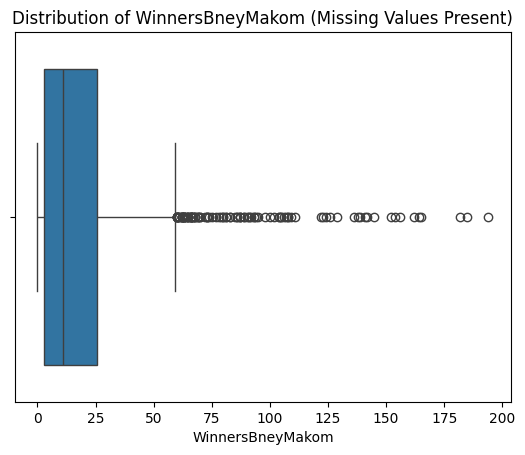

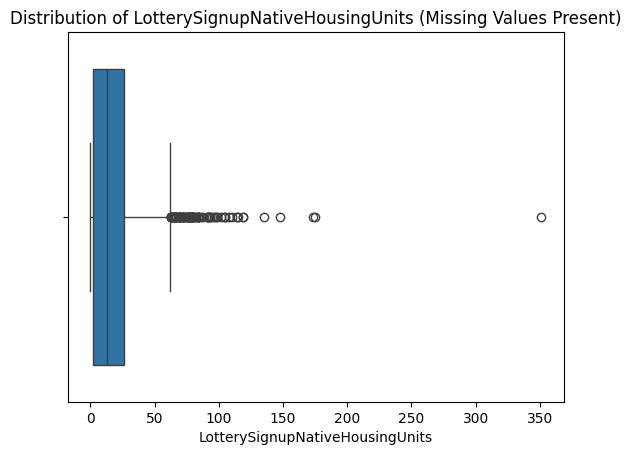

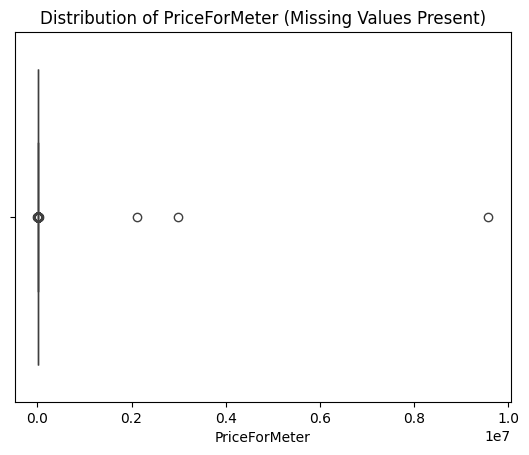

C:\Users\admin\AppData\Local\Temp\ipykernel_18496\191916502.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=label, palette=custom_colors)


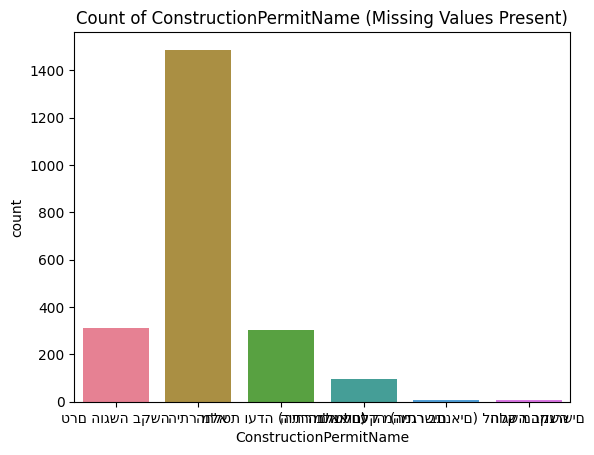

C:\Users\admin\AppData\Local\Temp\ipykernel_18496\191916502.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=label, palette=custom_colors)


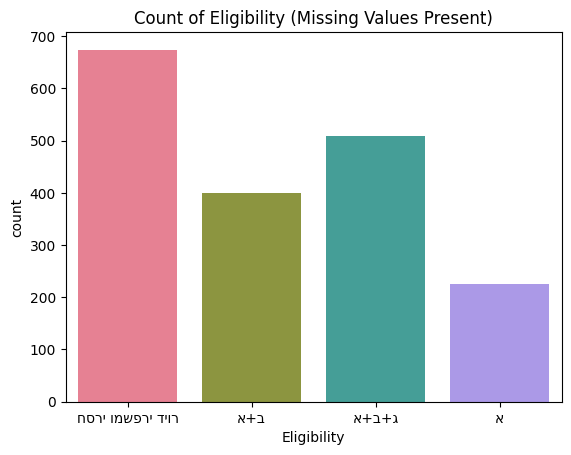

In [25]:
plot_missing(data)

In [26]:
#we can see that for the numeric columns we have many outliers therefore we will fill with the median
#for the categorial columns we will fill with the most frequent value
obj_cols = data.select_dtypes(include='object').columns
for col in obj_cols:
    most_frequent = data[col].mode()[0]
    data[col].fillna(most_frequent, inplace=True)

for i in data.index:
    data['WinnersBneyMakom']=data['WinnersBneyMakom'].fillna(min([data['WinnersBneyMakom'].median(),data.loc[i,'Winners']]))

for i in data.index:
    data['LotterySignupNativeHousingUnits']=data['LotterySignupNativeHousingUnits'].fillna(min([data['LotterySignupNativeHousingUnits'].median(),data.loc[i,'LotterySignupHousingUnits']]))
    
data['PriceForMeter']=data['PriceForMeter'].fillna(data['PriceForMeter'].median())




C:\Users\admin\AppData\Local\Temp\ipykernel_18496\2096423742.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(most_frequent, inplace=True)


In [27]:
data[data['WinnersBneyMakom']>data['Winners']]

WinnersMeshapryDiur  WinnersHasryDiur  WinnersSeriesC  WinnersSeriesB  \
394                    0                 9               0               0   
414                    0                 5               0               0   
415                    0                10               0               0   
633                    0                 8               0               0   

     WinnersSeriesA  WinnersBneyMakom  Winners  SubscribersMeshapryDiur  \
394               9              11.0        9                        0   
414               5              11.0        5                        0   
415              10              11.0       10                        0   
633               8              11.0        8                        0   

     SubscribersSeriesC  SubscribersSeriesB  ...  LotteryExecutionDate  \
394                   0                   0  ...   2022-07-25 20:42:46   
414                   0                   0  ...   2022-07-25 18:16:20   
415                   0                   0  ...   2022-07-25 18:09:21   
633                   0                   0  ...   2022-04-26 13:06:56   

     LotteryEndSignupDate  LotteryStatusValue       Eligibility  MarketingRep  \
394            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
414            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
415            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
633            2022-10-04       פורסמו תוצאות             א+ב+ג         משב"ש   

     MarketingMethodDesc  MarketingMethod    CentralizationType  LotteryType  \
394          מחיר למשתכן               21             יולי 2022       ראשונה   
414          מחיר למשתכן               21             יולי 2022       ראשונה   
415          מחיר למשתכן               21             יולי 2022       ראשונה   
633          מחיר למשתכן               21  הגרלה גדולה מרץ 2022       ראשונה   

    LotteryId  
394      2104  
414      2084  
415      2083  
633      1844  

[4 rows x 37 columns]

In [28]:
data[data['LotterySignupNativeHousingUnits']>data['LotterySignupHousingUnits']]

WinnersMeshapryDiur  WinnersHasryDiur  WinnersSeriesC  WinnersSeriesB  \
25                     0                11               0               0   
270                    0                12               0               0   
394                    0                 9               0               0   
414                    0                 5               0               0   
415                    0                10               0               0   
416                    0                11               0               0   
417                    0                11               0               0   
524                    0                12               0               0   
633                    0                 8               0               0   

     WinnersSeriesA  WinnersBneyMakom  Winners  SubscribersMeshapryDiur  \
25               11              11.0       11                        0   
270              12              11.0       12                        0   
394               9              11.0        9                        0   
414               5              11.0        5                        0   
415              10              11.0       10                        0   
416              11              11.0       11                        0   
417              11              11.0       11                        0   
524              12              11.0       12                        0   
633               8              11.0        8                        0   

     SubscribersSeriesC  SubscribersSeriesB  ...  LotteryExecutionDate  \
25                    0                   0  ...   2024-11-11 13:26:29   
270                   0                   0  ...   2023-01-16 17:03:22   
394                   0                   0  ...   2022-07-25 20:42:46   
414                   0                   0  ...   2022-07-25 18:16:20   
415                   0                   0  ...   2022-07-25 18:09:21   
416                   0                   0  ...   2022-07-25 18:04:31   
417                   0                   0  ...   2022-07-25 18:00:13   
524                   0                   0  ...   2022-04-28 13:11:49   
633                   0                   0  ...   2022-04-26 13:06:56   

     LotteryEndSignupDate  LotteryStatusValue       Eligibility  MarketingRep  \
25             2024-03-11       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
270            2023-08-01       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
394            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
414            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
415            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
416            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
417            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
524            2022-10-04       פורסמו תוצאות             א+ב+ג         משב"ש   
633            2022-10-04       פורסמו תוצאות             א+ב+ג         משב"ש   

     MarketingMethodDesc  MarketingMethod         CentralizationType  \
25           מחיר למשתכן               23  הגרלה גדולה - ספטמבר 2024   
270          מחיר למשתכן               23           הגרלת דצמבר 2022   
394          מחיר למשתכן               21                  יולי 2022   
414          מחיר למשתכן               21                  יולי 2022   
415          מחיר למשתכן               21                  יולי 2022   
416          מחיר למשתכן               21                  יולי 2022   
417          מחיר למשתכן               21                  יולי 2022   
524          מחיר למשתכן               21       הגרלה גדולה מרץ 2022   
633          מחיר למשתכן               21       הגרלה גדולה מרץ 2022   

     LotteryType LotteryId  
25        ראשונה      2478  
270       ראשונה      2229  
394       ראשונה      2104  
414       ראשונה      2084  
415       ראשונה      2083  
416       ראשונה      2082

# Handle outliers

firs of all as we can see from the data above there is some impossible rows in the data where for example Winners value isn't the biggest one out of all the winners columns.
lets handle that

In [29]:
rows_not_greater = data[data[['WinnersMeshapryDiur', 'WinnersHasryDiur', 'WinnersSeriesC',
       'WinnersSeriesB', 'WinnersSeriesA', 'WinnersBneyMakom']].gt(data['Winners'], axis=0).any(axis=1)]

In [30]:
rows_not_greater

WinnersMeshapryDiur  WinnersHasryDiur  WinnersSeriesC  WinnersSeriesB  \
394                    0                 9               0               0   
414                    0                 5               0               0   
415                    0                10               0               0   
633                    0                 8               0               0   

     WinnersSeriesA  WinnersBneyMakom  Winners  SubscribersMeshapryDiur  \
394               9              11.0        9                        0   
414               5              11.0        5                        0   
415              10              11.0       10                        0   
633               8              11.0        8                        0   

     SubscribersSeriesC  SubscribersSeriesB  ...  LotteryExecutionDate  \
394                   0                   0  ...   2022-07-25 20:42:46   
414                   0                   0  ...   2022-07-25 18:16:20   
415                   0                   0  ...   2022-07-25 18:09:21   
633                   0                   0  ...   2022-04-26 13:06:56   

     LotteryEndSignupDate  LotteryStatusValue       Eligibility  MarketingRep  \
394            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
414            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
415            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
633            2022-10-04       פורסמו תוצאות             א+ב+ג         משב"ש   

     MarketingMethodDesc  MarketingMethod    CentralizationType  LotteryType  \
394          מחיר למשתכן               21             יולי 2022       ראשונה   
414          מחיר למשתכן               21             יולי 2022       ראשונה   
415          מחיר למשתכן               21             יולי 2022       ראשונה   
633          מחיר למשתכן               21  הגרלה גדולה מרץ 2022       ראשונה   

    LotteryId  
394      2104  
414      2084  
415      2083  
633      1844  

[4 rows x 37 columns]

In [31]:
data=data.drop(rows_not_greater.index,axis=0)

In [32]:
data.columns

Index(['WinnersMeshapryDiur', 'WinnersHasryDiur', 'WinnersSeriesC',
       'WinnersSeriesB', 'WinnersSeriesA', 'WinnersBneyMakom', 'Winners',
       'SubscribersMeshapryDiur', 'SubscribersSeriesC', 'SubscribersSeriesB',
       'SubscribersSeriesA', 'SubscribersDisabled', 'SubscribersBenyMakom',
       'Subscribers', 'LotteryNativeHousingUnits', 'LotteryHousingUnits',
       'LotterySignupNativeHousingUnits', 'LotterySignupHousingUnits',
       'PriceForMeter', 'ConstructionPermitName', 'ProjectStatus',
       'ProviderName', 'ProjectName', 'ProjectId', 'Neighborhood', 'LamasName',
       'LamasCode', 'LotteryExecutionDate', 'LotteryEndSignupDate',
       'LotteryStatusValue', 'Eligibility', 'MarketingRep',
       'MarketingMethodDesc', 'MarketingMethod', 'CentralizationType',
       'LotteryType', 'LotteryId'],
      dtype='object')

In [33]:
rows_not_greater = data[data[['SubscribersMeshapryDiur', 'SubscribersSeriesC', 'SubscribersSeriesB',
       'SubscribersSeriesA', 'SubscribersDisabled', 'SubscribersBenyMakom']].gt(data['Subscribers'], axis=0).any(axis=1)]

In [34]:
rows_not_greater

Empty DataFrame
Columns: [WinnersMeshapryDiur, WinnersHasryDiur, WinnersSeriesC, WinnersSeriesB, WinnersSeriesA, WinnersBneyMakom, Winners, SubscribersMeshapryDiur, SubscribersSeriesC, SubscribersSeriesB, SubscribersSeriesA, SubscribersDisabled, SubscribersBenyMakom, Subscribers, LotteryNativeHousingUnits, LotteryHousingUnits, LotterySignupNativeHousingUnits, LotterySignupHousingUnits, PriceForMeter, ConstructionPermitName, ProjectStatus, ProviderName, ProjectName, ProjectId, Neighborhood, LamasName, LamasCode, LotteryExecutionDate, LotteryEndSignupDate, LotteryStatusValue, Eligibility, MarketingRep, MarketingMethodDesc, MarketingMethod, CentralizationType, LotteryType, LotteryId]
Index: []

[0 rows x 37 columns]

In [35]:
rows_not_greater = data[data[['LotteryNativeHousingUnits']].gt(data['LotteryHousingUnits'], axis=0).any(axis=1)]

In [36]:
rows_not_greater[['LotteryHousingUnits','LotteryNativeHousingUnits']]

LotteryHousingUnits  LotteryNativeHousingUnits
2035                   56                         92

In [37]:
data=data.drop(2035,axis=0)

In [38]:
rows_not_greater = data[data[['LotterySignupNativeHousingUnits']].gt(data['LotterySignupHousingUnits'], axis=0).any(axis=1)]

In [39]:
rows_not_greater[['LotterySignupNativeHousingUnits','LotterySignupHousingUnits']]

LotterySignupNativeHousingUnits  LotterySignupHousingUnits
25                              13.0                         11
270                             13.0                         12
416                             13.0                         11
417                             13.0                         11
524                             13.0                         12

In [40]:
data=data.drop(rows_not_greater.index,axis=0)

In [41]:
#lets see the distributions of our columns to detect outliers
def plot_everything(data):
    num_cols = data.select_dtypes(include=np.number).columns.tolist()
    obj_cols = data.select_dtypes(include=object).columns.tolist()
    

    for label in num_cols:
        sns.boxplot(data=data, x=label)
        plt.title(f"Distribution of {label}")
        plt.show()
        
    for label in num_cols:
        sns.histplot(data=data, x=label)
        plt.title(f"Distribution of {label}")
        plt.show()

    for label in obj_cols:
        # מספר הקטגוריות בנתונים
        num_categories = data[label].nunique()
        if num_categories<=10:
            # יצירת פלטת צבעים דינמית בהתאמה למספר הקטגוריות
            custom_colors = sns.color_palette("husl", num_categories)  # "husl" נותן צבעים מגוונים
            sns.countplot(data=data, x=label, palette=custom_colors)
            plt.title(f"Count of {label}")
            plt.show()
    

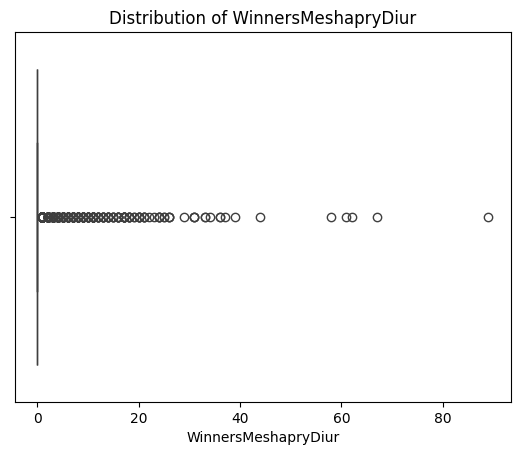

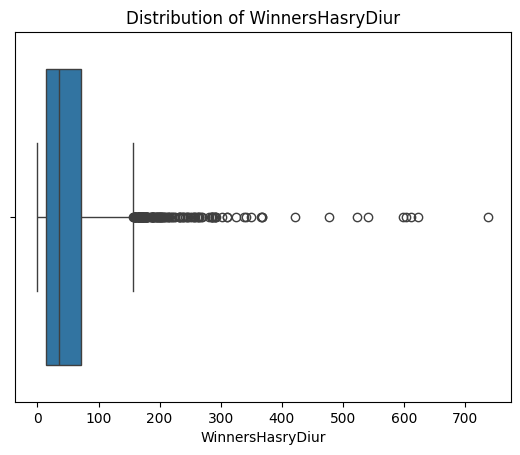

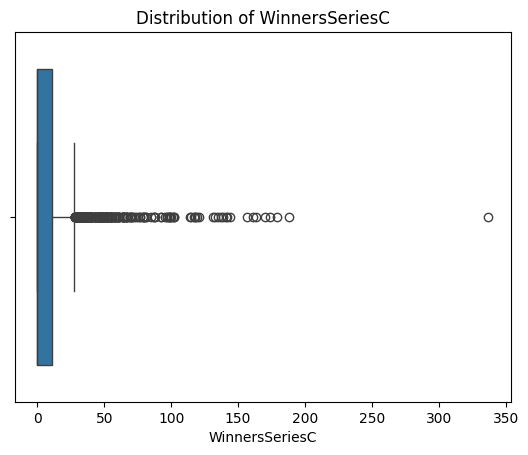

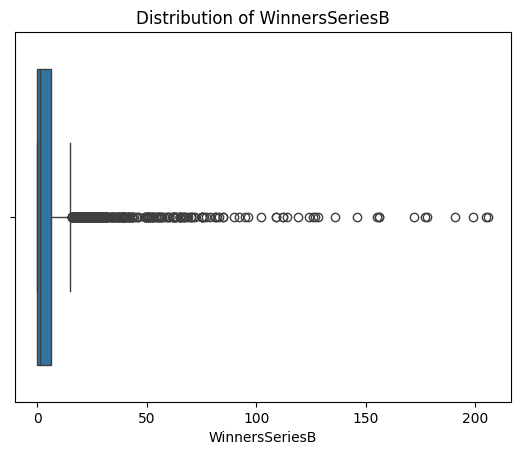

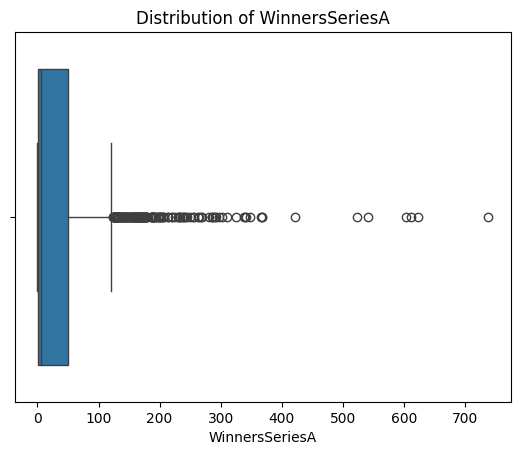

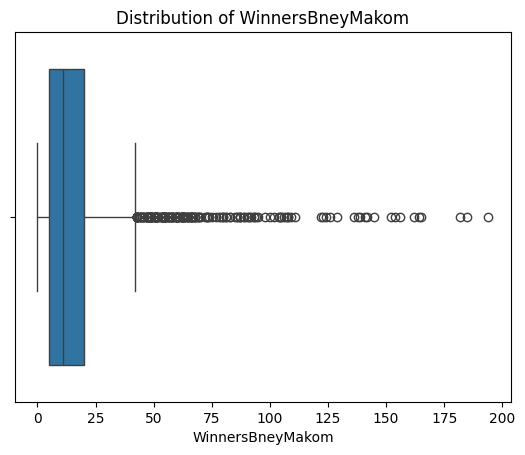

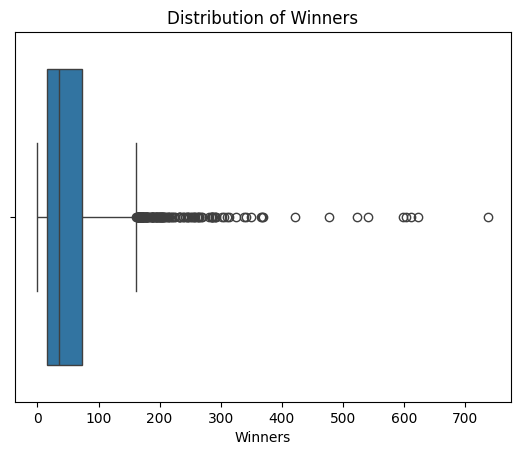

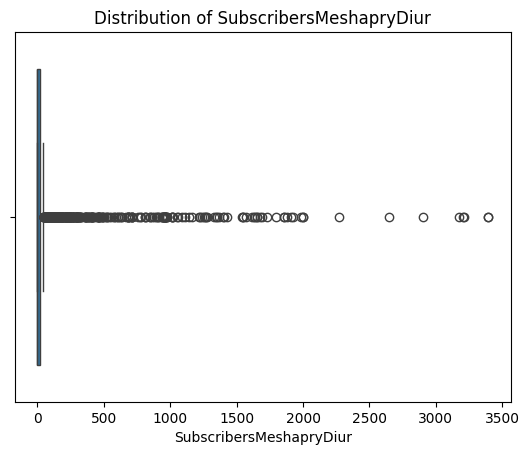

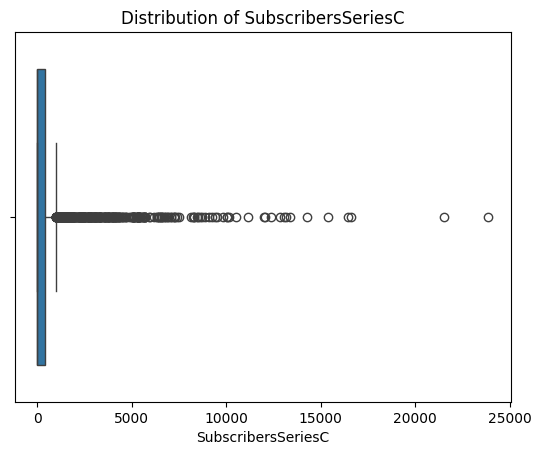

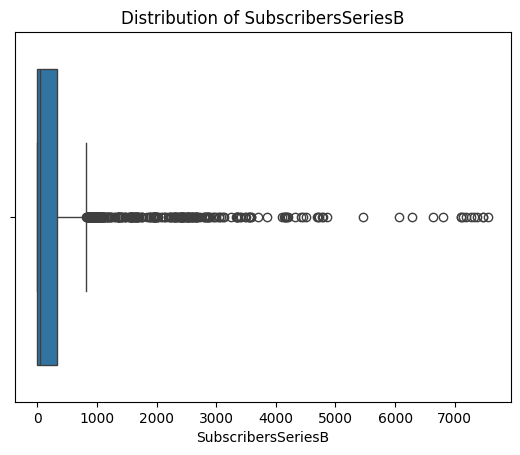

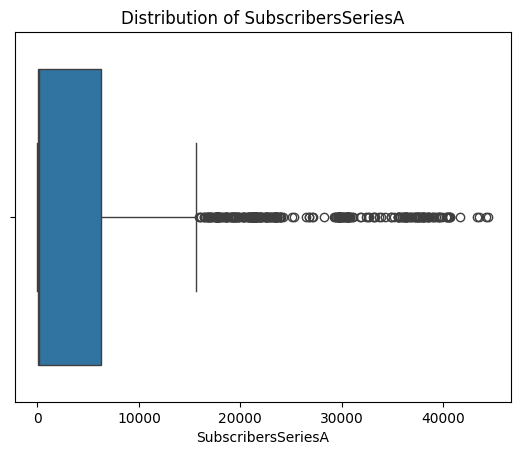

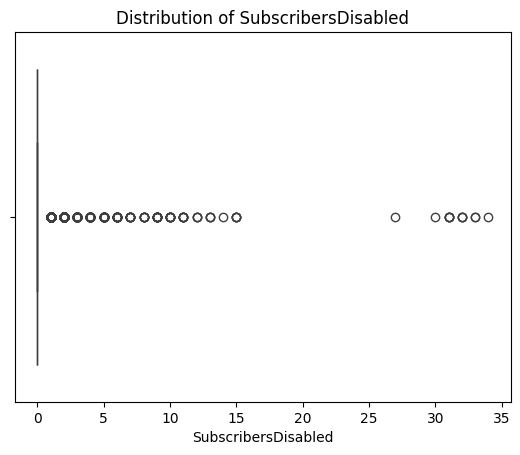

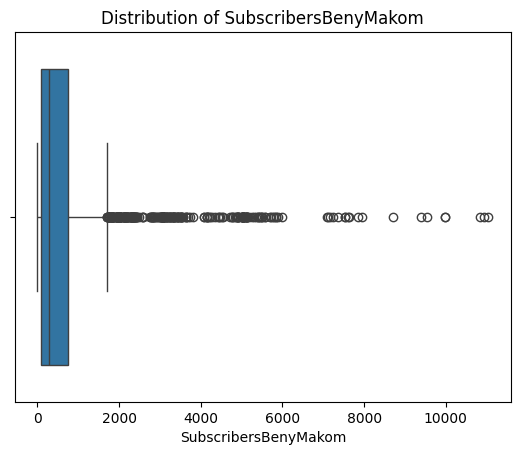

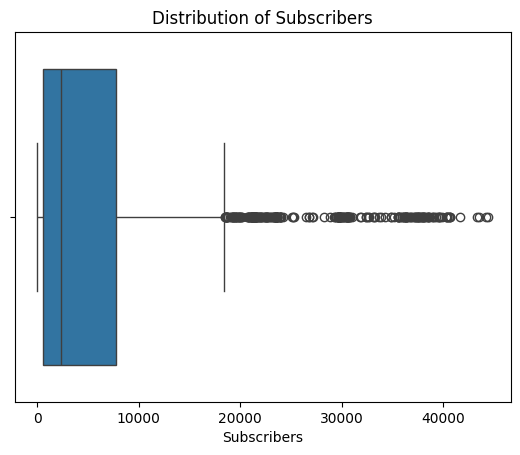

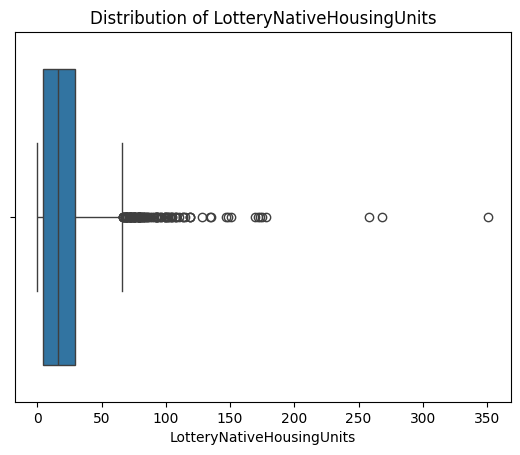

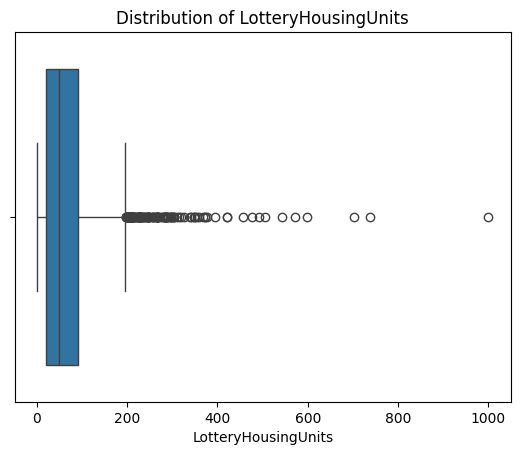

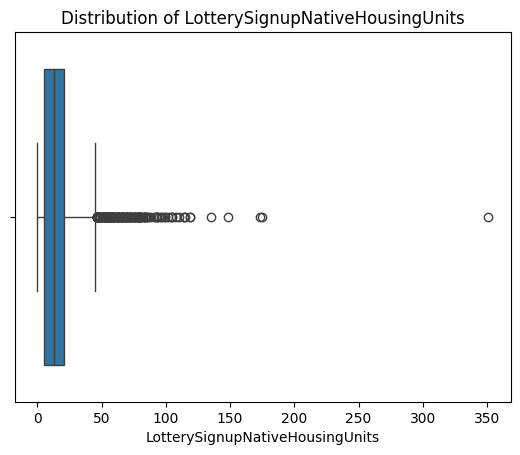

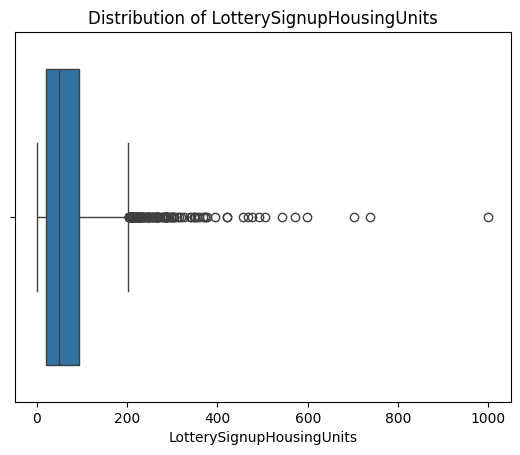

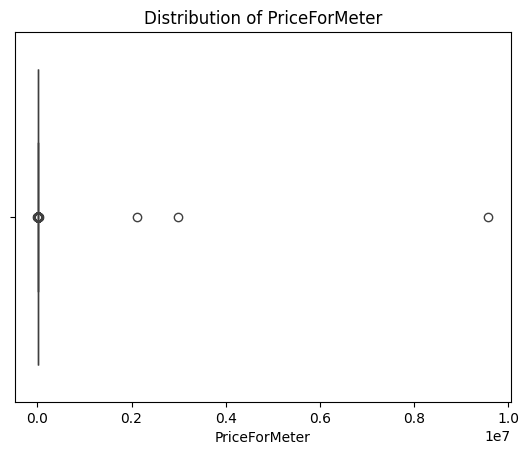

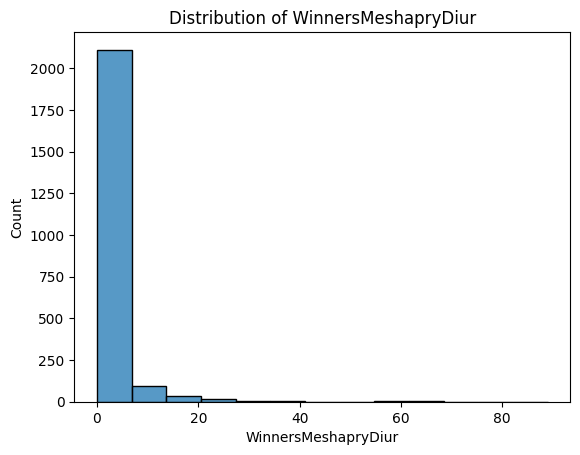

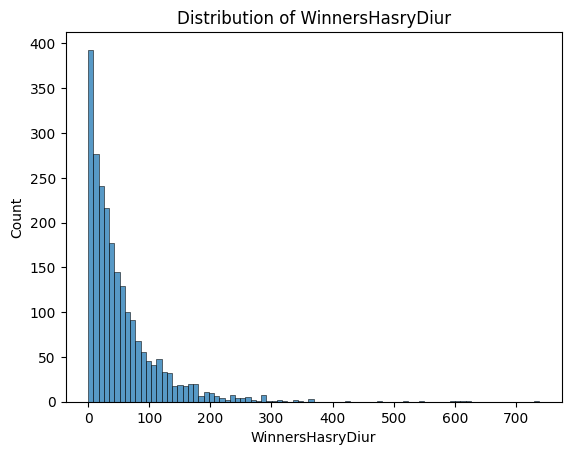

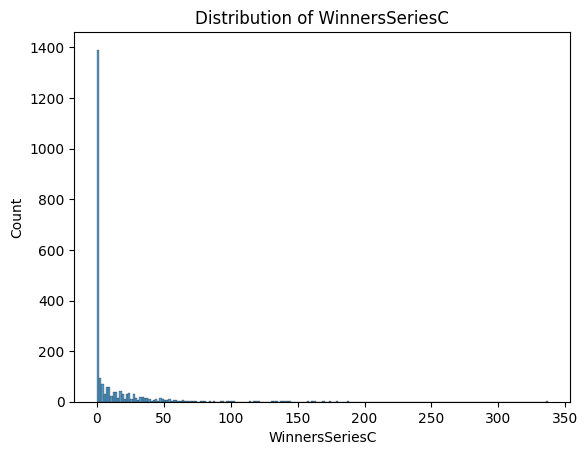

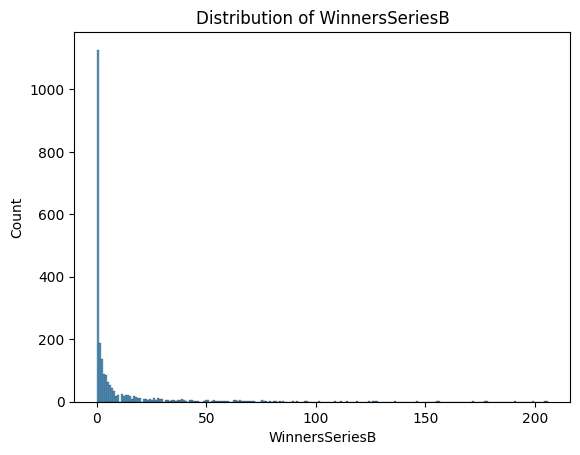

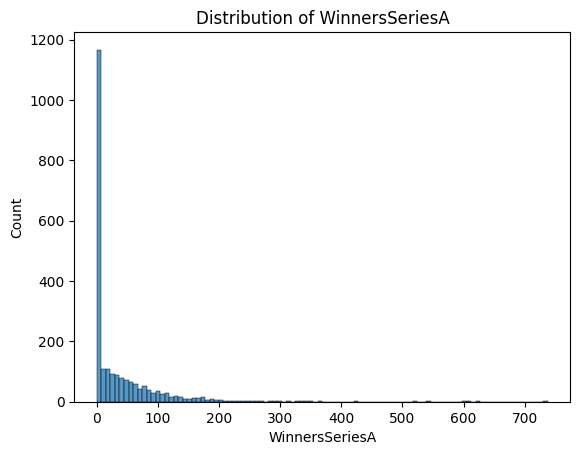

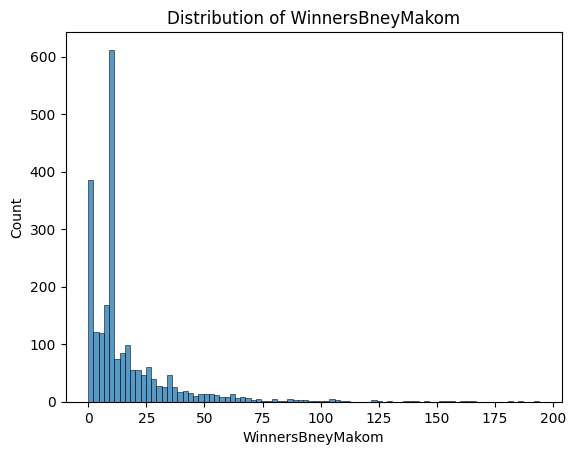

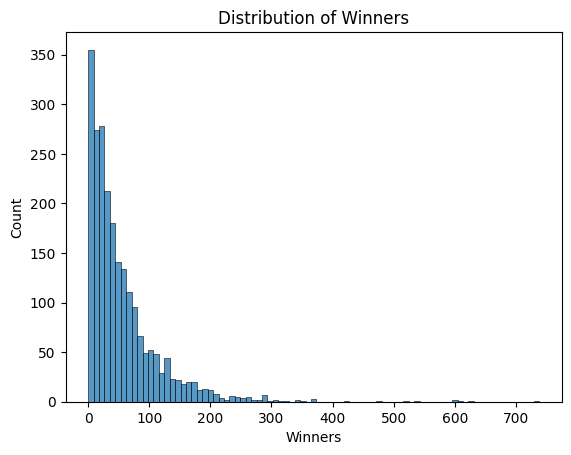

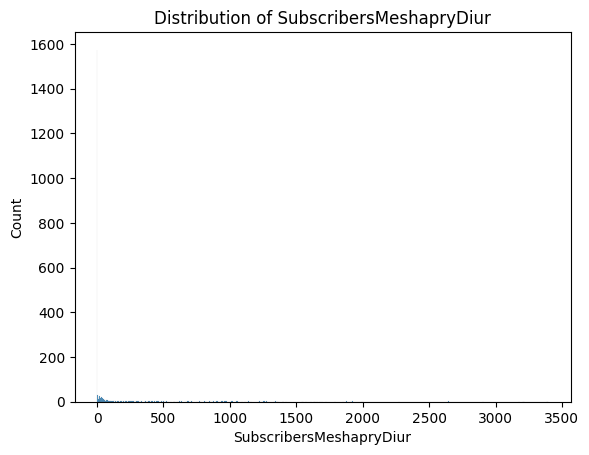

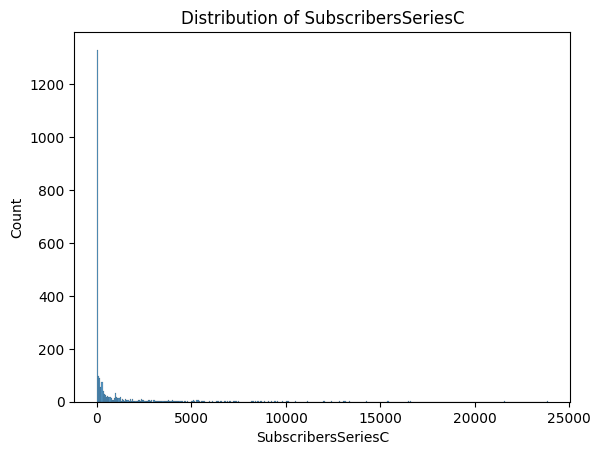

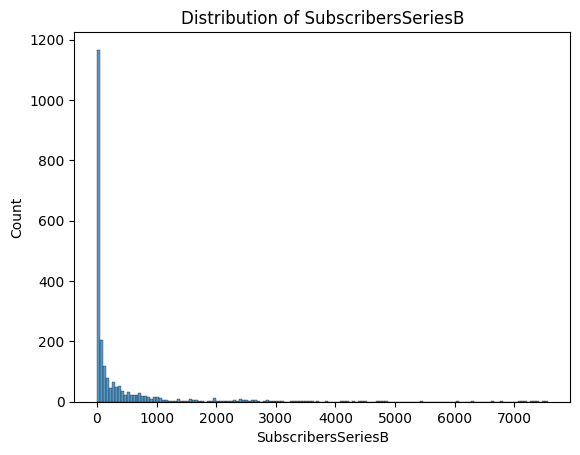

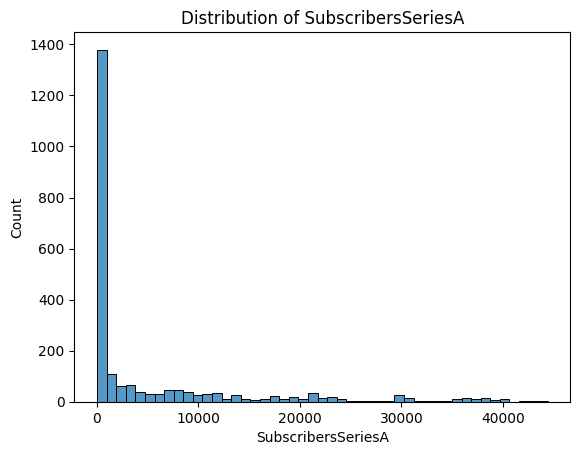

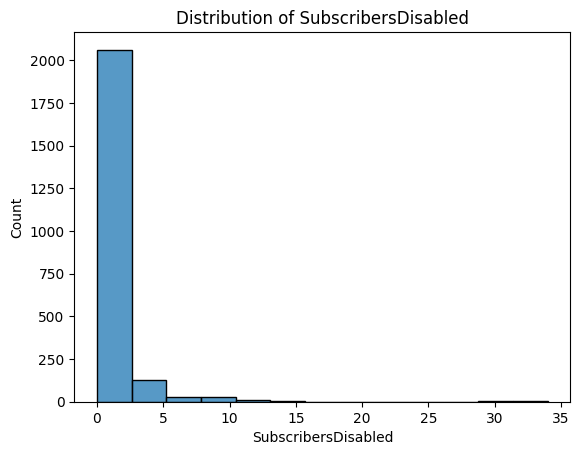

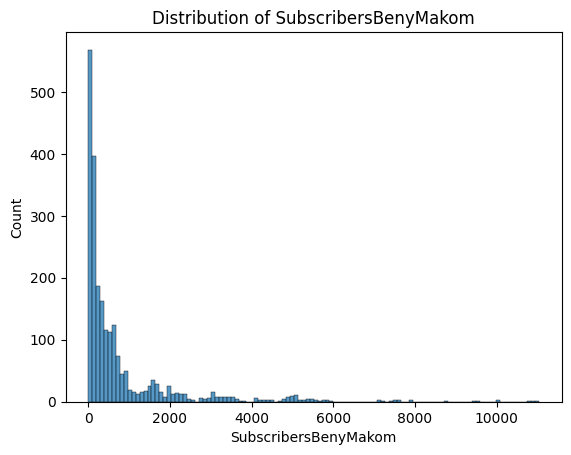

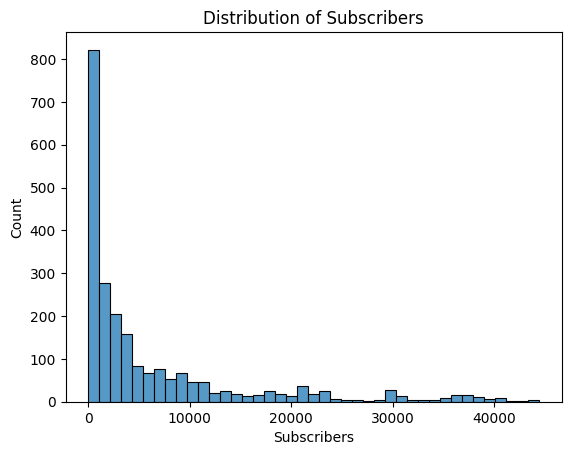

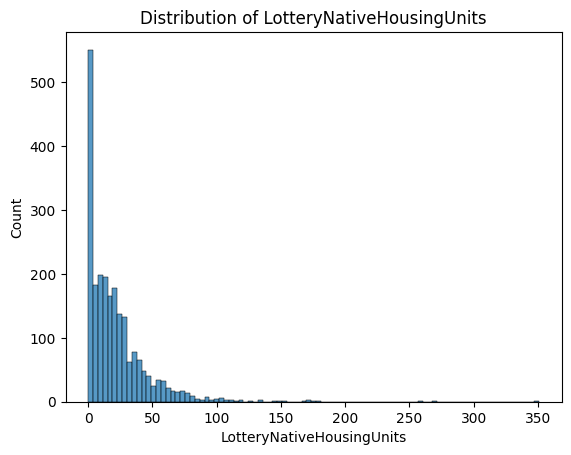

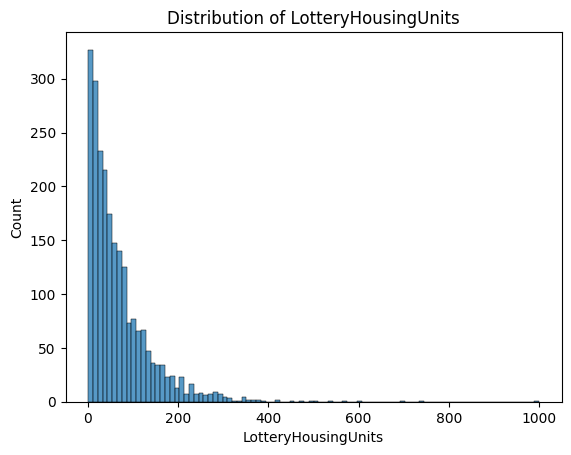

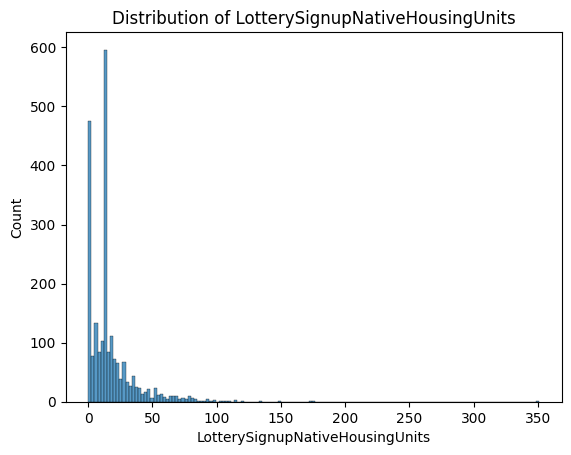

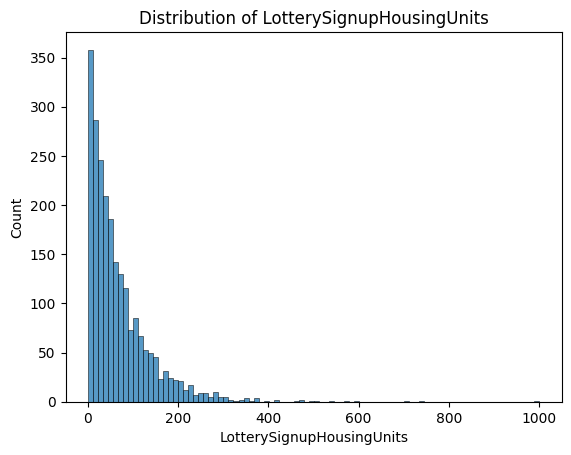

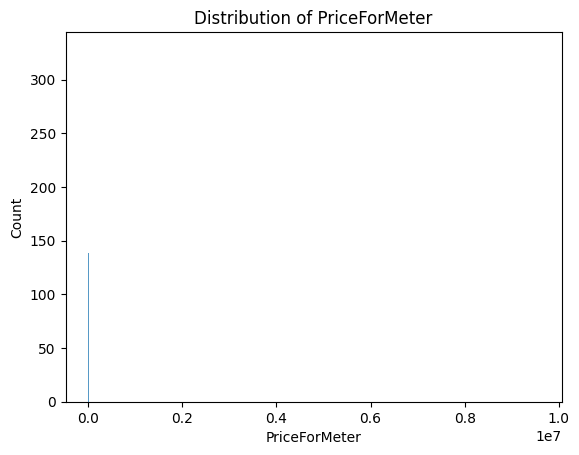

C:\Users\admin\AppData\Local\Temp\ipykernel_18496\2135285499.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=label, palette=custom_colors)


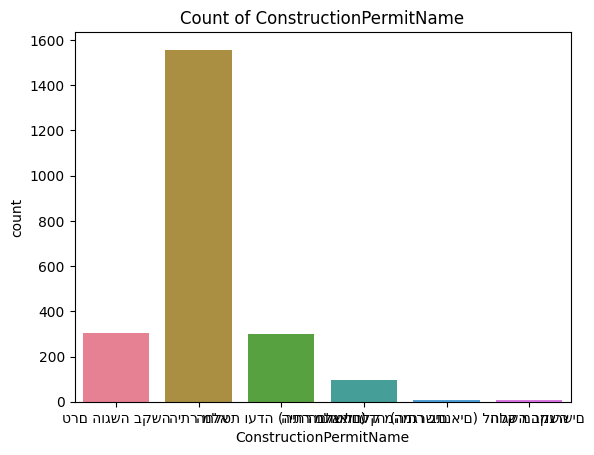

C:\Users\admin\AppData\Local\Temp\ipykernel_18496\2135285499.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=label, palette=custom_colors)


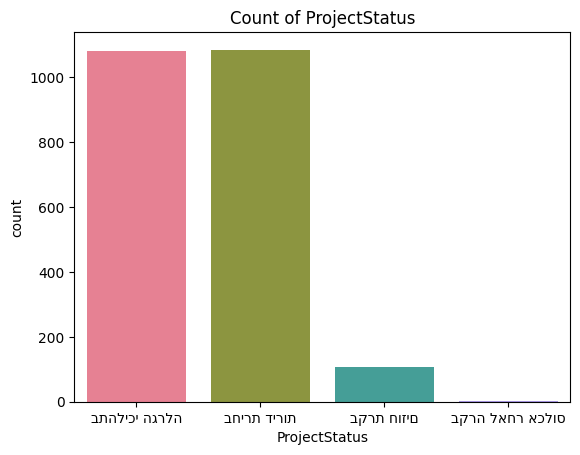

C:\Users\admin\AppData\Local\Temp\ipykernel_18496\2135285499.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=label, palette=custom_colors)


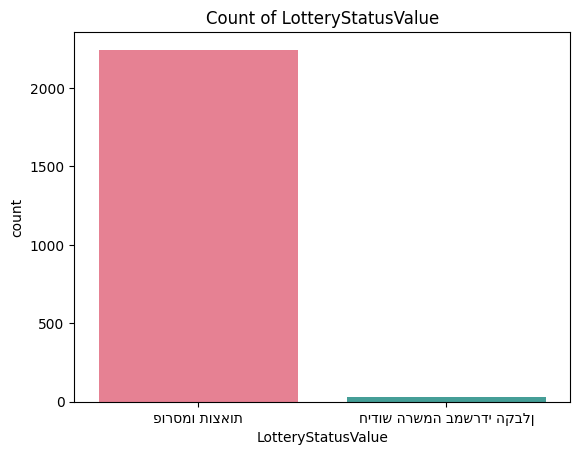

C:\Users\admin\AppData\Local\Temp\ipykernel_18496\2135285499.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=label, palette=custom_colors)


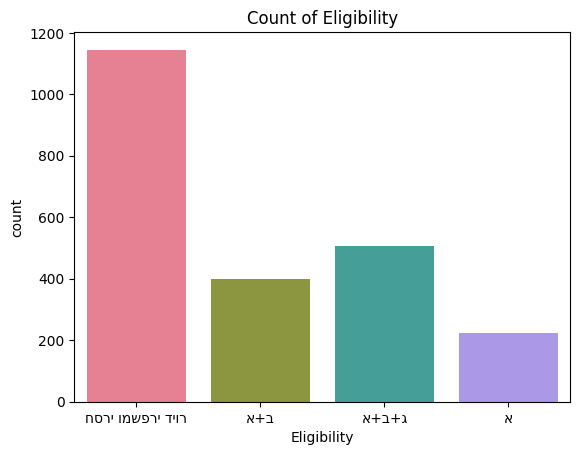

C:\Users\admin\AppData\Local\Temp\ipykernel_18496\2135285499.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=label, palette=custom_colors)


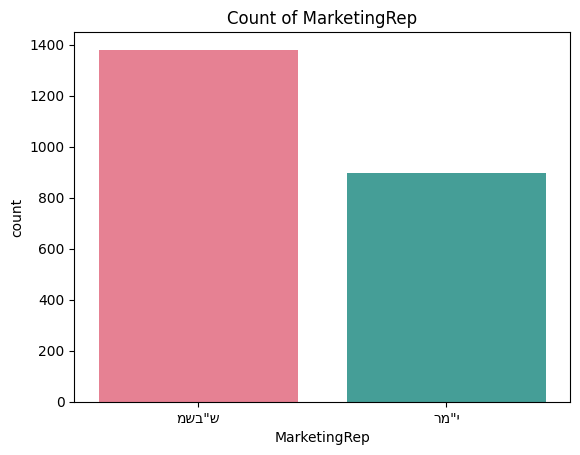

C:\Users\admin\AppData\Local\Temp\ipykernel_18496\2135285499.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=label, palette=custom_colors)


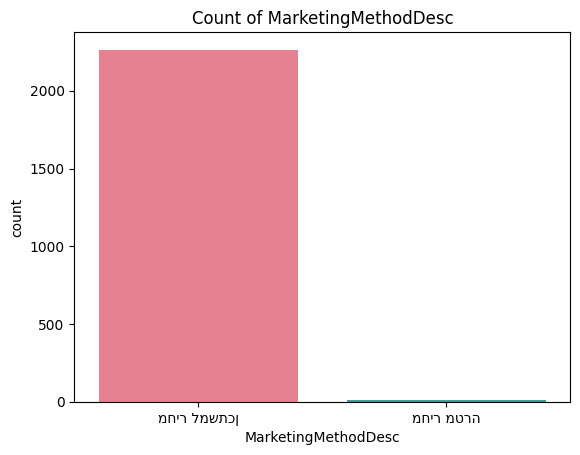

C:\Users\admin\AppData\Local\Temp\ipykernel_18496\2135285499.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=label, palette=custom_colors)


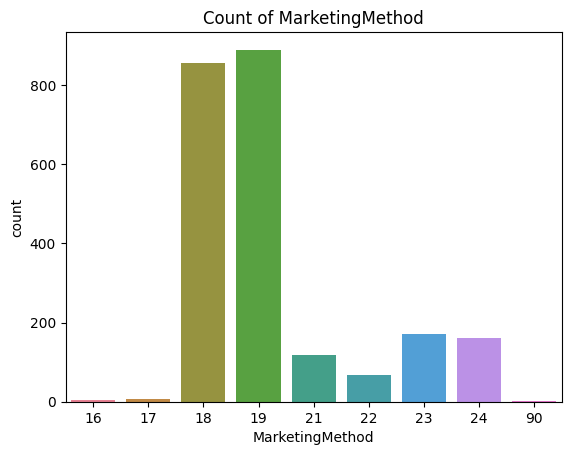

C:\Users\admin\AppData\Local\Temp\ipykernel_18496\2135285499.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=label, palette=custom_colors)


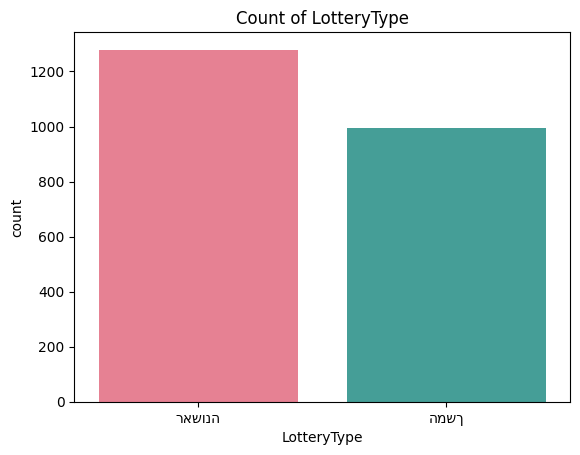

In [42]:
plot_everything(data)

we can clearly see we have outliers which we drastictly affect our data.
lets create now data which will not include outliers
for  that thing we will use IsolationForest, IQR and Z Score

In [43]:
num_cols=data.select_dtypes(include=[np.number]).columns

In [44]:
from scipy import stats
from sklearn.ensemble import IsolationForest

def remove_outliers(data, contamination=0.3):
    """
    Detect and remove outliers using Isolation Forest, Z-score, or IQR based on column characteristics.
    :param data: DataFrame with numeric columns
    :param contamination: Fraction of outliers in the data
    :return: DataFrame with outliers removed
    """
    clean_data = data.copy()

    # Iterate through all numeric columns
    for col in clean_data.select_dtypes(include=[np.number]).columns:
        column_data = clean_data[col].dropna()  # Make sure to drop NA values
        
        # Ensure the column contains only numeric data (convert if needed)
        if not pd.api.types.is_numeric_dtype(column_data):
            print(f"Column '{col}' contains non-numeric values. Skipping...")
            continue
        
        # Check if the column is normally distributed using the Shapiro-Wilk test
        try:
            stat, p_value = stats.shapiro(column_data)
            if p_value > 0.05:
                # The column is normally distributed, use Z-score to detect outliers
                z_scores = np.abs(stats.zscore(column_data))
                outliers_zscore = z_scores > 3  # Typically, Z > 3 indicates an outlier
                clean_data.loc[outliers_zscore, col] = np.nan  # Replace outliers with NaN
                print(f"Column '{col}' is normally distributed. Using Z-score for outliers.")
            else:
                # The column is not normally distributed, use IQR or Isolation Forest
                # Step 1: Use IQR to detect outliers
                Q1 = column_data.quantile(0.25)
                Q3 = column_data.quantile(0.75)
                IQR = Q3 - Q1
                outliers_iqr = (column_data < (Q1 - 1.5 * IQR)) | (column_data > (Q3 + 1.5 * IQR))
                clean_data.loc[outliers_iqr, col] = np.nan  # Replace outliers with NaN
                print(f"Column '{col}' is not normally distributed. Using IQR for outliers.")
                
                # Step 2: Use Isolation Forest to detect outliers (in case of extreme non-normal data)
                if clean_data[col].isnull().sum() < len(column_data) * 0.1:  # If more than 90% of values are non-missing
                    iso_forest = IsolationForest(contamination=contamination, random_state=42)
                    outliers_iforest = iso_forest.fit_predict(column_data.values.reshape(-1, 1)) == -1
                    clean_data.loc[outliers_iforest, col] = np.nan  # Replace outliers with NaN
                    print(f"Column '{col}' is being handled by Isolation Forest.")
        except ValueError:
            print(f"Shapiro-Wilk test failed for column '{col}' (likely due to insufficient data).")

    # Fill missing values after outlier removal (optional)
    clean_data.fillna(clean_data.mean(), inplace=True)

    return clean_data

    

In [45]:
no_outliers=remove_outliers(data[num_cols])

Column 'WinnersMeshapryDiur' is not normally distributed. Using IQR for outliers.
Column 'WinnersHasryDiur' is not normally distributed. Using IQR for outliers.
Column 'WinnersHasryDiur' is being handled by Isolation Forest.
Column 'WinnersSeriesC' is not normally distributed. Using IQR for outliers.
Column 'WinnersSeriesB' is not normally distributed. Using IQR for outliers.
Column 'WinnersSeriesA' is not normally distributed. Using IQR for outliers.
Column 'WinnersSeriesA' is being handled by Isolation Forest.
Column 'WinnersBneyMakom' is not normally distributed. Using IQR for outliers.
Column 'WinnersBneyMakom' is being handled by Isolation Forest.
Column 'Winners' is not normally distributed. Using IQR for outliers.
Column 'Winners' is being handled by Isolation Forest.
Column 'SubscribersMeshapryDiur' is not normally distributed. Using IQR for outliers.
Column 'SubscribersSeriesC' is not normally distributed. Using IQR for outliers.
Column 'SubscribersSeriesB' is not normally dis

In [46]:
len(no_outliers)

2275

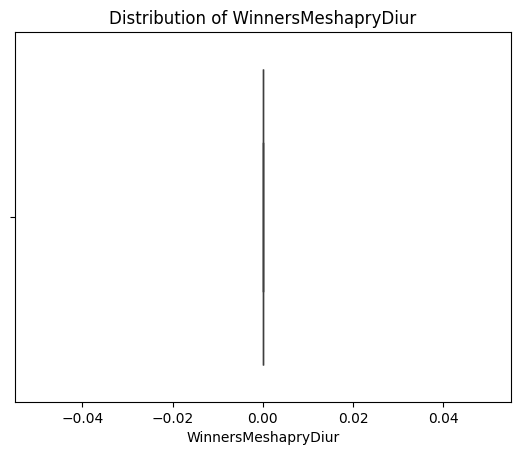

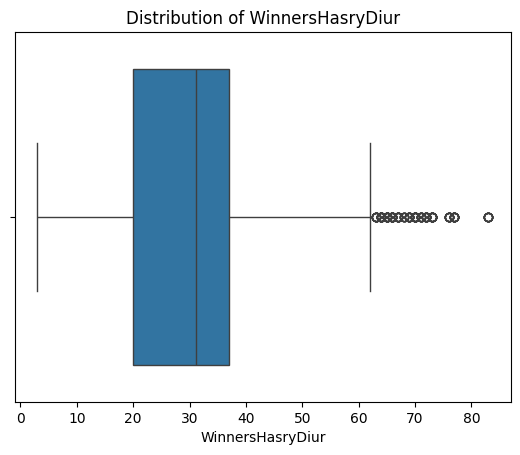

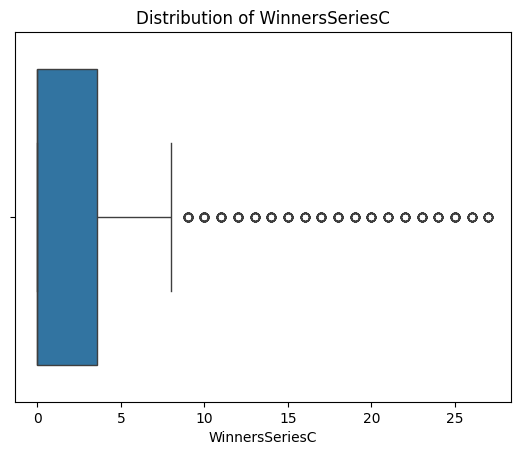

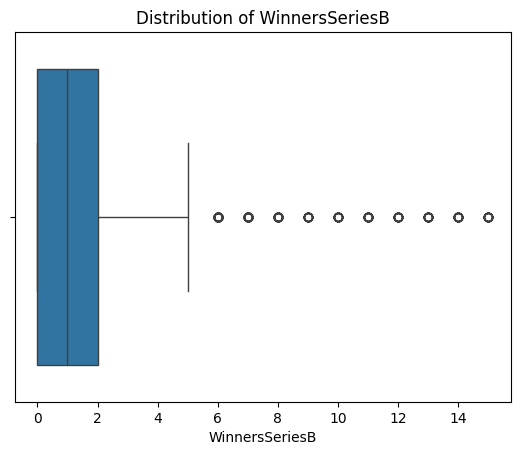

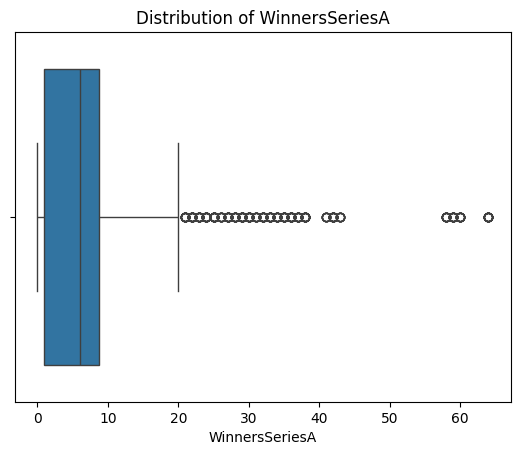

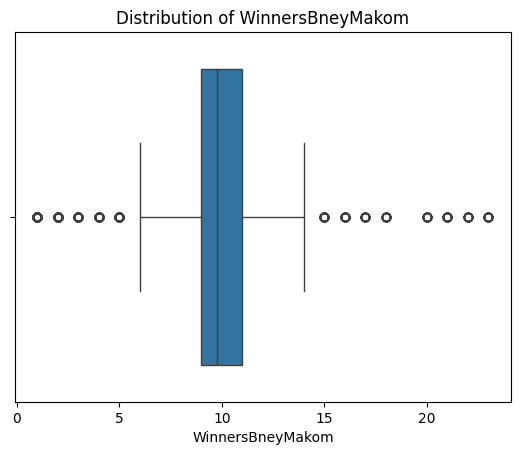

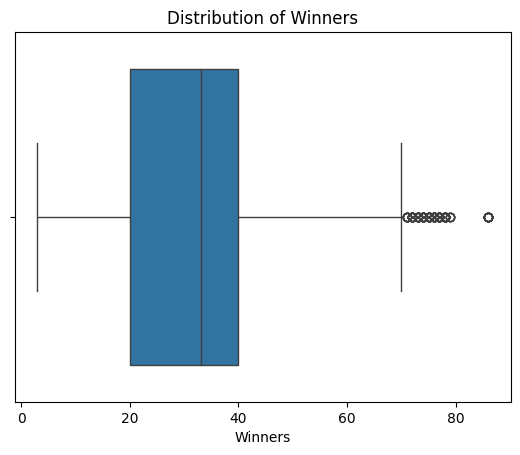

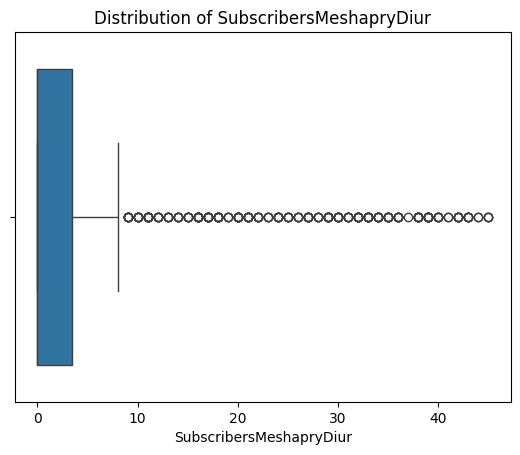

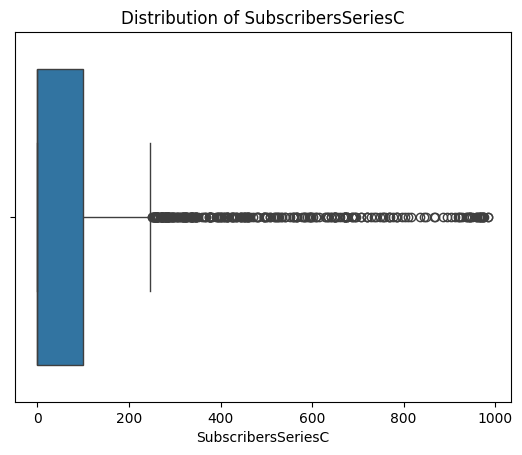

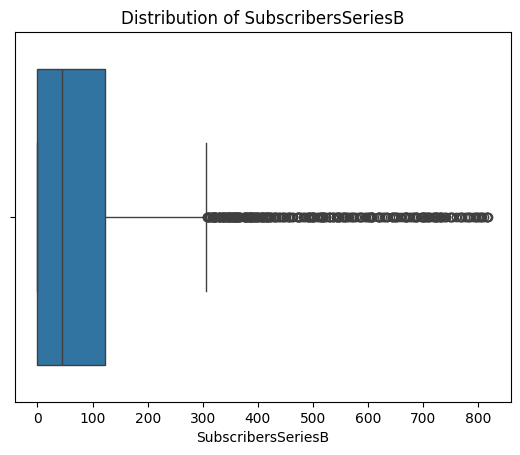

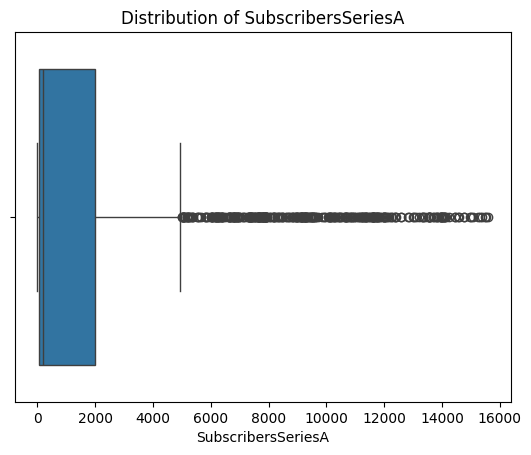

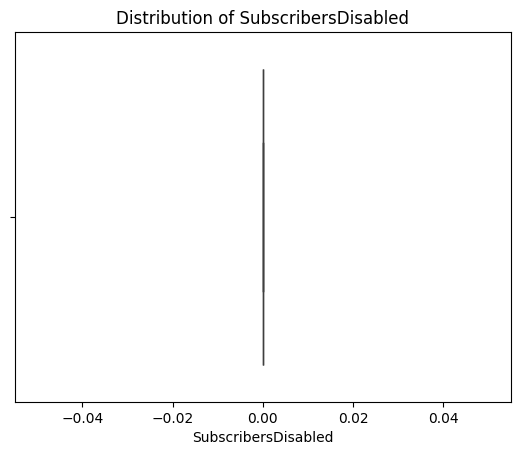

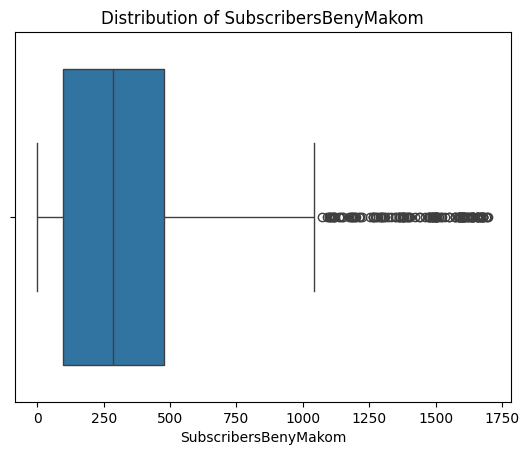

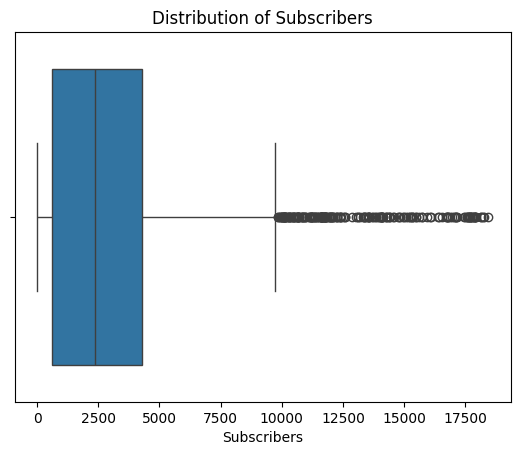

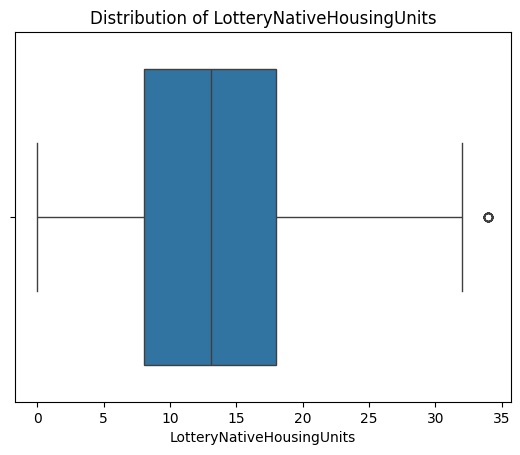

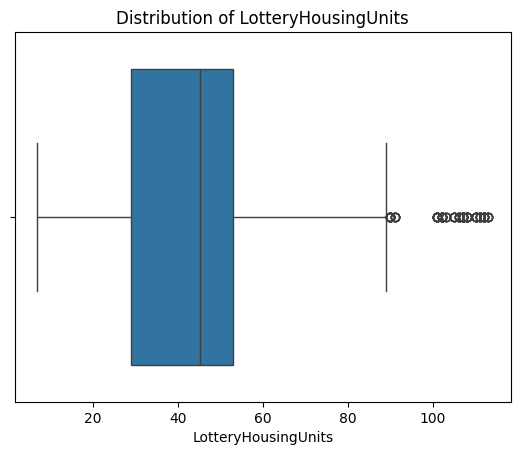

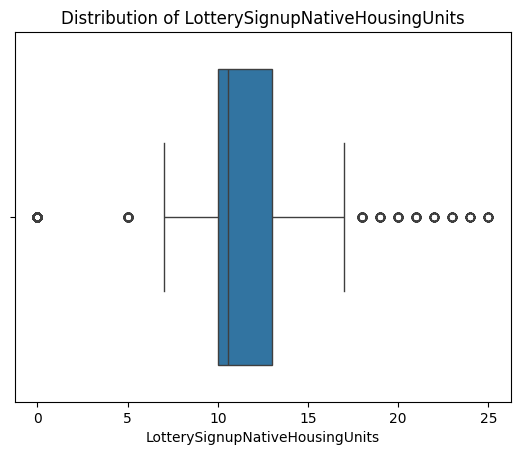

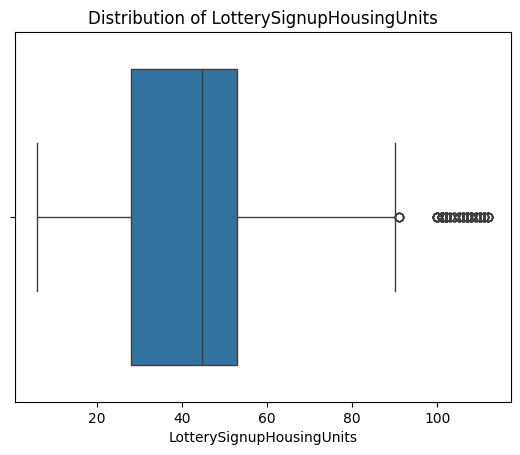

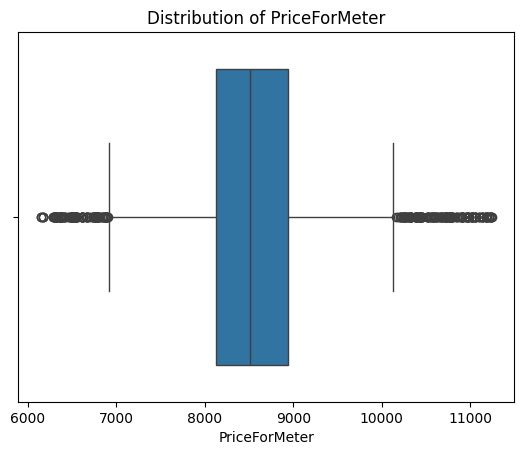

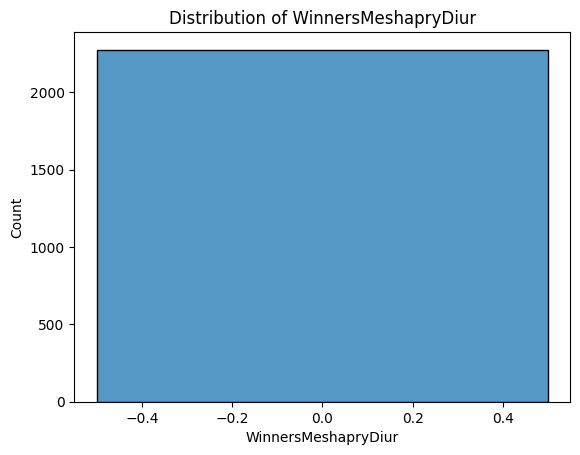

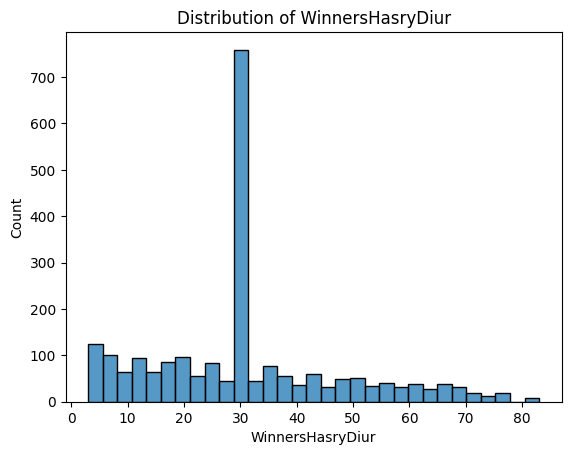

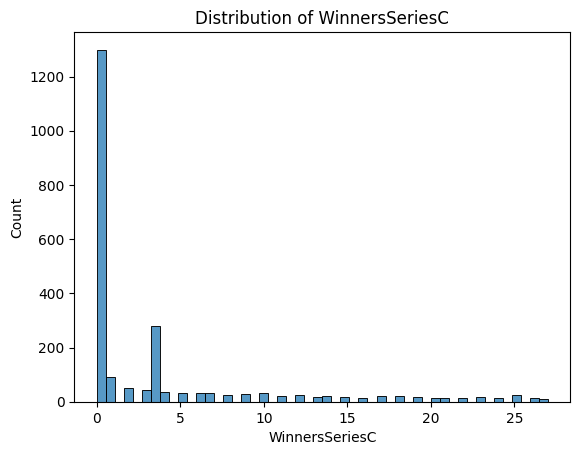

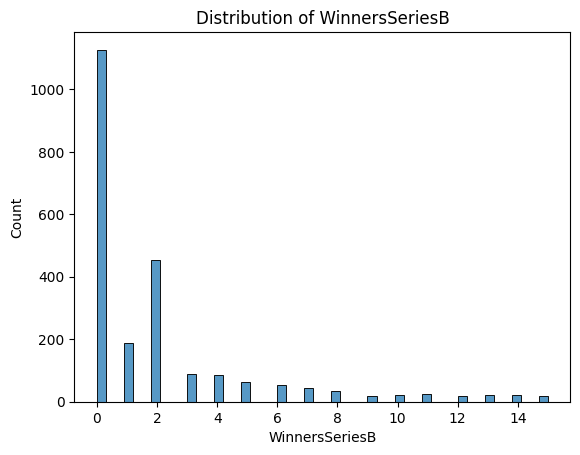

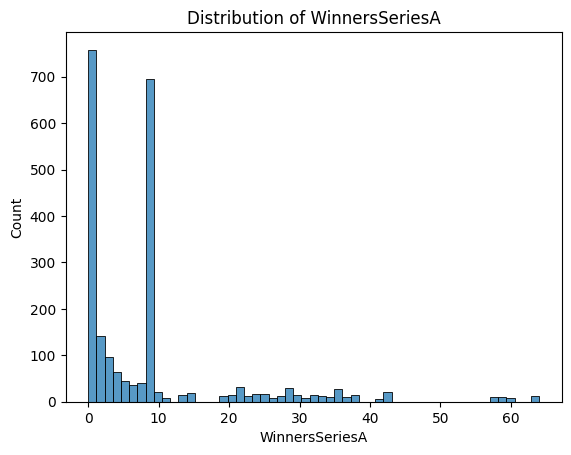

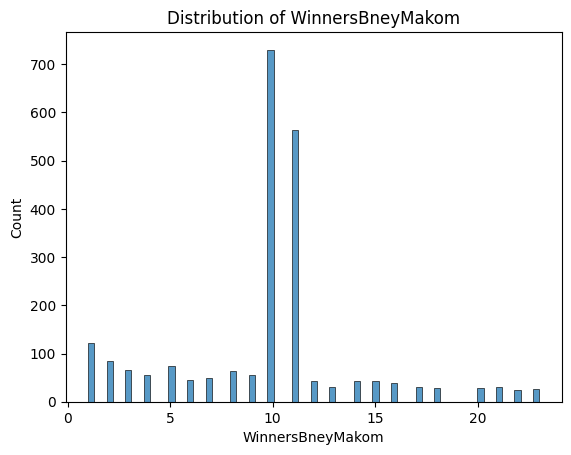

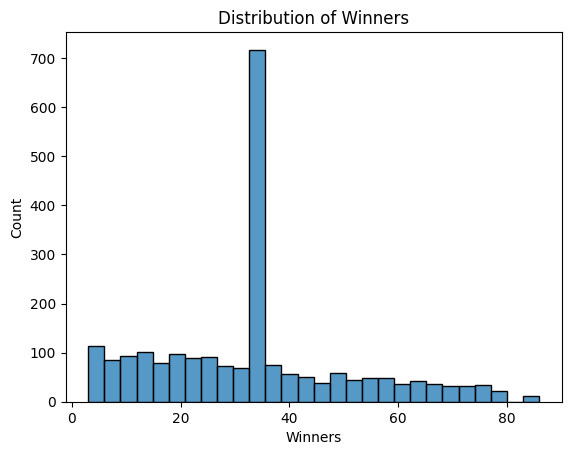

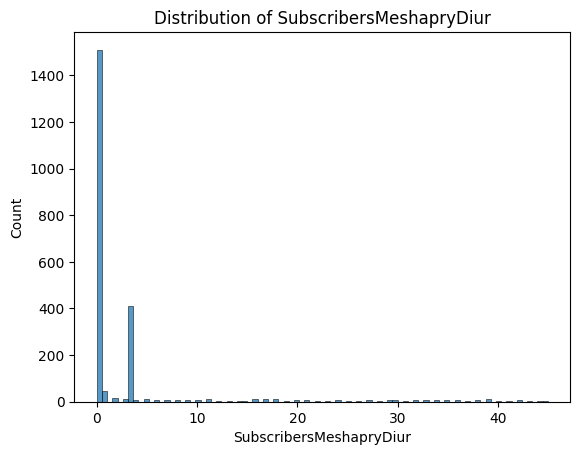

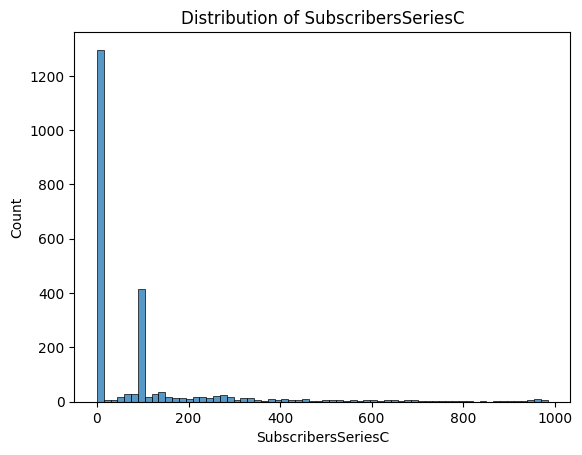

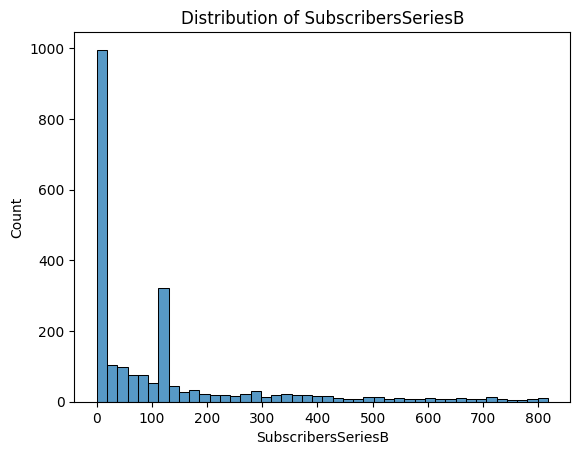

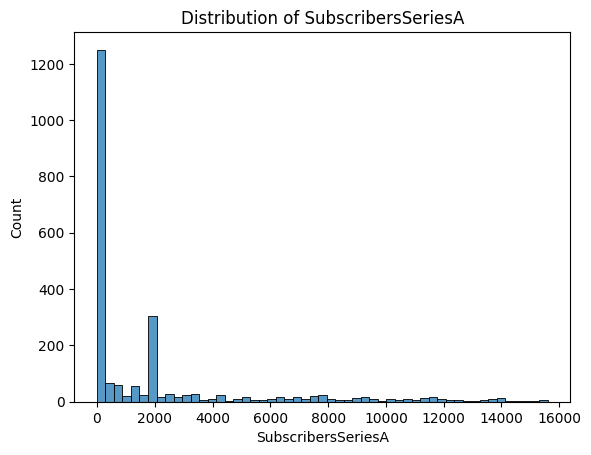

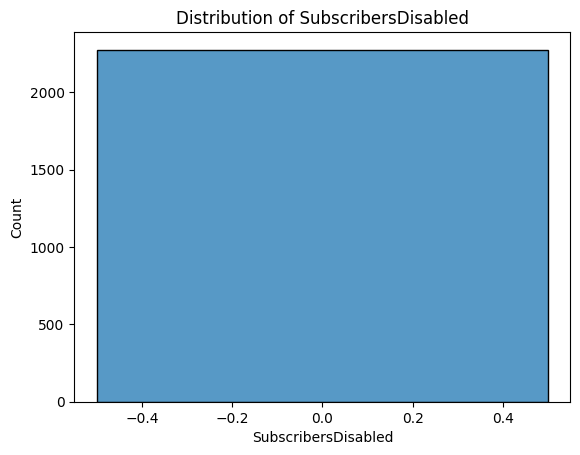

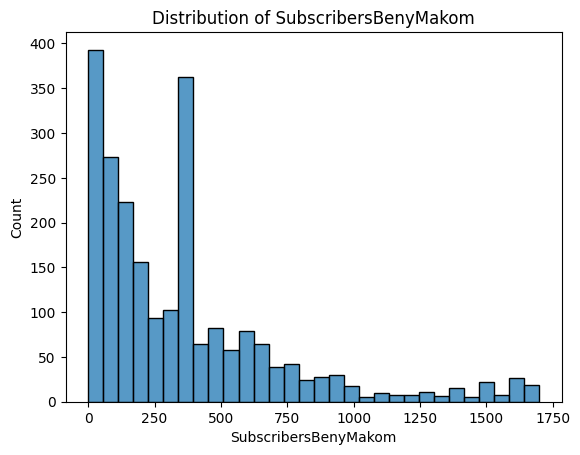

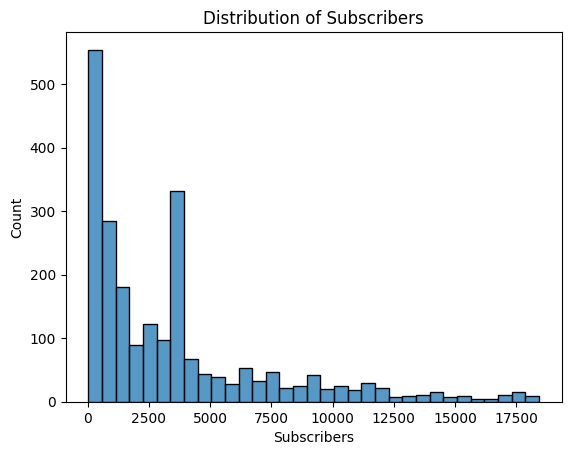

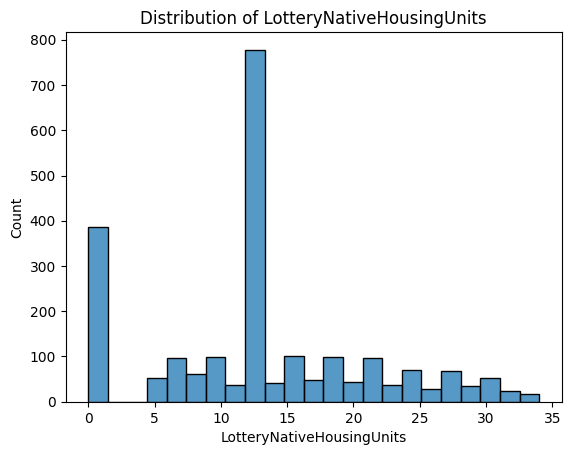

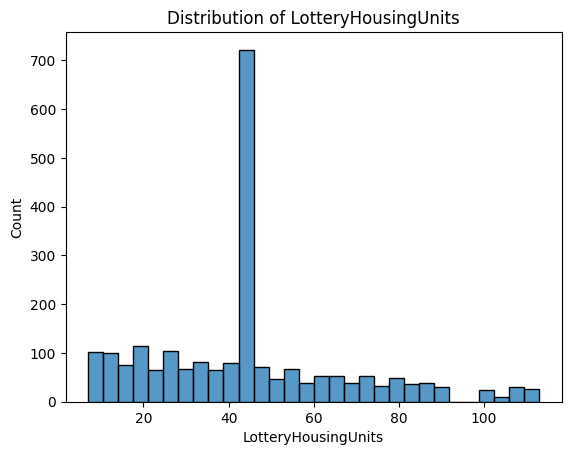

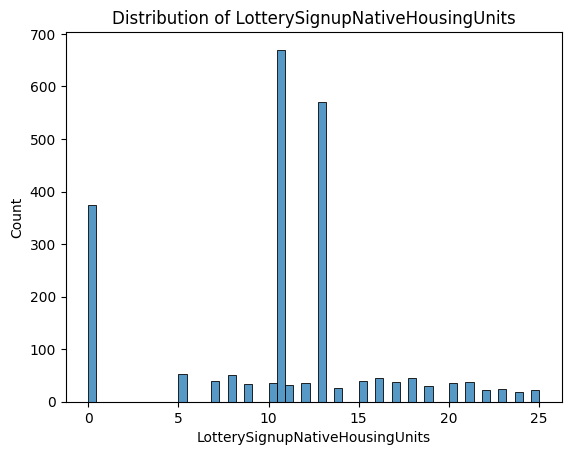

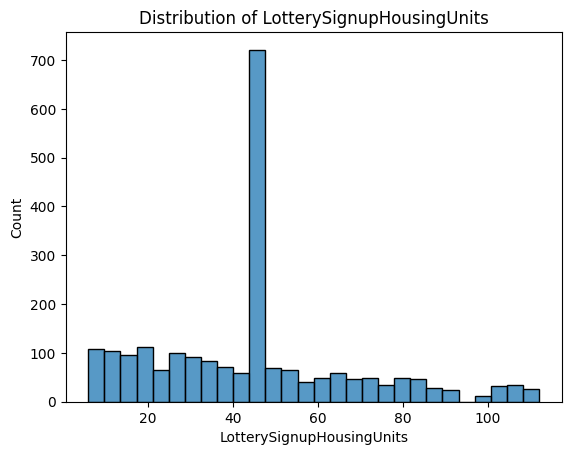

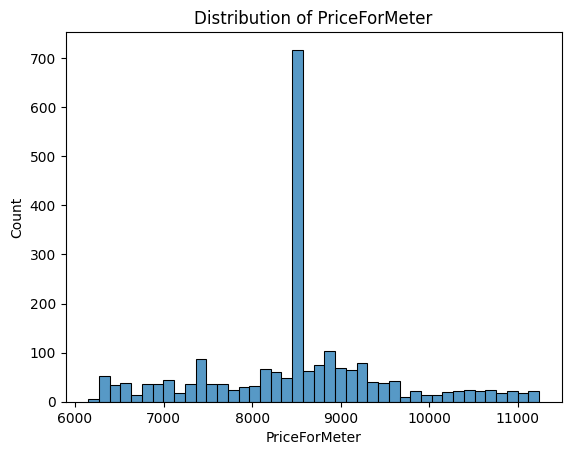

In [47]:
plot_everything(no_outliers)

In [52]:
#drop columns with only one value
for label in no_outliers.columns:
    if len(no_outliers[label].unique())==1:
        no_outliers=no_outliers.drop(label,axis=1)

In [53]:
#outliers in object columns:
object_cols=data.select_dtypes(include=['object','datetime64[ns]']).columns

In [54]:
no_outliers= no_outliers.join(data[object_cols])


ValueError: columns overlap but no suffix specified: Index(['ConstructionPermitName', 'ProjectStatus', 'ProviderName',
       'ProjectName', 'ProjectId', 'Neighborhood', 'LamasName', 'LamasCode',
       'LotteryExecutionDate', 'LotteryEndSignupDate', 'LotteryStatusValue',
       'Eligibility', 'MarketingRep', 'MarketingMethodDesc', 'MarketingMethod',
       'CentralizationType', 'LotteryType', 'LotteryId'],
      dtype='object')

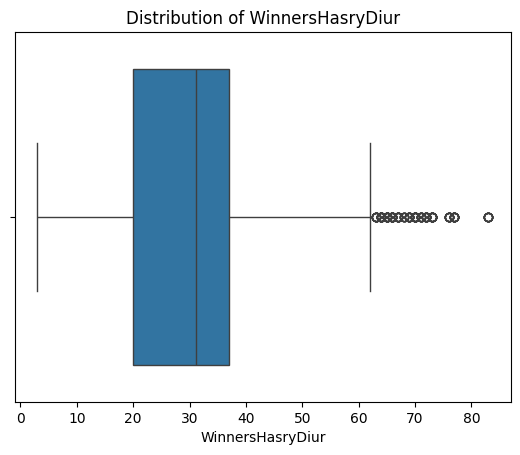

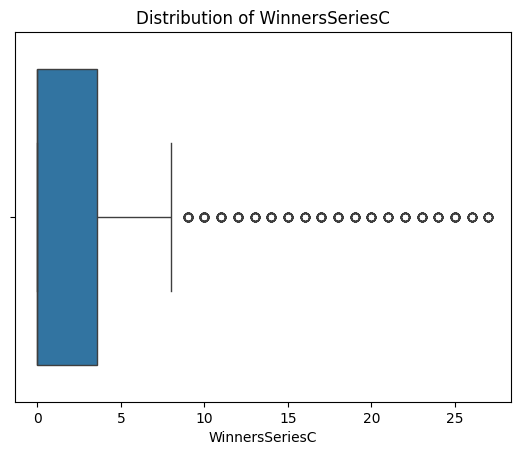

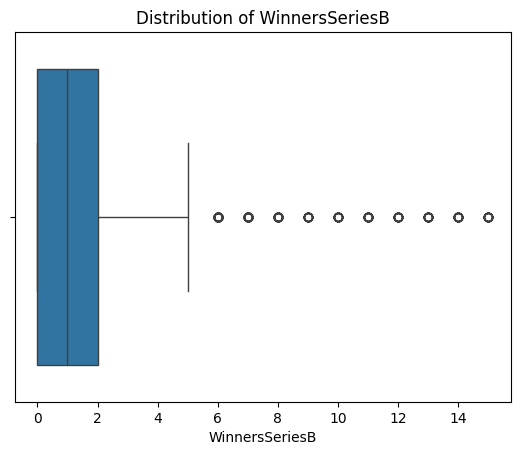

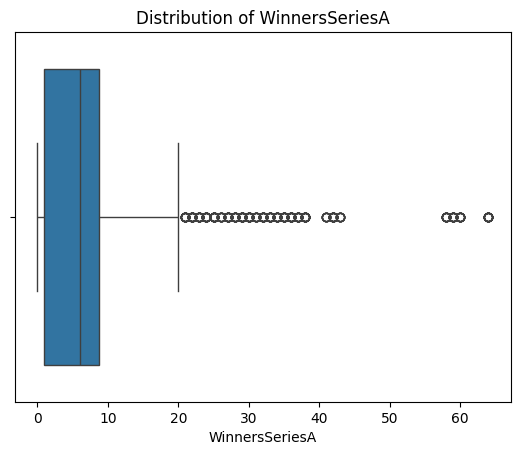

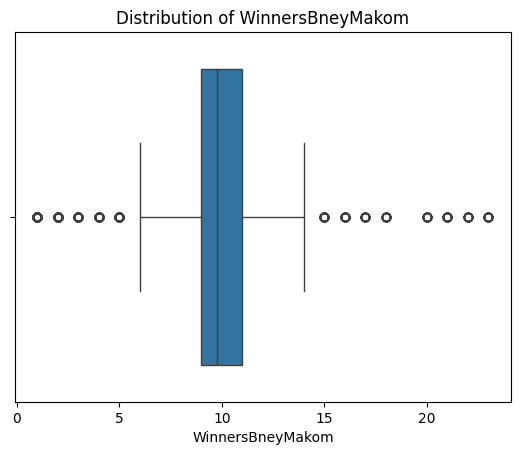

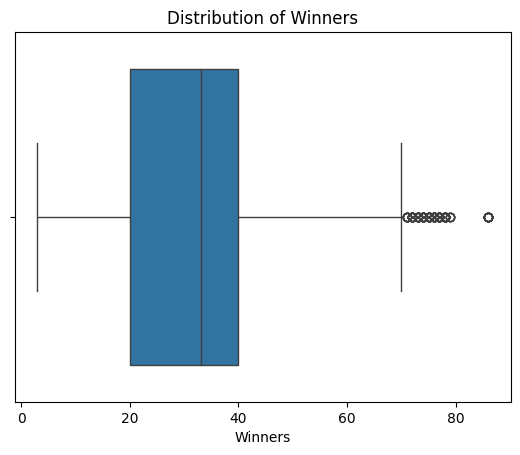

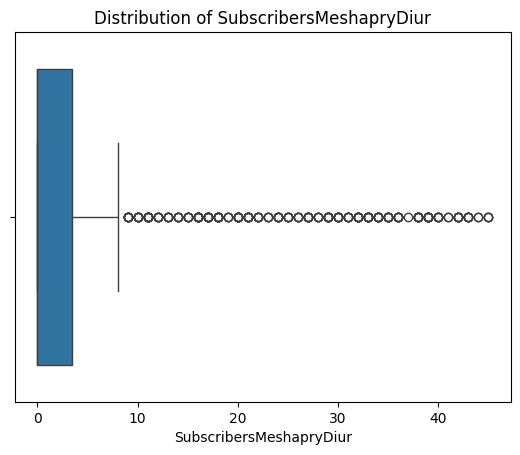

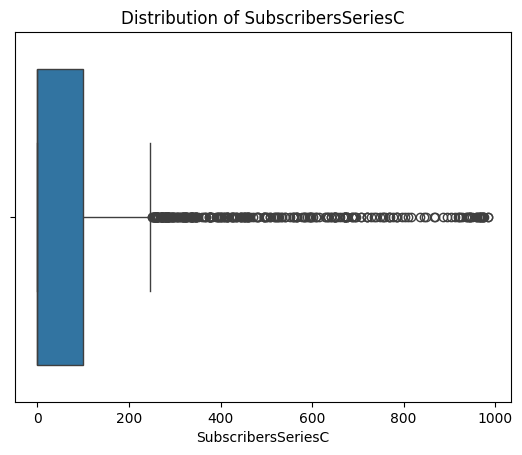

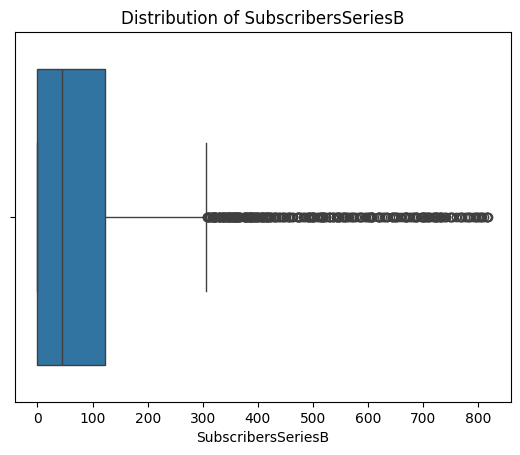

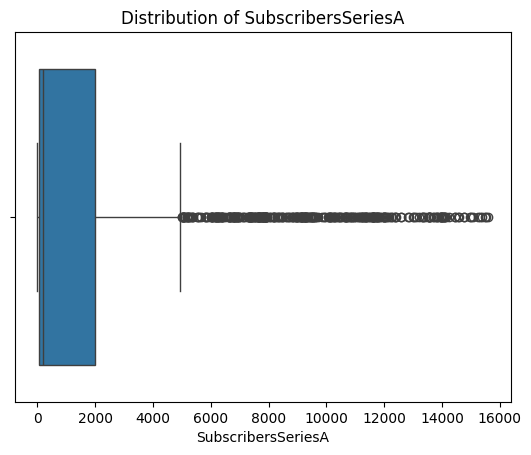

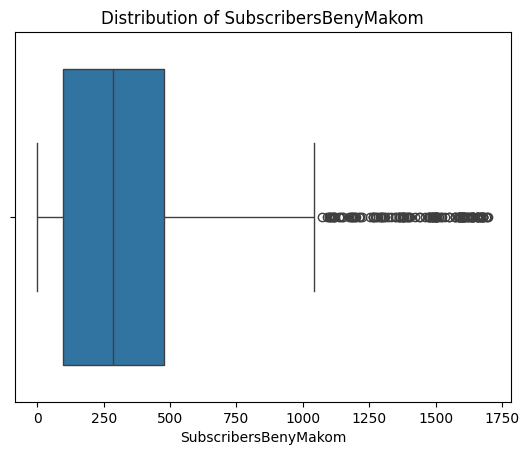

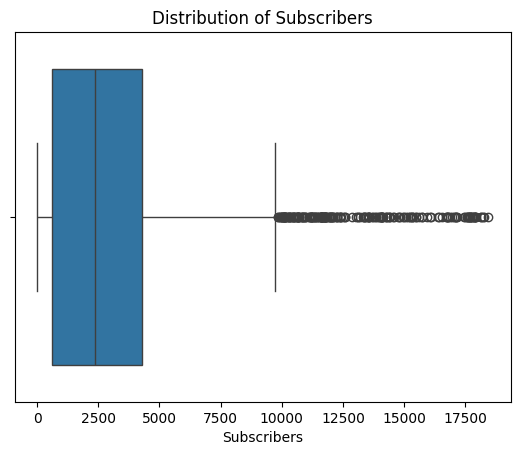

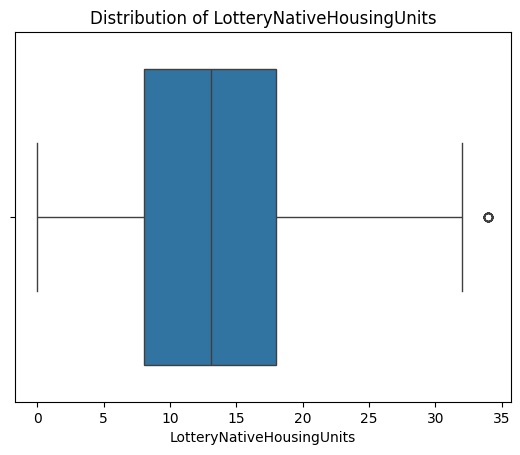

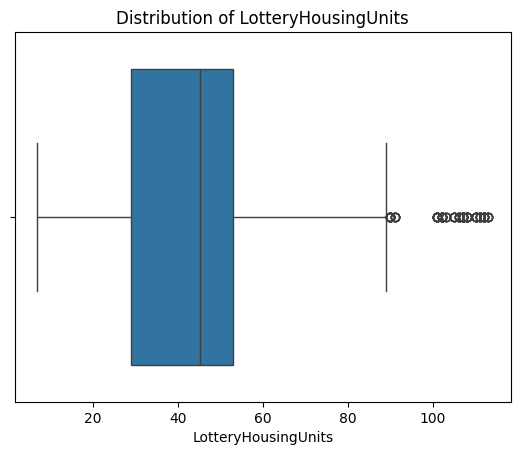

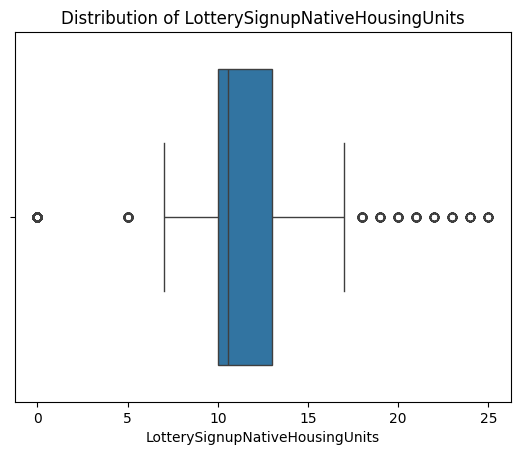

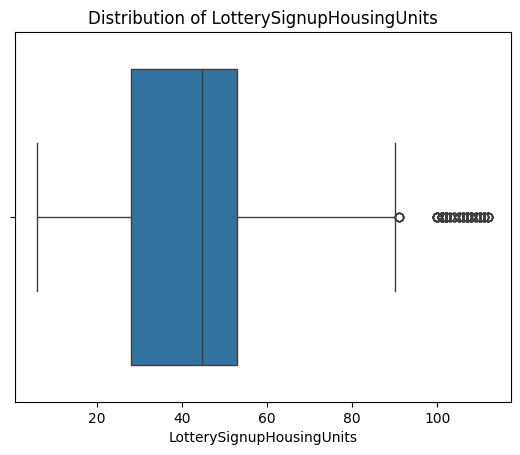

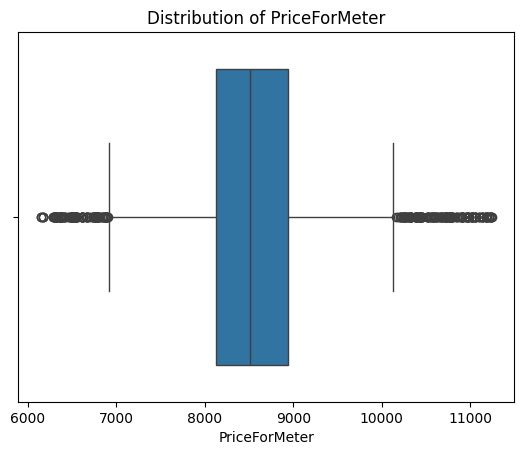

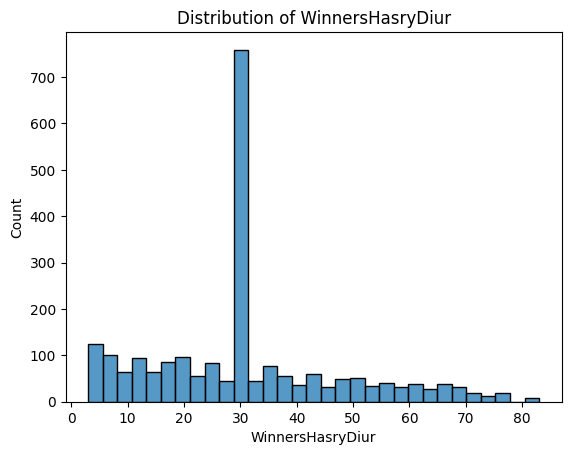

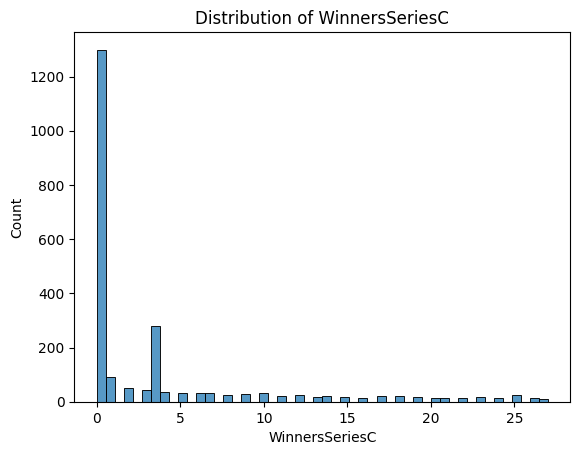

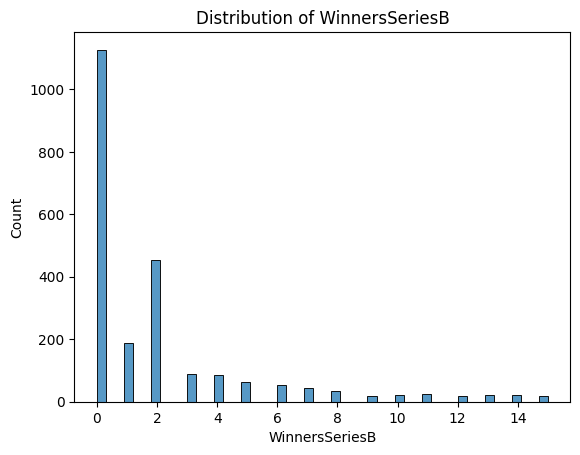

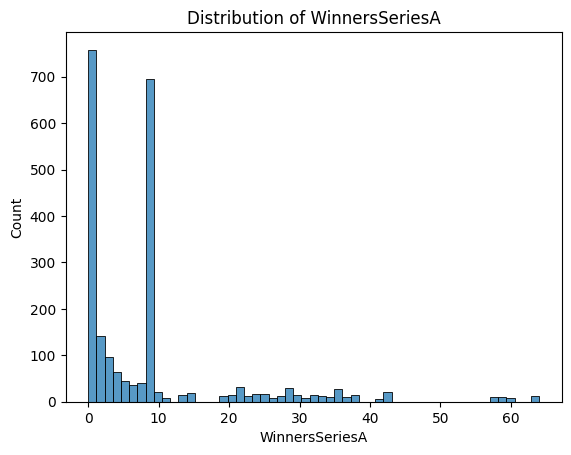

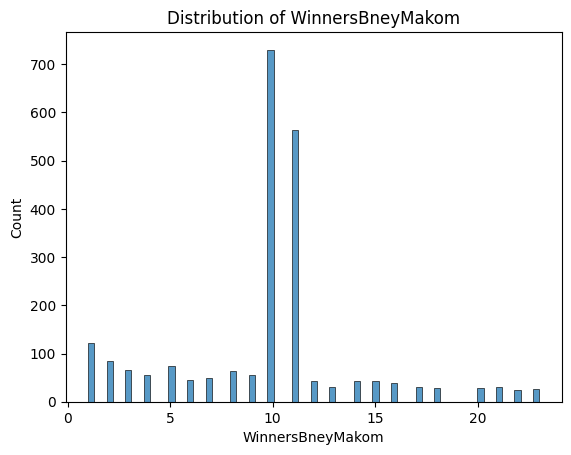

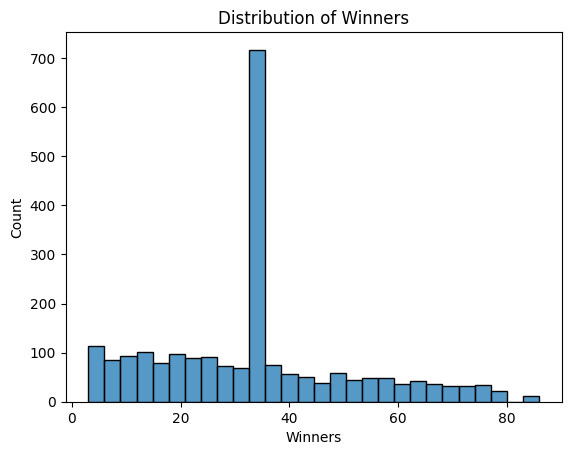

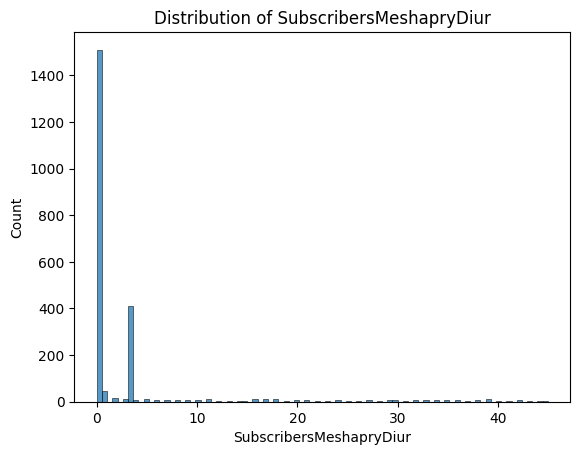

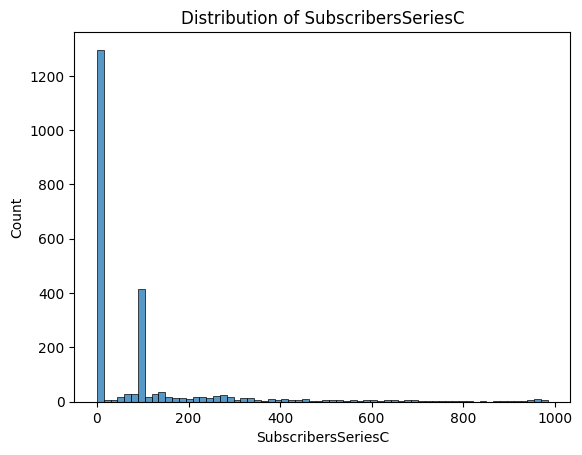

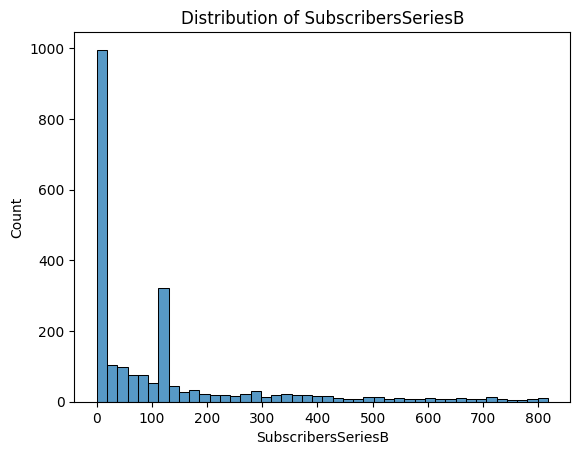

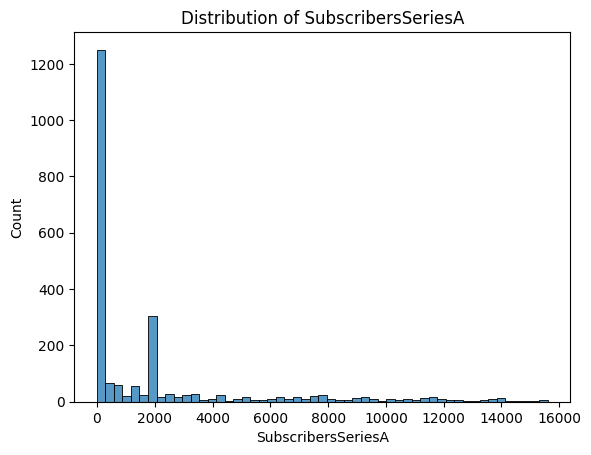

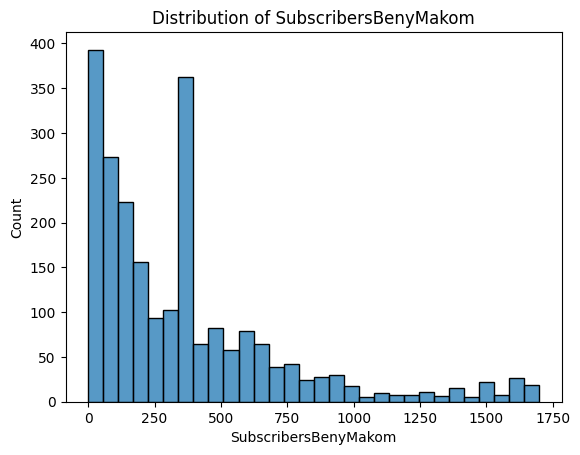

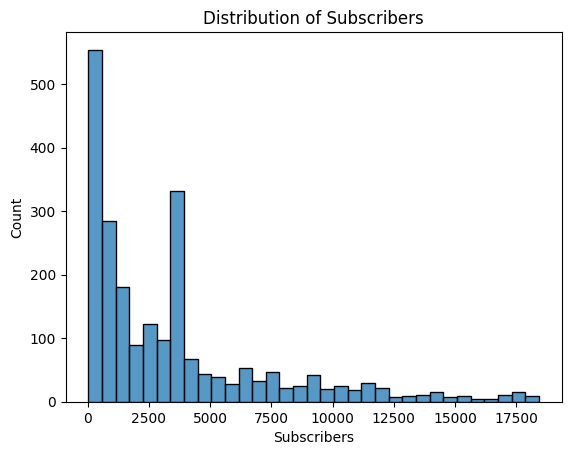

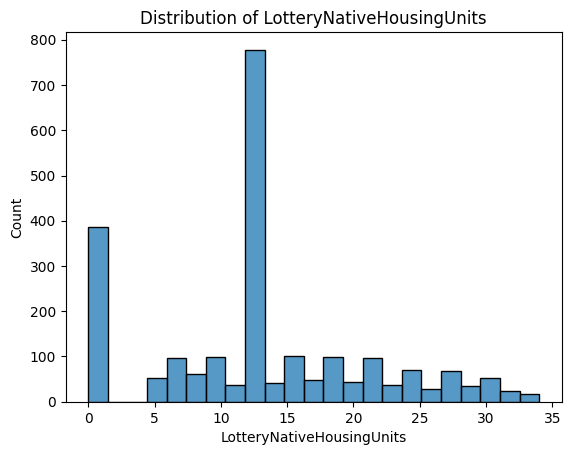

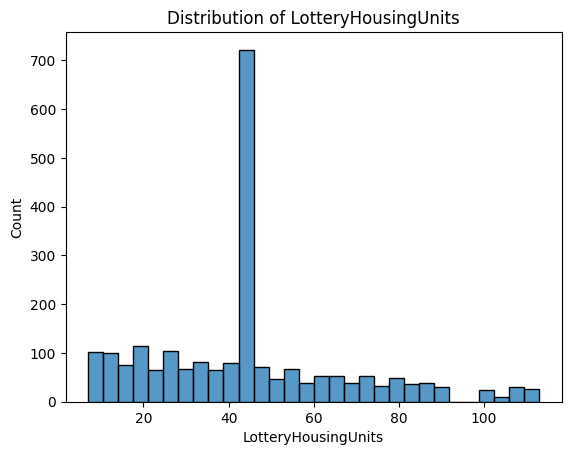

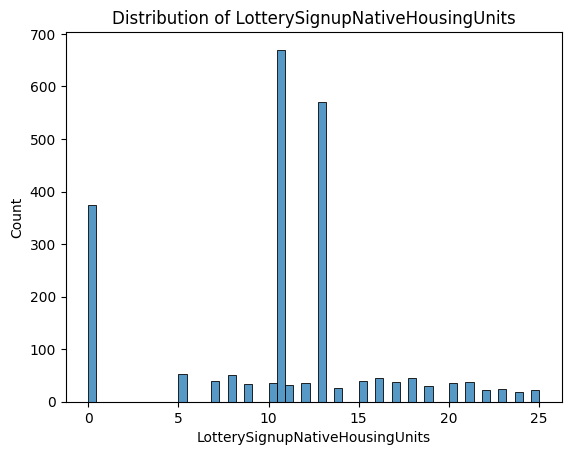

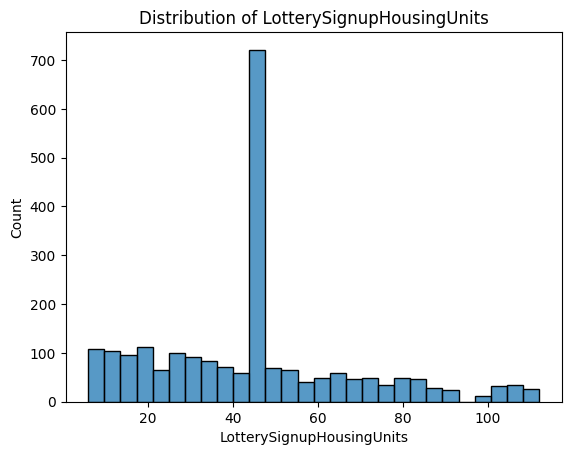

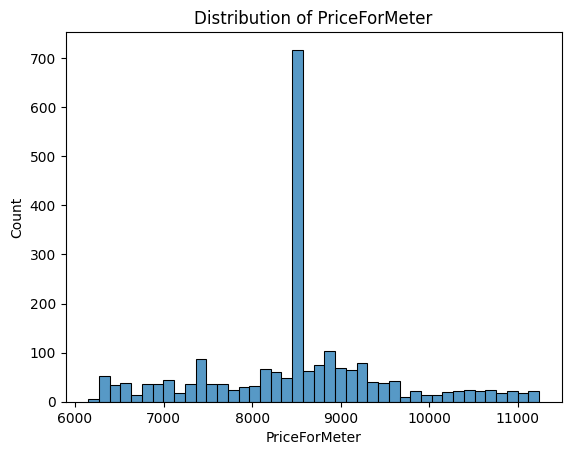

C:\Users\admin\AppData\Local\Temp\ipykernel_18496\2135285499.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=label, palette=custom_colors)


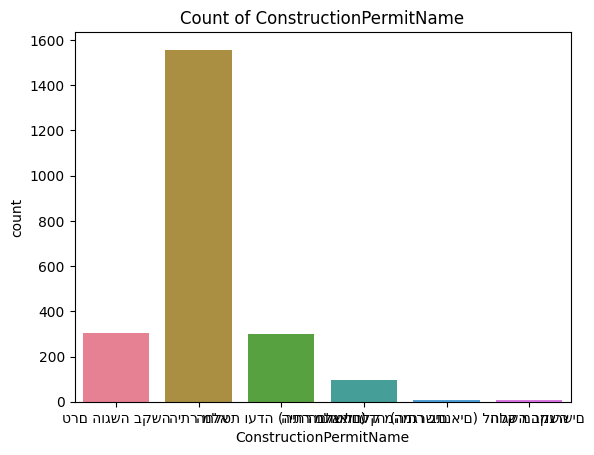

C:\Users\admin\AppData\Local\Temp\ipykernel_18496\2135285499.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=label, palette=custom_colors)


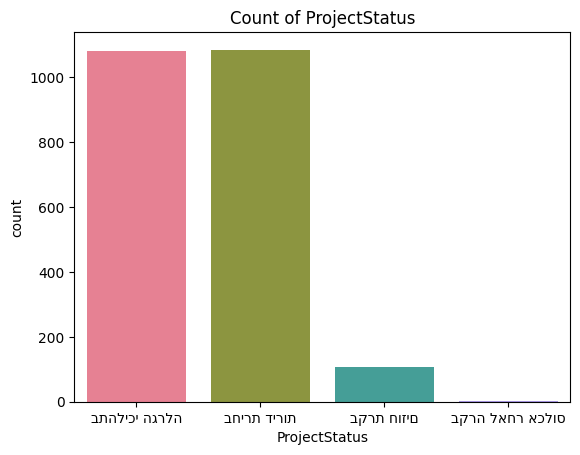

C:\Users\admin\AppData\Local\Temp\ipykernel_18496\2135285499.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=label, palette=custom_colors)


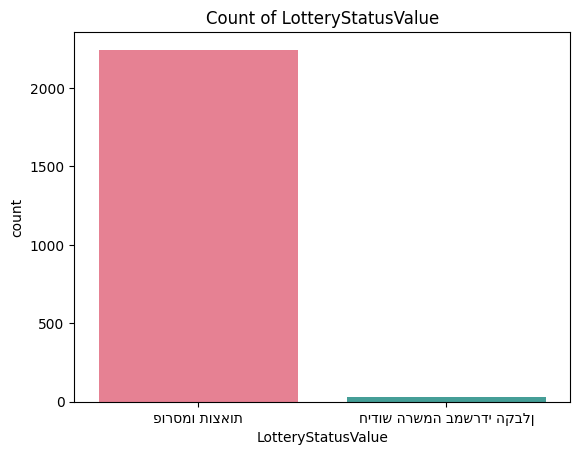

C:\Users\admin\AppData\Local\Temp\ipykernel_18496\2135285499.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=label, palette=custom_colors)


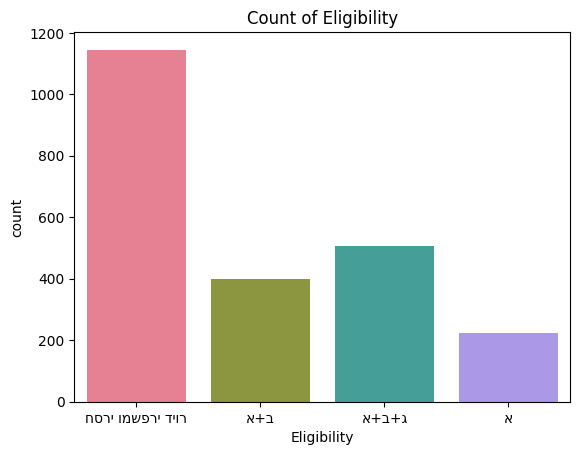

C:\Users\admin\AppData\Local\Temp\ipykernel_18496\2135285499.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=label, palette=custom_colors)


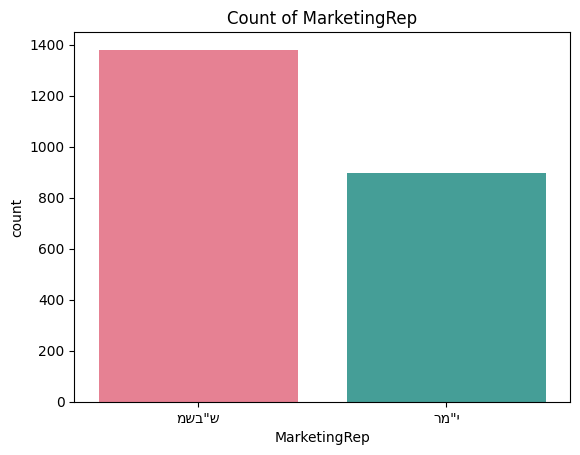

C:\Users\admin\AppData\Local\Temp\ipykernel_18496\2135285499.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=label, palette=custom_colors)


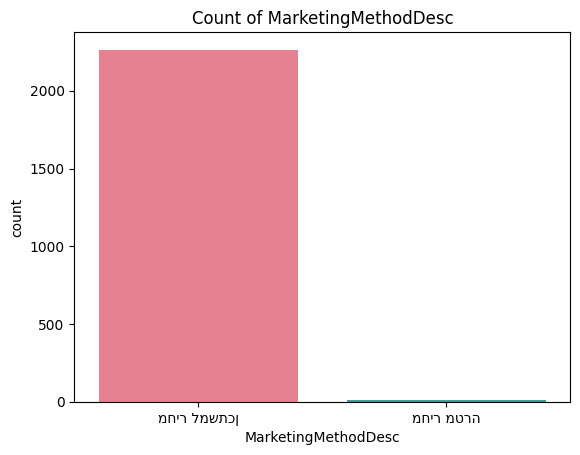

C:\Users\admin\AppData\Local\Temp\ipykernel_18496\2135285499.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=label, palette=custom_colors)


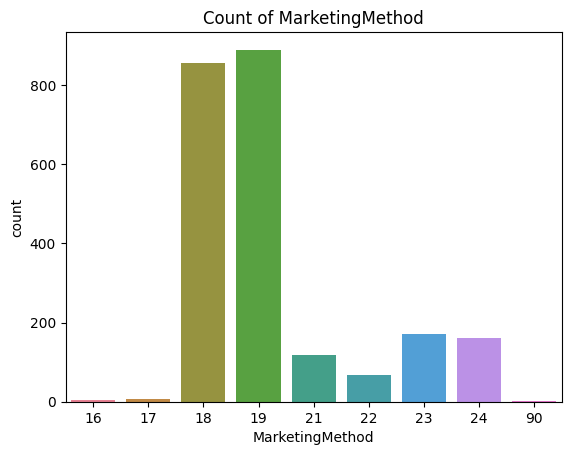

C:\Users\admin\AppData\Local\Temp\ipykernel_18496\2135285499.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=label, palette=custom_colors)


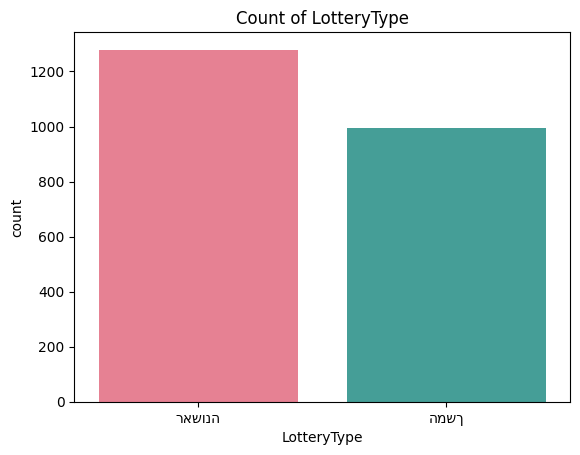

In [51]:
plot_everything(no_outliers)

In [55]:
no_outliers=no_outliers.drop('MarketingMethodDesc',axis=1)

In [56]:
no_outliers['LotteryStatusValue'].value_counts()

LotteryStatusValue
פורסמו תוצאות               2244
חידוש הרשמה במשרדי הקבלן      31
Name: count, dtype: int64

In [57]:
no_outliers=no_outliers.drop('LotteryStatusValue',axis=1)

In [58]:
no_outliers['ProjectStatus'].value_counts()

ProjectStatus
בחירת דירות        1085
בתהליכי הגרלה      1081
בקרת חוזים          107
בקרה לאחר אכלוס       2
Name: count, dtype: int64

In [59]:
no_outliers=no_outliers.drop(no_outliers[no_outliers['ProjectStatus']=='בקרה לאחר אכלוס'].index)

In [60]:
no_outliers['ConstructionPermitName'].value_counts()

ConstructionPermitName
היתר מלא                                  1555
טרם הוגשה בקשה                             303
החלטת ועדה (היתר בתנאים)                   301
היתר מלא לחלק מהמגרשים                      98
החלטת ועדה (היתר בתנאים) לחלק מהמגרשים       9
הוגשה בקשה                                   7
Name: count, dtype: int64

In [61]:
no_outliers=no_outliers.drop(no_outliers[no_outliers['ConstructionPermitName']=='הוגשה בקשה'].index)
no_outliers=no_outliers.drop(no_outliers[no_outliers['ConstructionPermitName']=='החלטת ועדה (היתר בתנאים) לחלק מהמגרשים'].index)

In [62]:
len(no_outliers)/len(data)

0.9920879120879121

# Feature Engeneering

In [63]:
# Ensure both columns are in datetime format
no_outliers['LotteryExecutionDate'] = pd.to_datetime(no_outliers['LotteryExecutionDate'])
no_outliers['LotteryEndSignupDate'] = pd.to_datetime(no_outliers['LotteryEndSignupDate'])

# Calculate the difference in days
no_outliers['num_of_days_between'] = (no_outliers['LotteryExecutionDate'] - no_outliers['LotteryEndSignupDate']).dt.days


In [64]:
no_outliers[no_outliers['num_of_days_between']<=0]

WinnersHasryDiur  WinnersSeriesC  WinnersSeriesB  WinnersSeriesA  \
61            31.20138             0.0             0.0          8.7397   
62            13.00000             0.0             0.0         13.0000   
63            19.00000             0.0             0.0         19.0000   
64            27.00000             0.0             0.0         27.0000   
65            18.00000             0.0             0.0          8.7397   
...                ...             ...             ...             ...   
2229          31.20138             1.0             0.0          8.7397   
2243          31.20138             0.0             0.0          8.7397   
2245          59.00000             0.0             0.0         59.0000   
2270          13.00000             0.0             0.0         13.0000   
2271          19.00000             0.0             0.0         19.0000   

      WinnersBneyMakom    Winners  SubscribersMeshapryDiur  \
61           11.000000  33.169939                      0.0   
62           11.000000  13.000000                      0.0   
63           11.000000  19.000000                      0.0   
64           11.000000  27.000000                      0.0   
65           11.000000  18.000000                      0.0   
...                ...        ...                      ...   
2229          9.754078  33.169939                      7.0   
2243          9.754078  33.169939                      0.0   
2245          9.754078  59.000000                      0.0   
2270          8.000000  13.000000                      0.0   
2271          9.000000  19.000000                      0.0   

      SubscribersSeriesC  SubscribersSeriesB  SubscribersSeriesA  ...  \
61                   0.0                 0.0         8405.000000  ...   
62                   0.0                 0.0         2318.000000  ...   
63                   0.0                 0.0         5997.000000  ...   
64                   0.0                 0.0         6247.000000  ...   
65                   0.0                 0.0          328.000000  ...   
...                  ...                 ...                 ...  ...   
2229                 2.0                 1.0         2005.360623  ...   
2243                 0.0                 0.0         5992.000000  ...   
2245                 0.0                 0.0        11283.000000  ...   
2270                 0.0                 0.0         7664.000000  ...   
2271                 0.0                 0.0         7869.000000  ...   

      LamasCode  LotteryExecutionDate  LotteryEndSignupDate       Eligibility  \
61         1066   2024-07-17 10:14:44            2024-08-07  חסרי ומשפרי דיור   
62         3650   2024-07-17 10:14:36            2024-08-07  חסרי ומשפרי דיור   
63         1113   2024-07-17 10:14:32            2024-08-07  חסרי ומשפרי דיור   
64         1113   2024-07-17 10:14:26            2024-08-07  חסרי ומשפרי דיור   
65          490   2024-07-17 10:14:20            2024-08-07  חסרי ומשפרי דיור   
...         ...                   ...                   ...               ...   
2229       8300   2017-03-15 15:30:19            2017-11-03                 א   
2243        922   2017-01-10 14:04:00            2017-07-01                 א   
2245       3000   2017-01-10 11:14:28            2017-02-01                 א   
2270       7700   2016-08-17 09:14:20            2016-11-08  חסרי ומשפרי דיור   
2271       7700   2016-08-16 09:25:18            2016-10-08  חסרי ומשפרי דיור   

      MarketingRep  MarketingMethod      CentralizationType LotteryType  \
61           משב"ש               23  הגרלה גדולה - מאי 2024      ראשונה   
62           משב"ש               23  הגרלה גדולה - מאי 2024      ראשונה   
63           משב"ש               23  הגרלה גדולה - מאי 2024      ראשונה   
64           משב"ש               23  הגרלה גדולה - מאי 2024      ראשונה   
65           משב"ש               22  הגרלה גדולה - מאי 2024      ראשונה   
...            ...              ...                     ...         ... 

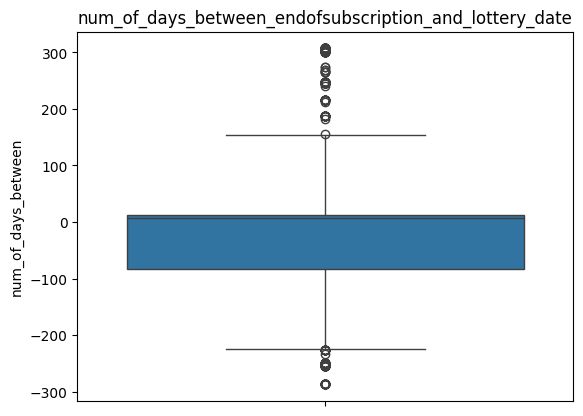

In [65]:
#we can see that most of the lotteries been done before the Endsignup dates
sns.boxplot(data=no_outliers,y='num_of_days_between')
plt.title('num_of_days_between_endofsubscription_and_lottery_date')
plt.show()

In [66]:
#it might cause because over subscription rate, lets check that:
no_outliers['OversubscriptionRate'] = no_outliers['Subscribers'] / no_outliers['LotteryHousingUnits']

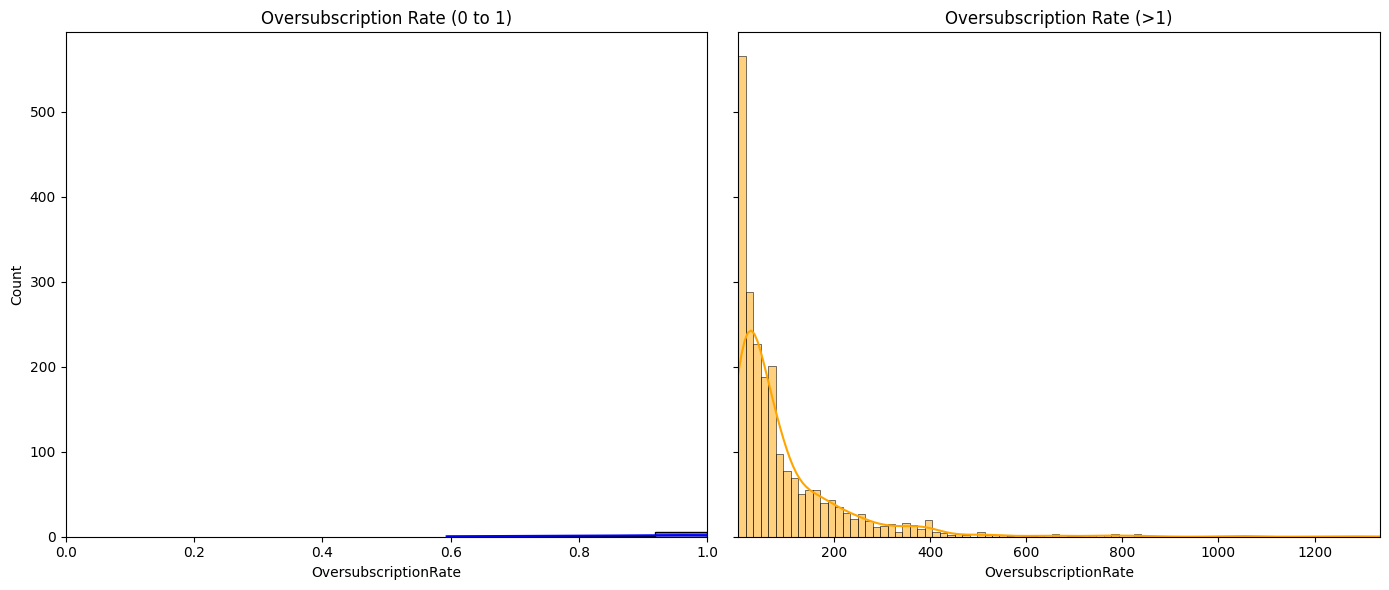

In [67]:
# Create two subsets based on the OversubscriptionRate values
below_one = no_outliers[no_outliers['OversubscriptionRate'] <= 1]
above_one = no_outliers[no_outliers['OversubscriptionRate'] > 1]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot the distribution for values between 0 and 1
sns.histplot(data=below_one, x='OversubscriptionRate', kde=True, ax=axes[0], color="blue")
axes[0].set_title('Oversubscription Rate (0 to 1)')
axes[0].set_xlim(0, 1)

# Plot the distribution for values above 1
sns.histplot(data=above_one, x='OversubscriptionRate', kde=True, ax=axes[1], color="orange")
axes[1].set_title('Oversubscription Rate (>1)')
axes[1].set_xlim(1, above_one['OversubscriptionRate'].max())

# Display the plots
plt.tight_layout()
plt.show()


we can clearly see that we have way too many subscribers that might cause the date of the lottery to be before the signupdate ends

### we are going to predict if we will have houses left after a lottery or not, this is an importent prediction which will indicate if that will happen and what are the couses for that:
### first i will plot a time plot of the winners and the houses we have for each lottery

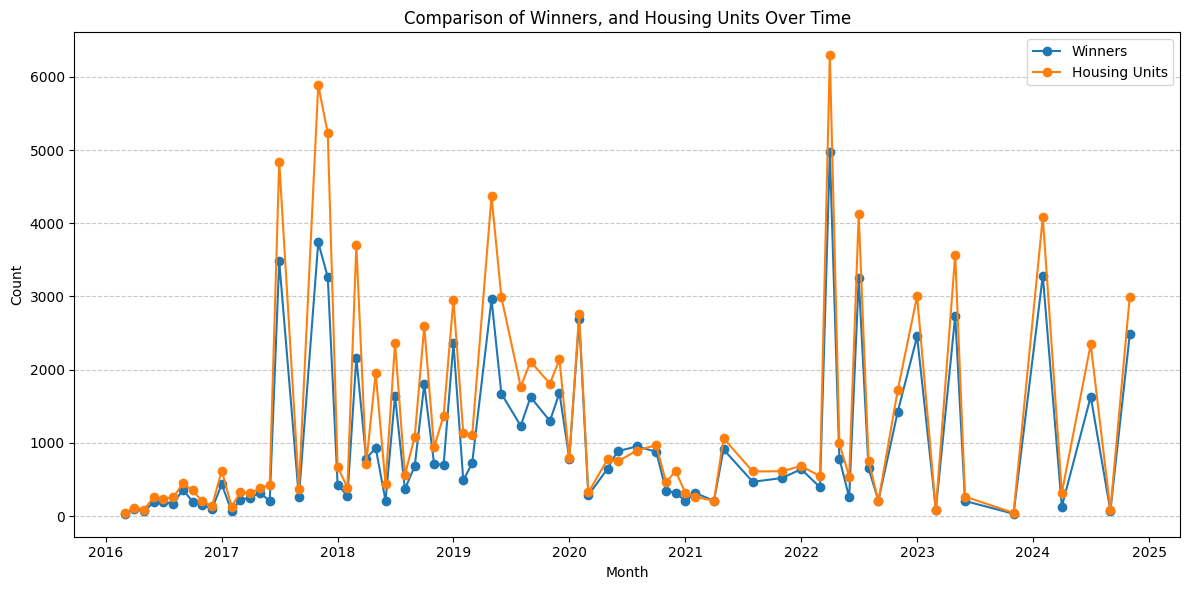

In [254]:
# Plot trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['LotteryExecutionDate'], monthly_data['Winners'], label='Winners', marker='o')
plt.plot(monthly_data['LotteryExecutionDate'], monthly_data['LotteryHousingUnits'], label='Housing Units', marker='o')

# Add labels, title, and legend
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Comparison of Winners, and Housing Units Over Time')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('winners_and_housing_units_trends.png', dpi=300)  # שמירה כקובץ PNG

# Show the plot
plt.show()


overall we can see that the numbers are close. however we can see that in the past we had way more houses left then today which can indicate that year might affect the model

In [69]:
df_model=no_outliers.copy()

In [70]:
#building new column of (is there any houses left after the lottery (1=yes,0=no)):
lily=[]
for i in df_model.index:
    if df_model.loc[i,'Winners']>=df_model.loc[i,'LotteryHousingUnits']:
        lily.append(0)
    else:
        lily.append(1)
df_model['is_house_left']  =lily  

In [71]:
df_model['month'] = df_model['LotteryExecutionDate'].dt.month
df_model['year'] = df_model['LotteryExecutionDate'].dt.year

In [72]:
df_model.columns

Index(['WinnersHasryDiur', 'WinnersSeriesC', 'WinnersSeriesB',
       'WinnersSeriesA', 'WinnersBneyMakom', 'Winners',
       'SubscribersMeshapryDiur', 'SubscribersSeriesC', 'SubscribersSeriesB',
       'SubscribersSeriesA', 'SubscribersBenyMakom', 'Subscribers',
       'LotteryNativeHousingUnits', 'LotteryHousingUnits',
       'LotterySignupNativeHousingUnits', 'LotterySignupHousingUnits',
       'PriceForMeter', 'ConstructionPermitName', 'ProjectStatus',
       'ProviderName', 'ProjectName', 'ProjectId', 'Neighborhood', 'LamasName',
       'LamasCode', 'LotteryExecutionDate', 'LotteryEndSignupDate',
       'Eligibility', 'MarketingRep', 'MarketingMethod', 'CentralizationType',
       'LotteryType', 'LotteryId', 'num_of_days_between',
       'OversubscriptionRate', 'is_house_left', 'month', 'year'],
      dtype='object')

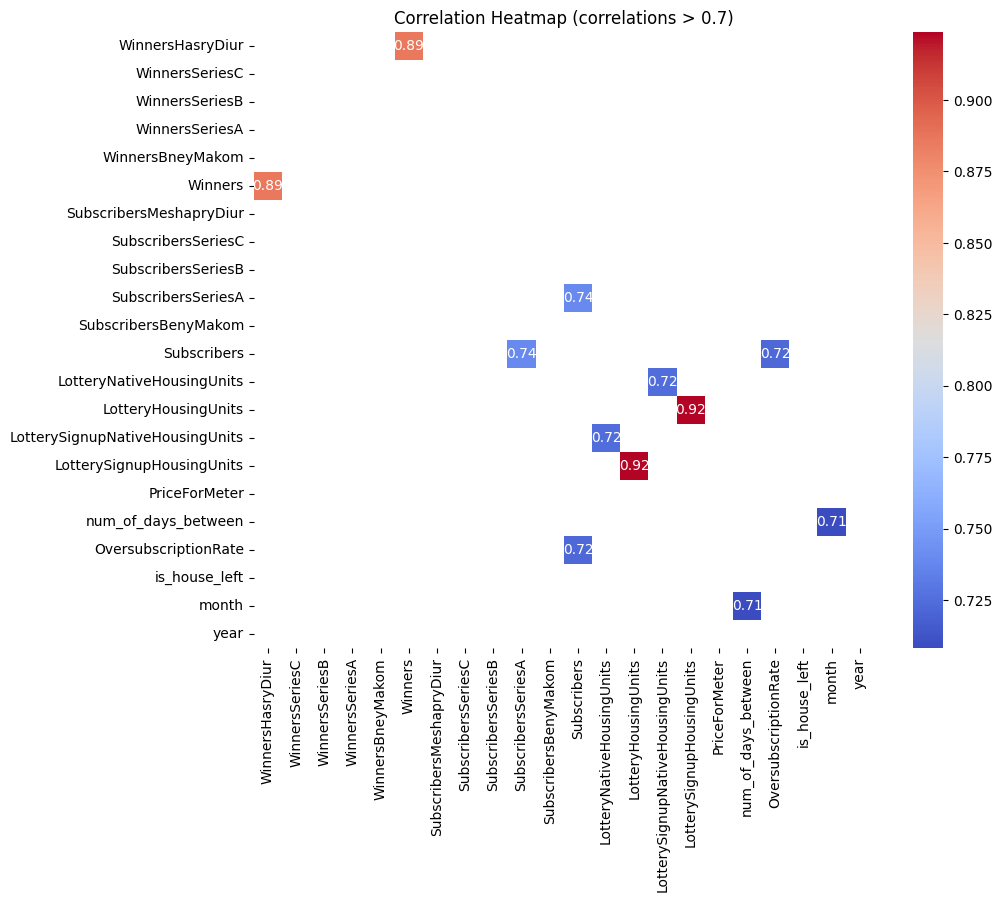

In [73]:
num_cols=df_model.select_dtypes(include=[np.number]).columns
# Compute the correlation matrix
corr_matrix = df_model[num_cols].corr()

# Filter correlations greater than 0.8
filtered_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix != 1)]

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", mask=filtered_corr.isnull(), cbar=True)
plt.title("Correlation Heatmap (correlations > 0.7)")
plt.show()


In [74]:
#dropping the columns we sayed at the beggining or columns with high correlation to different columns
df_model=df_model.drop(['WinnersHasryDiur','WinnersBneyMakom','Winners','SubscribersBenyMakom','Subscribers','LotterySignupNativeHousingUnits','LotterySignupHousingUnits','OversubscriptionRate'],axis=1)

In [75]:
#drop the dates columns:
df_model=df_model.drop(['LotteryExecutionDate','LotteryEndSignupDate'],axis=1)

In [76]:
df_model.columns

Index(['WinnersSeriesC', 'WinnersSeriesB', 'WinnersSeriesA',
       'SubscribersMeshapryDiur', 'SubscribersSeriesC', 'SubscribersSeriesB',
       'SubscribersSeriesA', 'LotteryNativeHousingUnits',
       'LotteryHousingUnits', 'PriceForMeter', 'ConstructionPermitName',
       'ProjectStatus', 'ProviderName', 'ProjectName', 'ProjectId',
       'Neighborhood', 'LamasName', 'LamasCode', 'Eligibility', 'MarketingRep',
       'MarketingMethod', 'CentralizationType', 'LotteryType', 'LotteryId',
       'num_of_days_between', 'is_house_left', 'month', 'year'],
      dtype='object')

# Prediction model

In [77]:
def optimize_and_convert(df):
    # המרת עמודות קטגוריאליות לקטגוריות
    for col in df.select_dtypes(include=['object']).columns:
        if col!= 'chance_of_winning_category':
            if df[col].nunique() == len(df):  # עמודה עם ערכים ייחודיים לכל שורה
                df = df.drop(columns=[col])
            else:
                df[col] = df[col].astype('category')

    

    # המרת דאמיז
    df_dummies = pd.get_dummies(df, drop_first=True)
    for col in df_dummies.select_dtypes(include=[bool]).columns:
        df_dummies[col] = df_dummies[col].astype(int)
    
        
    
    
    # מחזיר את הדאטה עם רשימת שמות העמודות
    return df_dummies, df_dummies.columns

In [78]:
df_model,df_model_cols=optimize_and_convert(df_model)

In [261]:


def build_and_train_model(X, y, save_path=None):
    """
    בונה מודל, מאמן אותו ומחזיר את המודל הטוב ביותר יחד עם שמות הפיצ'רים והדיוק שלו.
    אם save_path נמסר, השווה את הגרף לכונן.
    """
    # חלוקה לסטים של אימון ובדיקה
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    best_model = None
    best_score = 0
    
    # הגדרת המודלים האפשריים לקלאסיפיקציה
    models = {
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "RandomForestClassifier": RandomForestClassifier(),
        "XGBClassifier": XGBClassifier(),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GaussianNB": GaussianNB(),
        "MLPClassifier": MLPClassifier(max_iter=500)  # רשת עצבית בסיסית
    }

    accuracy_scores = {}  # לדירוג הדיוק של כל מודל

    # אימון ובדיקת כל מודל
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracy_scores[model_name] = accuracy
        
        # שמירה במודל הטוב ביותר
        if accuracy > best_score:
            best_model = model
            best_score = accuracy

    # הצגת גרף השוואת דיוק
    plt.figure(figsize=(10, 6))
    plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Model Comparison')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # אם נתיב שמירה נמסר, נשמור את הגרף לקובץ
    if save_path:
        plt.savefig(save_path)  # שמירה לקובץ
        print(f"Graph saved to {save_path}")

    # הצגת הגרף
    plt.show()

    return best_model, best_score, accuracy_scores








In [262]:
df_model.columns

Index(['WinnersSeriesC', 'WinnersSeriesB', 'WinnersSeriesA',
       'SubscribersMeshapryDiur', 'SubscribersSeriesC', 'SubscribersSeriesB',
       'SubscribersSeriesA', 'LotteryNativeHousingUnits',
       'LotteryHousingUnits', 'PriceForMeter',
       ...
       'CentralizationType_יולי 2022', 'CentralizationType_יוני 2017',
       'CentralizationType_ינואר 2020', 'CentralizationType_מרץ 2018',
       'CentralizationType_מרץ 2019', 'CentralizationType_ספטמבר 2017',
       'CentralizationType_ספטמבר 2018', 'CentralizationType_ספטמבר 2019',
       'CentralizationType_פברואר 2020', 'LotteryType_ראשונה'],
      dtype='object', length=2633)

#### we will drop the winner columns because they wont help us for future predictions (we dont have the winners in the future

In [263]:
X=df_model.drop(['is_house_left','WinnersSeriesC', 'WinnersSeriesB', 'WinnersSeriesA'],axis=1)
y=df_model['is_house_left']

In [264]:
# שמירת שמות העמודות המקוריים
original_columns = X.columns if isinstance(X, pd.DataFrame) else [f"Feature_{i}" for i in range(X.shape[1])]

# נרמול הנתונים
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# המרת המערך חזרה ל-DataFrame עם שמות העמודות
X = pd.DataFrame(X_normalized, columns=original_columns)


Graph saved to model results.png


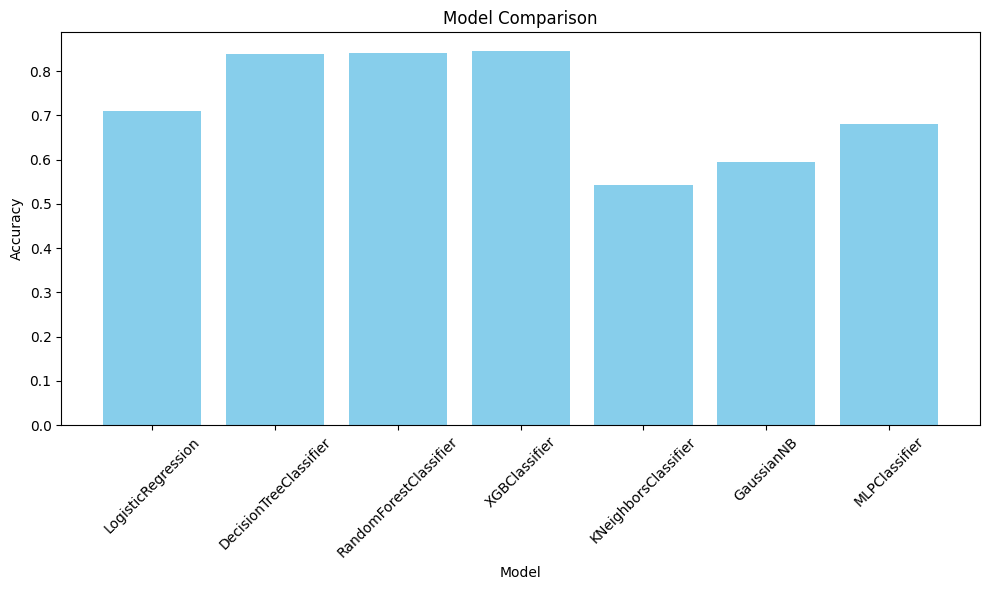

In [265]:
best_model, best_score, accuracy_scores = build_and_train_model(X, y,'model results.png')

In [260]:
# הדפסת התוצאות
print(f"Best Model: {type(best_model).__name__}")
print(f"Accuracy of the Best Model: {best_score:.2f}")

Best Model: XGBClassifier
Accuracy of the Best Model: 0.85


In [85]:
import shap
def explain_model_with_shap(model, X):
    """
    ניתוח SHAP עם גרפים נוספים והסבר האם כל פיצ'ר דוחף לכיוון 1 או 0.
    """
    try:
        # חישוב ערכי SHAP
        explainer = shap.TreeExplainer(model)  # מחייב שהמודל יתמוך ב-TreeExplainer
        shap_values = explainer.shap_values(X)

        # גרף סיכום SHAP
        print("גרף סיכום SHAP:")
        plt.figure(figsize=(8, 5))  # גודל הגרף
        shap.summary_plot(shap_values, X, show=False)
        plt.tight_layout()
        plt.subplots_adjust(left=0.1)  # התאמה לרוחב הפיצ'רים
        plt.show()

        # גרף ברים SHAP
        print("גרף ברים של ערכי SHAP:")
        plt.figure(figsize=(8, 5))  # גודל הגרף
        shap.summary_plot(shap_values, X, plot_type="bar", show=False)
        plt.tight_layout()
        plt.subplots_adjust(left=0.1)  # התאמה לרוחב הפיצ'רים
        plt.show()

        # סיכום טקסטואלי של החשיבות והכיוון
        if isinstance(shap_values, list):
            # במקרה של סיווג עם מספר מחלקות
            shap_values = np.array(shap_values).mean(axis=0)

        mean_shap_values = np.abs(shap_values).mean(axis=0)
        importance_df = pd.DataFrame({
            "Feature": X.columns,
            "Mean SHAP Value": mean_shap_values
        }).sort_values(by="Mean SHAP Value", ascending=False)

        print("\n5 הפיצ'רים החשובים ביותר לפי SHAP והכיוון שלהם:")
        for i, row in importance_df.head(5).iterrows():
            feature = row['Feature']
            mean_value = row['Mean SHAP Value']      
            print(f"פיצ'ר: {feature}, ערך SHAP ממוצע: {mean_value:.4f}")


    except Exception as e:
        print(f"שגיאה ביצירת ניתוח SHAP: {e}")

גרף סיכום SHAP:


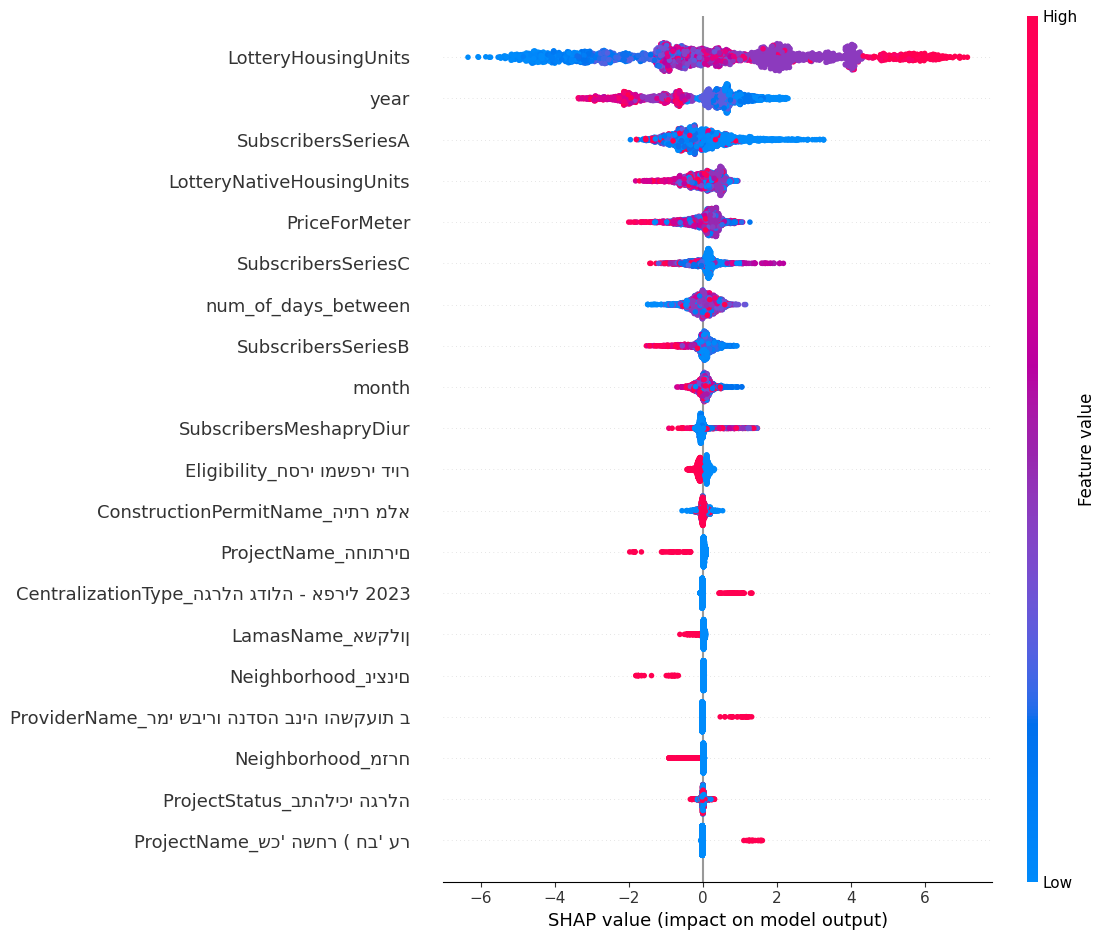

גרף ברים של ערכי SHAP:


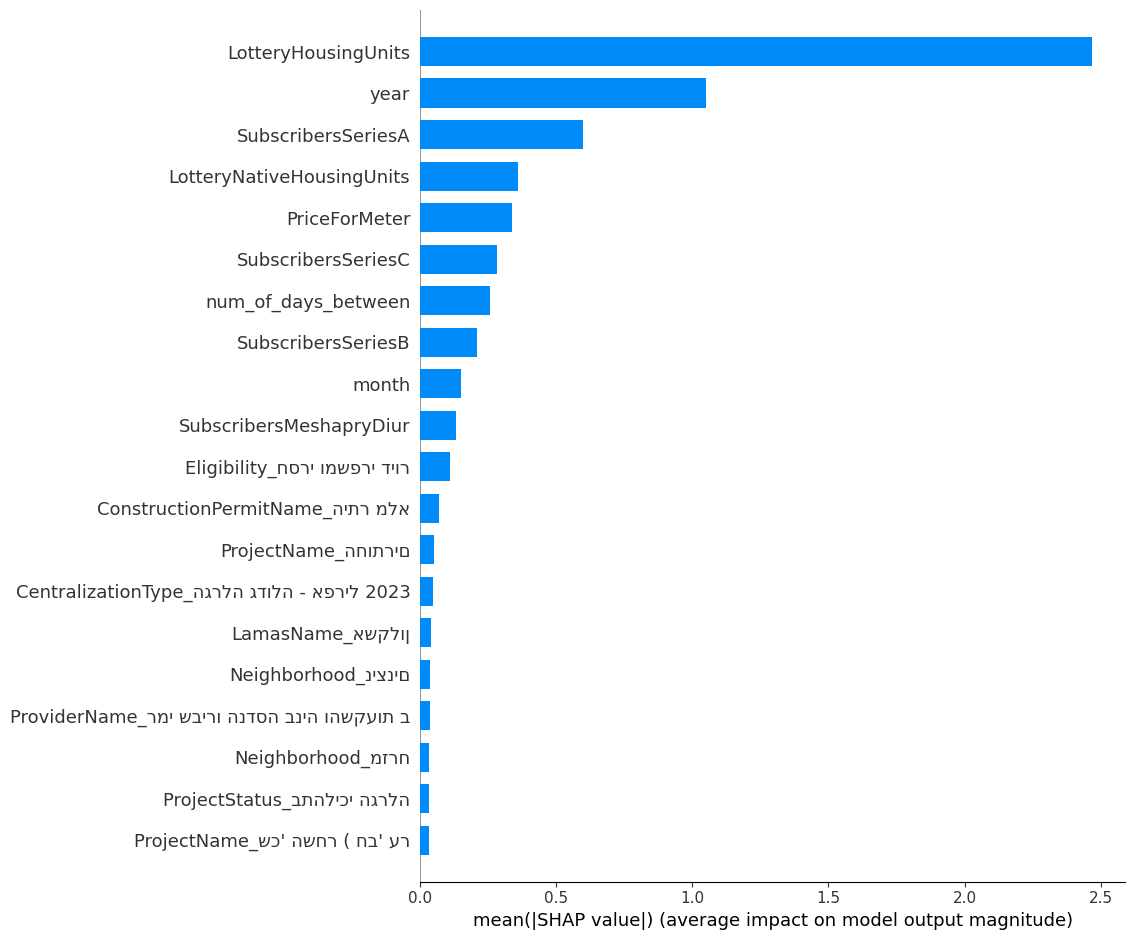


5 הפיצ'רים החשובים ביותר לפי SHAP והכיוון שלהם:
פיצ'ר: LotteryHousingUnits, ערך SHAP ממוצע: 2.4666
פיצ'ר: year, ערך SHAP ממוצע: 1.0510
פיצ'ר: SubscribersSeriesA, ערך SHAP ממוצע: 0.5993
פיצ'ר: LotteryNativeHousingUnits, ערך SHAP ממוצע: 0.3600
פיצ'ר: PriceForMeter, ערך SHAP ממוצע: 0.3358


In [86]:
explain_model_with_shap(best_model,X)

### הסבר על הגרף הראשון

הגרף הראשון מציג את מידת ההשפעה של כל פיצר על ערך החיזוי
ראשית כל שורה מדברת על פיצר מסויים
כל נקודה מדברת על דגימה מסויימת
צבע הנקודה מצביע על ערך הפיצר (לדוגמא במשתנים קטגוריאלים אדום זה 1 וכחול זה 0)
המיקום על ציר האיקס מצביע על כמה זה תרם לגדילה (בכיוון ימין) או לדעיכה (בכיוון שמאל) של ערך החיזוי.
לדוגמא אפשר לראות מהגרף שהשנה משפיעה ביחס הפוך על הסיכוי שישארו דירות ריקות-זאת אומרת שככל שערך הפיצר גדול יותר (אדום) כך הסיכוי שישארו דירות ריקות קטן יותר

# Clustering

## feature engeneering for the clustering

In [87]:
no_outliers.columns

Index(['WinnersHasryDiur', 'WinnersSeriesC', 'WinnersSeriesB',
       'WinnersSeriesA', 'WinnersBneyMakom', 'Winners',
       'SubscribersMeshapryDiur', 'SubscribersSeriesC', 'SubscribersSeriesB',
       'SubscribersSeriesA', 'SubscribersBenyMakom', 'Subscribers',
       'LotteryNativeHousingUnits', 'LotteryHousingUnits',
       'LotterySignupNativeHousingUnits', 'LotterySignupHousingUnits',
       'PriceForMeter', 'ConstructionPermitName', 'ProjectStatus',
       'ProviderName', 'ProjectName', 'ProjectId', 'Neighborhood', 'LamasName',
       'LamasCode', 'LotteryExecutionDate', 'LotteryEndSignupDate',
       'Eligibility', 'MarketingRep', 'MarketingMethod', 'CentralizationType',
       'LotteryType', 'LotteryId', 'num_of_days_between',
       'OversubscriptionRate'],
      dtype='object')

## Importing the coordinates of the lotteries based on LamasName

In [88]:
no_outliers['LamasName'].unique()

array(['בני עי"ש', 'אפרתה', 'צור הדסה', 'רכסים', 'בית שאן', 'טירת כרמל',
       'יהוד', 'דימונה', 'אילת', 'קרית גת', 'כפר סבא', 'בית שמש',
       'ראשון לציון', 'קרית אונו', 'שדרות', 'דיר אל-אסד', 'אכסאל',
       'מגדל העמק', 'קרית ביאליק', 'אלעד', 'בת ים', 'רחובות', 'באר שבע',
       'תל אביב -יפו', 'ירושלים', 'קרית ים', 'ביתר עלית', 'מעלות-תרשיחא',
       'חריש', 'אלפי מנשה', 'אופקים', 'טבריה', 'בית דגן', 'קרית עקרון',
       'קרית מלאכי', 'קרית שמונה', 'צפת', 'מודיעין', 'אשקלון', 'פתח תקוה',
       'כלל הישובים', 'עכו', 'נתניה', 'קצרין', 'כפר קאסם', 'באר יעקב',
       'ערד', 'נתיבות', 'נוף הגליל', 'יבנה', 'כרמיאל', 'ראש העין',
       'אשדוד', 'חיפה', 'עמנואל', 'אלקנה', 'קדימה-צורן', 'נהריה', 'רמלה',
       'גבע בנימין', "סח'נין", 'עפולה', 'לוד', 'אריאל', 'מבשרת ציון',
       'נס ציונה', 'מעלה אדומים', 'מצפה רמון', 'עתלית', 'גן יבנה',
       "ג'סר א-זרקא", 'פוריה-כפר עבו', 'מעלה אפרים', 'כפר ברא', 'דיר חנא',
       'טרעאן', 'עראבה', 'נצרת', 'רמת גן', 'בת חפר', 'קרית טבעון',
       'א

In [89]:
from geopy.geocoders import Nominatim
import time

# הגדרת רשימת היישובים לדוגמה
settlements = settlements = [
    'בני עי"ש', 'אפרת', 'צור הדסה', 'רכסים', 'בית שאן', 'טירת כרמל',
    'יהוד-מונוסון', 'דימונה', 'אילת', 'קריית גת', 'כפר סבא', 'בית שמש',
    'ראשון לציון', 'קריית אונו', 'שדרות', 'דיר אל-אסד', 'אכסאל',
    'מגדל העמק', 'קריית ביאליק', 'אלעד', 'בת ים', 'רחובות', 'באר שבע',
    'תל אביב-יפו', 'ירושלים', 'קריית ים', 'ביתר עילית', 'מעלות-תרשיחא',
    'חריש', 'אלפי מנשה', 'אופקים', 'טבריה', 'בית דגן', 'קריית עקרון',
    'קריית מלאכי', 'קריית שמונה', 'צפת', 'מודיעין-מכבים-רעות', 'אשקלון', 'פתח תקווה',
    'עכו', 'נתניה', 'קצרין', 'כפר קאסם', 'באר יעקב',
    'ערד', 'נתיבות', 'נוף הגליל', 'יבנה', 'כרמיאל', 'ראש העין',
    'אשדוד', 'חיפה', 'עמנואל', 'אלקנה', 'קדימה-צורן', 'נהריה', 'רמלה',
    'גבע בנימין', "סח'נין", 'עפולה', 'לוד', 'אריאל', 'מבשרת ציון',
    'נס ציונה', 'מעלה אדומים', 'מצפה רמון', 'עתלית', 'גן יבנה',
    "ג'סר א-זרקא", 'פוריה - כפר עבודה', 'מעלה אפרים', 'כפר ברא', 'דיר חנא',
    'טרעאן', 'עראבה', 'נצרת', 'רמת גן', 'בת חפר', 'קריית טבעון',
    'אור עקיבא', 'אור יהודה', 'בני ברק', 'בית אריה', 'יקנעם עילית',
    'בית אל', 'חצור הגלילית', 'גדרה', 'זכרון יעקב', 'שוהם',
    'קריית מוצקין', 'פרדס חנה-כרכור', 'חדרה', 'נשר', 'מדרשת בן גוריון',
    'רעננה', 'הרצליה', 'ירוחם', 'כפר יונה', 'שלומי', 'אבן יהודה',
    'נחף', 'כפר מנדא', 'קריית יערים', 'מרכז שפירא', 'בנימינה-גבעת עדה',
    'חולון', 'גני תקווה', 'פרדסיה'
]


# הגדרת Geolocator
geolocator = Nominatim(user_agent="geoapi")

# פונקציה לשליפת קואורדינטות
def get_coordinates(settlement):
    try:
        location = geolocator.geocode(settlement + ", ישראל")
        time.sleep(1)  # השהיה של שנייה בין בקשות
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        return None, None


# יצירת DataFrame ושליפת קואורדינטות
df = pd.DataFrame({'יישוב': settlements})
df[['Latitude', 'Longitude']] = df['יישוב'].apply(lambda x: pd.Series(get_coordinates(x)))
print(df.head())

      יישוב   Latitude  Longitude
0  בני עי"ש  31.789195  34.760599
1      אפרת  32.100257  34.953967
2  צור הדסה  31.715695  35.094831
3     רכסים  32.750956  35.101359
4   בית שאן  32.496752  35.497302


In [90]:
df

יישוב   Latitude  Longitude
0            בני עי"ש  31.789195  34.760599
1                אפרת  32.100257  34.953967
2            צור הדסה  31.715695  35.094831
3               רכסים  32.750956  35.101359
4             בית שאן  32.496752  35.497302
..                ...        ...        ...
104        מרכז שפירא  31.695184  34.707125
105  בנימינה-גבעת עדה  32.516720  35.003552
106             חולון  32.019312  34.780408
107         גני תקווה  32.060426  34.876095
108            פרדסיה  32.307035  34.909772

[109 rows x 3 columns]

In [91]:
df.rename(columns={'יישוב': 'LamasName'}, inplace=True)

In [92]:
df = df.set_index('LamasName')

In [93]:
df

Latitude  Longitude
LamasName                             
בני עי"ש          31.789195  34.760599
אפרת              32.100257  34.953967
צור הדסה          31.715695  35.094831
רכסים             32.750956  35.101359
בית שאן           32.496752  35.497302
...                     ...        ...
מרכז שפירא        31.695184  34.707125
בנימינה-גבעת עדה  32.516720  35.003552
חולון             32.019312  34.780408
גני תקווה         32.060426  34.876095
פרדסיה            32.307035  34.909772

[109 rows x 2 columns]

In [94]:
# מיזוג הקואורדינטות לדאטה המקורי
no_outliers = pd.merge(no_outliers, df, on='LamasName', how='left')

# תוצאה: data כולל כעת את Latitude ו-Longitude עבור כל יישוב
print(no_outliers.columns)

Index(['WinnersHasryDiur', 'WinnersSeriesC', 'WinnersSeriesB',
       'WinnersSeriesA', 'WinnersBneyMakom', 'Winners',
       'SubscribersMeshapryDiur', 'SubscribersSeriesC', 'SubscribersSeriesB',
       'SubscribersSeriesA', 'SubscribersBenyMakom', 'Subscribers',
       'LotteryNativeHousingUnits', 'LotteryHousingUnits',
       'LotterySignupNativeHousingUnits', 'LotterySignupHousingUnits',
       'PriceForMeter', 'ConstructionPermitName', 'ProjectStatus',
       'ProviderName', 'ProjectName', 'ProjectId', 'Neighborhood', 'LamasName',
       'LamasCode', 'LotteryExecutionDate', 'LotteryEndSignupDate',
       'Eligibility', 'MarketingRep', 'MarketingMethod', 'CentralizationType',
       'LotteryType', 'LotteryId', 'num_of_days_between',
       'OversubscriptionRate', 'Latitude', 'Longitude'],
      dtype='object')


## fixing incorrect LamasName values based on Levenshtein distance function

In [95]:
import Levenshtein

# פונקציה להשוואת השם שהזוהה לאלה שלא זוהו
def find_closest_match(name, good_list):
    # מציאת השם הכי קרוב ברשימה הטובה
    return min(good_list, key=lambda x: Levenshtein.distance(name, x))



unmatched=['אפרתה', 'יהוד', 'קרית גת', 'קרית אונו', 'קרית ביאליק',
       'תל אביב -יפו', 'קרית ים', 'ביתר עלית', 'אלפי מנשה', 'קרית עקרון',
       'קרית מלאכי', 'קרית שמונה', 'מודיעין', 'פתח תקוה', 
       'גבע בנימין', 'פוריה-כפר עבו', 'מעלה אפרים', 'קרית טבעון',
       'יקנעם עלית', 'קרית מוצקין', 'פרדס חנה-כרכו', 'קרית יערים',
       'בנימינה–גבעת עד', 'גני תקוה']
good_list=df.index
# עבור כל שם שלא זוהה, מצא את השם הכי קרוב ברשימה הטובה
matched_dict = {name: find_closest_match(name, good_list) for name in unmatched}

print(matched_dict)


{'אפרתה': 'אפרת', 'יהוד': 'לוד', 'קרית גת': 'קריית גת', 'קרית אונו': 'קריית אונו', 'קרית ביאליק': 'קריית ביאליק', 'תל אביב -יפו': 'תל אביב-יפו', 'קרית ים': 'קריית ים', 'ביתר עלית': 'ביתר עילית', 'אלפי מנשה': 'אלפי מנשה', 'קרית עקרון': 'קריית עקרון', 'קרית מלאכי': 'קריית מלאכי', 'קרית שמונה': 'קריית שמונה', 'מודיעין': 'אופקים', 'פתח תקוה': 'פתח תקווה', 'גבע בנימין': 'גבע בנימין', 'פוריה-כפר עבו': 'פוריה - כפר עבודה', 'מעלה אפרים': 'מעלה אפרים', 'קרית טבעון': 'קריית טבעון', 'יקנעם עלית': 'יקנעם עילית', 'קרית מוצקין': 'קריית מוצקין', 'פרדס חנה-כרכו': 'פרדס חנה-כרכור', 'קרית יערים': 'קריית יערים', 'בנימינה–גבעת עד': 'בנימינה-גבעת עדה', 'גני תקוה': 'גני תקווה'}


In [96]:
no_outliers['LamasName'] = no_outliers['LamasName'].replace(matched_dict)

In [97]:
no_outliers['LamasName'].unique()

array(['בני עי"ש', 'אפרת', 'צור הדסה', 'רכסים', 'בית שאן', 'טירת כרמל',
       'לוד', 'דימונה', 'אילת', 'קריית גת', 'כפר סבא', 'בית שמש',
       'ראשון לציון', 'קריית אונו', 'שדרות', 'דיר אל-אסד', 'אכסאל',
       'מגדל העמק', 'קריית ביאליק', 'אלעד', 'בת ים', 'רחובות', 'באר שבע',
       'תל אביב-יפו', 'ירושלים', 'קריית ים', 'ביתר עילית', 'מעלות-תרשיחא',
       'חריש', 'אלפי מנשה', 'אופקים', 'טבריה', 'בית דגן', 'קריית עקרון',
       'קריית מלאכי', 'קריית שמונה', 'צפת', 'אשקלון', 'פתח תקווה',
       'כלל הישובים', 'עכו', 'נתניה', 'קצרין', 'כפר קאסם', 'באר יעקב',
       'ערד', 'נתיבות', 'נוף הגליל', 'יבנה', 'כרמיאל', 'ראש העין',
       'אשדוד', 'חיפה', 'עמנואל', 'אלקנה', 'קדימה-צורן', 'נהריה', 'רמלה',
       'גבע בנימין', "סח'נין", 'עפולה', 'אריאל', 'מבשרת ציון', 'נס ציונה',
       'מעלה אדומים', 'מצפה רמון', 'עתלית', 'גן יבנה', "ג'סר א-זרקא",
       'פוריה - כפר עבודה', 'מעלה אפרים', 'כפר ברא', 'דיר חנא', 'טרעאן',
       'עראבה', 'נצרת', 'רמת גן', 'בת חפר', 'קריית טבעון', 'אור עקיבא',
   

In [98]:
for i in no_outliers.index:
    if pd.isna(no_outliers.loc[i, 'Latitude']) and no_outliers.loc[i, 'LamasName'] in df.index :
        
            no_outliers.loc[i, 'Latitude'] = df.loc[no_outliers.loc[i, 'LamasName'], 'Latitude']
        
            
    if pd.isna(no_outliers.loc[i, 'Longitude']) and no_outliers.loc[i, 'LamasName'] in df.index:
        
            no_outliers.loc[i, 'Longitude'] = df.loc[no_outliers.loc[i, 'LamasName'], 'Longitude']
        


In [99]:
# מציאת השורות שבהן הערך בעמודה 'LAMAS CODE' חסר (NaN)
missing_values = no_outliers[no_outliers['Longitude'].isna()]

# הדפסת השורות בהן הערך חסר
print(len(missing_values))


14


In [100]:
new_data = no_outliers[no_outliers['Longitude'].isna()==False]

In [101]:
len(new_data)

2243

In [102]:
new_data.columns

Index(['WinnersHasryDiur', 'WinnersSeriesC', 'WinnersSeriesB',
       'WinnersSeriesA', 'WinnersBneyMakom', 'Winners',
       'SubscribersMeshapryDiur', 'SubscribersSeriesC', 'SubscribersSeriesB',
       'SubscribersSeriesA', 'SubscribersBenyMakom', 'Subscribers',
       'LotteryNativeHousingUnits', 'LotteryHousingUnits',
       'LotterySignupNativeHousingUnits', 'LotterySignupHousingUnits',
       'PriceForMeter', 'ConstructionPermitName', 'ProjectStatus',
       'ProviderName', 'ProjectName', 'ProjectId', 'Neighborhood', 'LamasName',
       'LamasCode', 'LotteryExecutionDate', 'LotteryEndSignupDate',
       'Eligibility', 'MarketingRep', 'MarketingMethod', 'CentralizationType',
       'LotteryType', 'LotteryId', 'num_of_days_between',
       'OversubscriptionRate', 'Latitude', 'Longitude'],
      dtype='object')

# choosing the columns for the clustering

In [106]:
new_data.columns

Index(['WinnersHasryDiur', 'WinnersSeriesC', 'WinnersSeriesB',
       'WinnersSeriesA', 'WinnersBneyMakom', 'Winners',
       'SubscribersMeshapryDiur', 'SubscribersSeriesC', 'SubscribersSeriesB',
       'SubscribersSeriesA', 'SubscribersBenyMakom', 'Subscribers',
       'LotteryNativeHousingUnits', 'LotteryHousingUnits',
       'LotterySignupNativeHousingUnits', 'LotterySignupHousingUnits',
       'PriceForMeter', 'ConstructionPermitName', 'ProjectStatus',
       'ProviderName', 'ProjectName', 'ProjectId', 'Neighborhood', 'LamasName',
       'LamasCode', 'LotteryExecutionDate', 'LotteryEndSignupDate',
       'Eligibility', 'MarketingRep', 'MarketingMethod', 'CentralizationType',
       'LotteryType', 'LotteryId', 'num_of_days_between',
       'OversubscriptionRate', 'Latitude', 'Longitude', 'days_since_end'],
      dtype='object')

In [104]:
# המרת העמודה 'LotteryExecutionDate' לפורמט תאריך
new_data['LotteryExecutionDate'] = pd.to_datetime(new_data['LotteryExecutionDate'])

# קביעת תאריך ההגרלה האחרון
end_date = new_data['LotteryExecutionDate'].max()
# חישוב הימים מאז ההגרלה האחרונה
new_data['days_since_end'] = (end_date - new_data['LotteryExecutionDate']).dt.days


C:\Users\admin\AppData\Local\Temp\ipykernel_18496\3947022519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['LotteryExecutionDate'] = pd.to_datetime(new_data['LotteryExecutionDate'])
C:\Users\admin\AppData\Local\Temp\ipykernel_18496\3947022519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['days_since_end'] = (end_date - new_data['LotteryExecutionDate']).dt.days


In [173]:
#nirmul

# עמודות נבחרות לקלאסטרינג
features = ['Latitude', 'Longitude', 'PriceForMeter', 'days_since_end']

# נירמול
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_data[features])

# יצירת DataFrame מנורמל
scaled_df = pd.DataFrame(scaled_data, columns=features)


### visualization between the columns

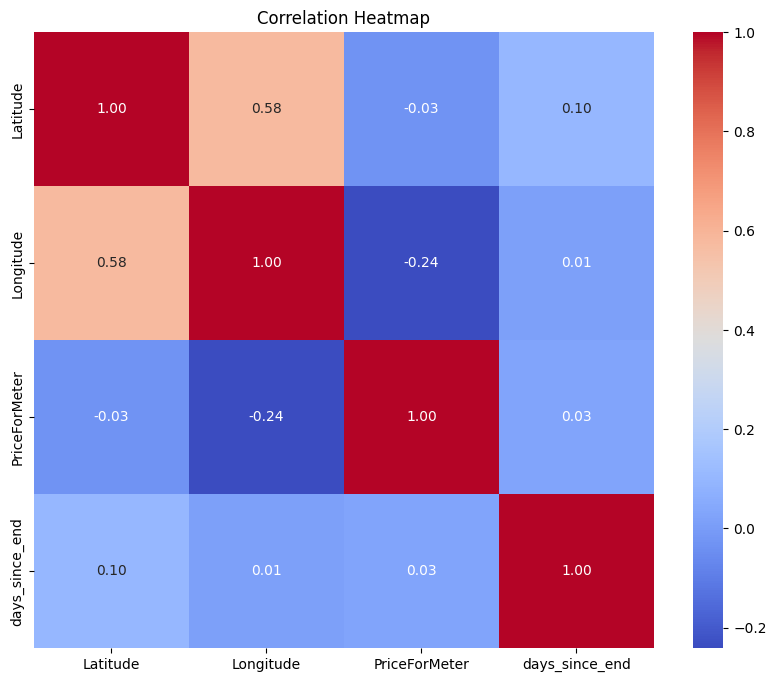

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap של קורלציות
plt.figure(figsize=(10, 8))
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [175]:
import folium
from IPython.display import IFrame

# יצירת המפה
map_geo = folium.Map(location=[31.7683, 35.2137], zoom_start=7)  # תל אביב/ירושלים

for _, row in new_data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color='blue'
    ).add_to(map_geo)

# שמירה לקובץ HTML
map_geo.save("initial_map_israel.html")

# הצגת המפה בתוך ה-Jupyter Notebook
IFrame("initial_map_israel.html", width=800, height=600)


## k-means

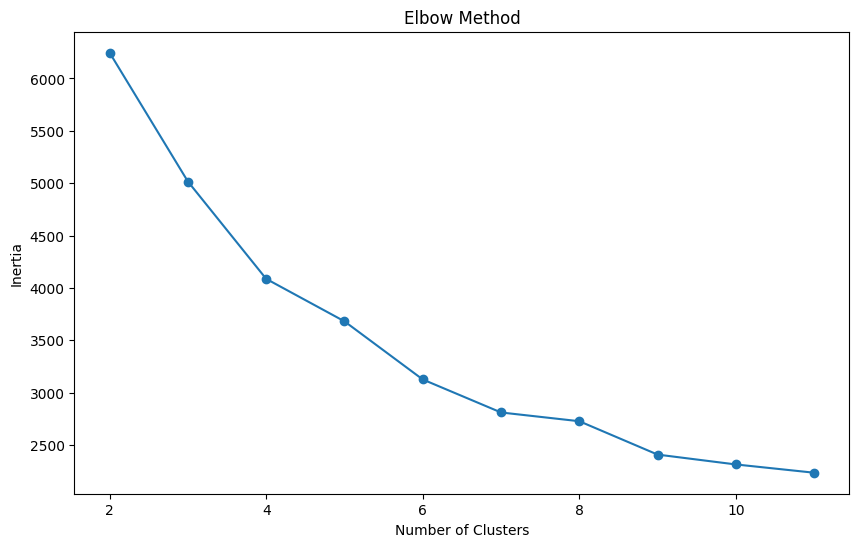

In [177]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# קביעת מספר קלאסטרים
inertia = []
silhouette_scores = []

for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_df, labels))

# הצגת Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 12), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [179]:
# עבור KMeans, בחר K האופטימלי שמצאת
optimal_k = 6  # לדוגמה, נניח ש-K אופטימלי הוא 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

## DBSCAN

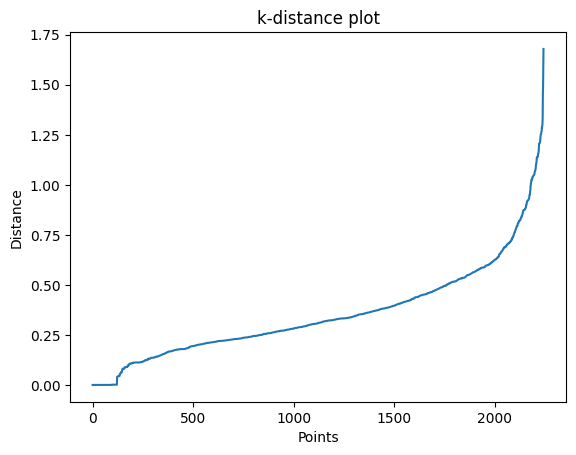

DBSCAN with eps=0.1 and min_samples=5 -> Number of clusters: 92, Noise points: 1531
DBSCAN with eps=0.1 and min_samples=10 -> Number of clusters: 16, Noise points: 2042
DBSCAN with eps=0.1 and min_samples=20 -> Number of clusters: 1, Noise points: 2222
DBSCAN with eps=0.3 and min_samples=5 -> Number of clusters: 62, Noise points: 477
DBSCAN with eps=0.3 and min_samples=10 -> Number of clusters: 41, Noise points: 845
DBSCAN with eps=0.3 and min_samples=20 -> Number of clusters: 13, Noise points: 1561
DBSCAN with eps=0.5 and min_samples=5 -> Number of clusters: 27, Noise points: 152
DBSCAN with eps=0.5 and min_samples=10 -> Number of clusters: 21, Noise points: 283
DBSCAN with eps=0.5 and min_samples=20 -> Number of clusters: 12, Noise points: 590
DBSCAN with eps=0.7 and min_samples=5 -> Number of clusters: 12, Noise points: 53
DBSCAN with eps=0.7 and min_samples=10 -> Number of clusters: 9, Noise points: 88
DBSCAN with eps=0.7 and min_samples=20 -> Number of clusters: 5, Noise points: 2

In [180]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# חישוב המרחקים הכי קרובים
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(scaled_df)
distances, indices = neighbors_fit.kneighbors(scaled_df)

# גרף k-distance
distances = np.sort(distances[:, -1], axis=0)
plt.plot(distances)
plt.title('k-distance plot')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

# ניסוי עם DBSCAN - קביעת הערכים של eps ו-min_samples
eps_values = [0.1, 0.3, 0.5, 0.7, 1.0]  # ניסוי עם ערכים שונים של eps
min_samples_values = [5, 10, 20]  # ניסוי עם ערכים שונים של min_samples

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(scaled_df)
        
        # חישוב מספר הקלאסטרים (הסרת ה-noise points)
        unique_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        noise_points = list(dbscan_labels).count(-1)  # ספירת נקודות ה-noise
        
        print(f"DBSCAN with eps={eps} and min_samples={min_samples} -> "
              f"Number of clusters: {unique_clusters}, Noise points: {noise_points}")


In [182]:
# DBSCAN עם eps=0.7 ו-min_samples=10
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df)

# חישוב מספר הקלאסטרים (הסרת נקודות רעש)
unique_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
noise_points = list(dbscan_labels).count(-1)  # ספירת נקודות רעש

# הדפסת תוצאות
print(f"DBSCAN with eps=0.7 and min_samples=10 -> Number of clusters: {unique_clusters}, Noise points: {noise_points}")


DBSCAN with eps=0.7 and min_samples=10 -> Number of clusters: 4, Noise points: 7


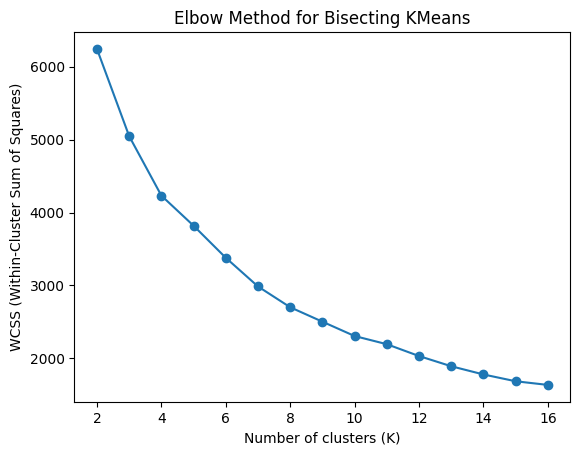

In [184]:
import matplotlib.pyplot as plt
from sklearn.cluster import BisectingKMeans

# יצירת סדרת ערכים שונים של K
k_values = range(2, 17)  # נניח מ-2 עד 10 קלאסטרים

wcss = []  # רשימה לשמירת ערכי WCSS

# חישוב WCSS עבור כל ערך של K
for k in k_values:
    bkm = BisectingKMeans(n_clusters=k, random_state=42)
    bkm.fit(scaled_df)
    wcss.append(bkm.inertia_)

# יצירת גרף Elbow
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Bisecting KMeans')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


In [185]:
from sklearn.cluster import BisectingKMeans

# Bisecting KMeans
bkm = BisectingKMeans(n_clusters=4, random_state=42)
bkm_labels = bkm.fit_predict(scaled_df)

# הדפסת תוצאות
print(f'Clusters formed by Bisecting KMeans: {len(set(bkm_labels))}')


Clusters formed by Bisecting KMeans: 4


n_clusters=2, Silhouette Score=0.2889, Calinski-Harabasz Score=942.50
n_clusters=3, Silhouette Score=0.2668, Calinski-Harabasz Score=817.85
n_clusters=4, Silhouette Score=0.2826, Calinski-Harabasz Score=779.12
n_clusters=5, Silhouette Score=0.2812, Calinski-Harabasz Score=737.94
n_clusters=6, Silhouette Score=0.2888, Calinski-Harabasz Score=747.93
n_clusters=7, Silhouette Score=0.2798, Calinski-Harabasz Score=740.34
n_clusters=8, Silhouette Score=0.2963, Calinski-Harabasz Score=733.91
n_clusters=9, Silhouette Score=0.2938, Calinski-Harabasz Score=730.38
n_clusters=10, Silhouette Score=0.3071, Calinski-Harabasz Score=708.83
n_clusters=11, Silhouette Score=0.2907, Calinski-Harabasz Score=691.04
n_clusters=12, Silhouette Score=0.2938, Calinski-Harabasz Score=677.15
n_clusters=13, Silhouette Score=0.2968, Calinski-Harabasz Score=668.83
n_clusters=14, Silhouette Score=0.3010, Calinski-Harabasz Score=666.92


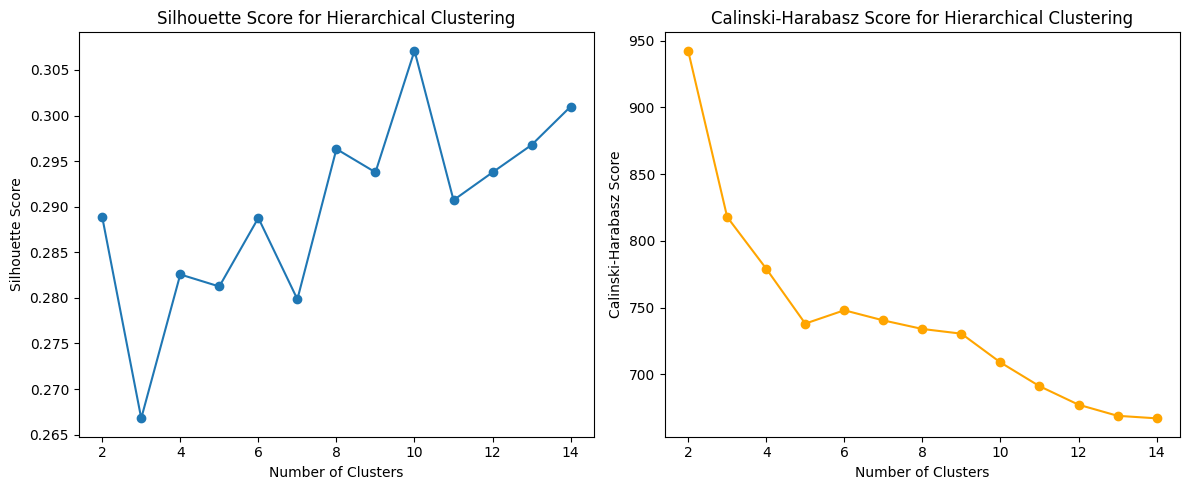

In [188]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# הגדרת טווח מספר אשכולות
range_n_clusters = range(2, 15)

# שמירת מדדים
silhouette_scores = []
calinski_scores = []

# הרצה עבור כל מספר אשכולות
for n_clusters in range_n_clusters:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = hierarchical_clustering.fit_predict(scaled_df)
    
    # מדידת Silhouette ו-Calinski-Harabasz
    silhouette = silhouette_score(scaled_df, labels)
    calinski = calinski_harabasz_score(scaled_df, labels)
    
    silhouette_scores.append(silhouette)
    calinski_scores.append(calinski)
    print(f"n_clusters={n_clusters}, Silhouette Score={silhouette:.4f}, Calinski-Harabasz Score={calinski:.2f}")

# ויזואליזציה של המדדים
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, calinski_scores, marker='o', color='orange')
plt.title('Calinski-Harabasz Score for Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.show()



In [252]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical Clustering (Agglomerative)
hc = AgglomerativeClustering(n_clusters=10, linkage='ward')  # ניתן לשנות את n_clusters לפי בחירה
hc_labels = hc.fit_predict(scaled_df)

# הדפסת תוצאות
print(f'Clusters formed by Hierarchical Clustering: {len(set(hc_labels))}')


Clusters formed by Hierarchical Clustering: 10


In [251]:
from sklearn.metrics import calinski_harabasz_score

# חישוב מדדי איכות
kmeans_silhouette = silhouette_score(scaled_df, kmeans_labels)
dbscan_silhouette = silhouette_score(scaled_df, dbscan_labels) if len(set(dbscan_labels)) > 1 else 'N/A'
bkm_silhouette = silhouette_score(scaled_df, bkm_labels)
hc_silhouette = silhouette_score(scaled_df, hc_labels) if len(set(hc_labels)) > 1 else 'N/A'

print("Silhouette Scores:")
print(f"KMeans: {kmeans_silhouette}")
print(f"DBSCAN: {dbscan_silhouette}")
print(f"Bisecting KMeans: {bkm_silhouette}")
print(f"Hierarchical Clustering: {hc_silhouette}")

print("\nCalinski-Harabasz Scores:")
print(f"KMeans: {calinski_harabasz_score(scaled_df, kmeans_labels)}")
print(f"Bisecting KMeans: {calinski_harabasz_score(scaled_df, bkm_labels)}")
print(f"Hierarchical Clustering: {calinski_harabasz_score(scaled_df, hc_labels)}")


Silhouette Scores:
KMeans: 0.4589778507227033
DBSCAN: -0.0697145091737136
Bisecting KMeans: 0.23412985152021307
Hierarchical Clustering: 0.3036092525081479

Calinski-Harabasz Scores:
KMeans: 1699.1083855314057
Bisecting KMeans: 484.86142830084555
Hierarchical Clustering: 737.6620185583918


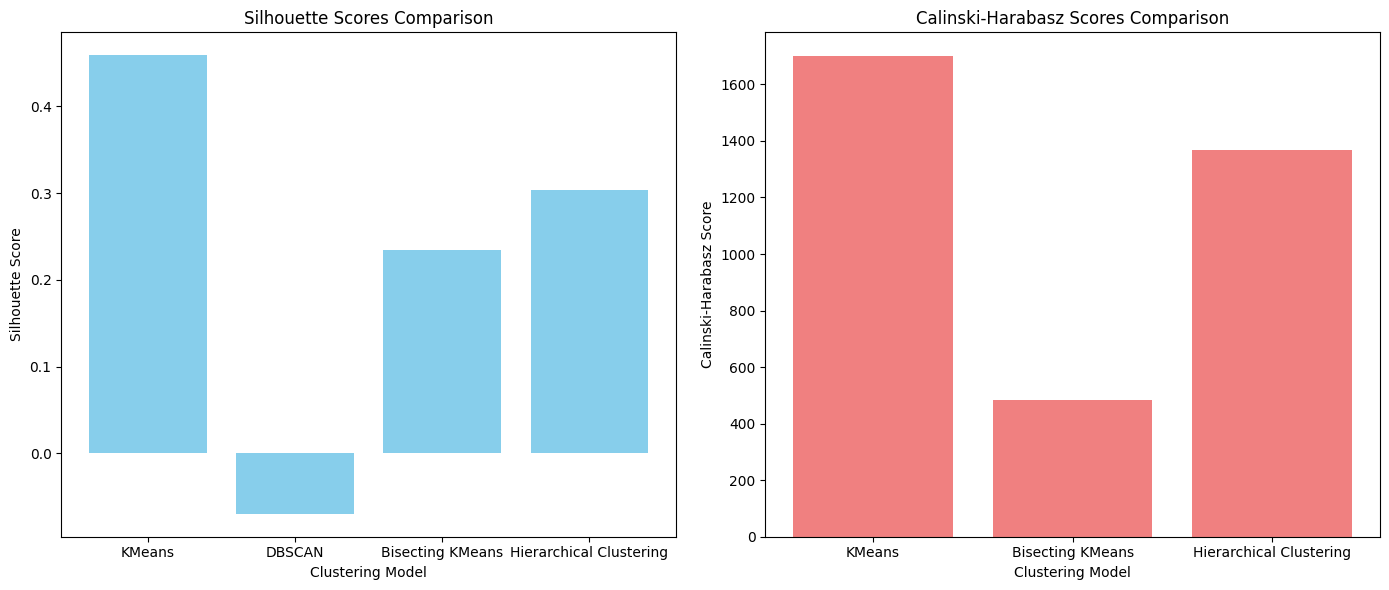

In [253]:
import matplotlib.pyplot as plt
import numpy as np

# מדדים עבור כל מודל
silhouette_scores = {
    "KMeans": kmeans_silhouette,
    "DBSCAN": dbscan_silhouette,
    "Bisecting KMeans": bkm_silhouette,
    "Hierarchical Clustering": hc_silhouette
}

calinski_scores = {
    "KMeans": calinski_harabasz_score(scaled_df, kmeans_labels),
    "Bisecting KMeans": calinski_harabasz_score(scaled_df, bkm_labels),
    "Hierarchical Clustering": calinski_harabasz_score(scaled_df, hc_labels)
}

# יצירת גרף עמודות עבור Silhouette Score
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# גרף עבור Silhouette Score
ax[0].bar(silhouette_scores.keys(), silhouette_scores.values(), color='skyblue')
ax[0].set_title('Silhouette Scores Comparison')
ax[0].set_xlabel('Clustering Model')
ax[0].set_ylabel('Silhouette Score')

# גרף עבור Calinski-Harabasz Score
ax[1].bar(calinski_scores.keys(), calinski_scores.values(), color='lightcoral')
ax[1].set_title('Calinski-Harabasz Scores Comparison')
ax[1].set_xlabel('Clustering Model')
ax[1].set_ylabel('Calinski-Harabasz Score')

# שמירת התמונה כקובץ PNG
plt.tight_layout()
plt.savefig('clustering_comparison.png', dpi=300)

# הצגת התמונה
plt.show()




## Silhouette Scores and Calinski:
Silhouette Scores:
KMeans: 0.4589778507227033
DBSCAN: -0.0697145091737136
Bisecting KMeans: 0.23412985152021307
Hierarchical Clustering: 0.3036092525081479

Calinski-Harabasz Scores:
KMeans: 1699.1083855314057
Bisecting KMeans: 484.86142830084555
Hierarchical Clustering: 737.6620185583918

from the results i will choose Kmeans because in the shilouette he is almost the best but in the Calinski he is the best

In [217]:
import pandas as pd
from sklearn.preprocessing import StandardScaler



# החזרת הנתונים לערכים המקוריים
original_data = scaler.inverse_transform(scaled_df.drop('Cluster',axis=1))
original_data = pd.DataFrame(original_data, columns=scaled_df.drop('Cluster',axis=1).columns)
original_data['Cluster']=scaled_df['Cluster']

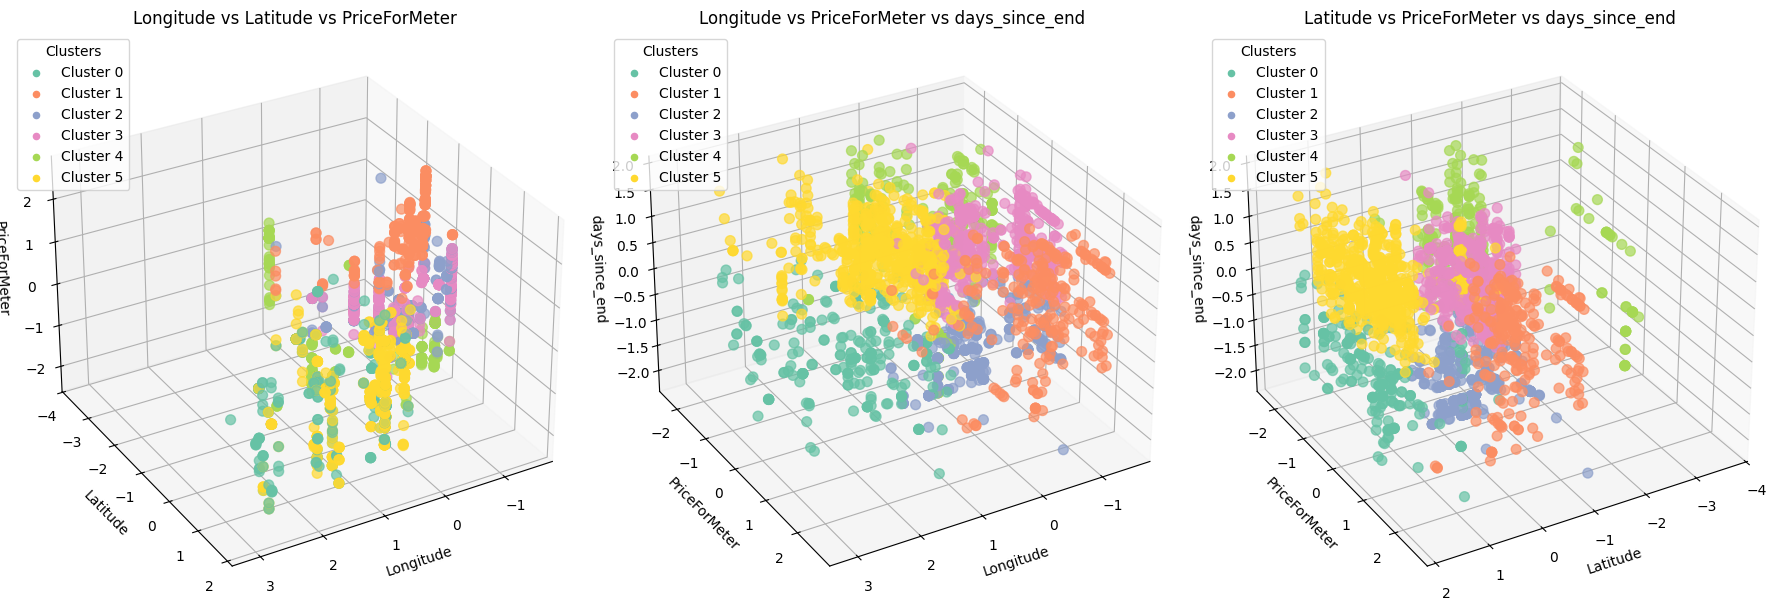

C:\Users\admin\AppData\Local\Temp\ipykernel_18496\393834022.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=column, data=original_data, palette=palette)
C:\Users\admin\AppData\Local\Temp\ipykernel_18496\393834022.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=column, data=original_data, palette=palette)


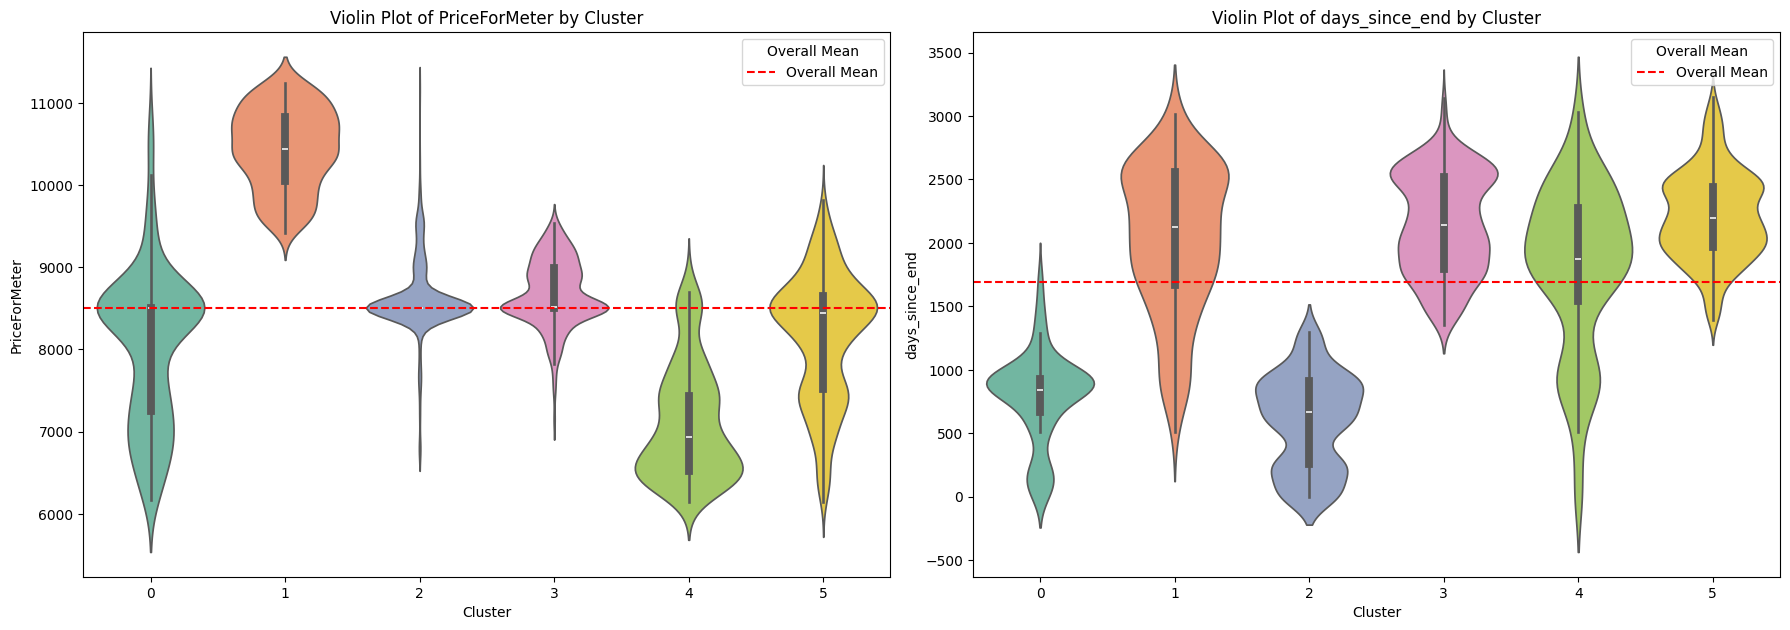

In [248]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import folium
import matplotlib.colors as mcolors
from branca.element import Template, MacroElement
import numpy as np

# יצירת פלטת צבעים אחידה לכל הקלאסטרים (6 צבעים)
palette = sns.color_palette("Set2", n_colors=6)  # 6 צבעים ברורים
cluster_colors = {cluster: palette[i] for i, cluster in enumerate(np.unique(kmeans_labels))}

# הוספת עמודת הקלאסטרים לדאטה
scaled_df['Cluster'] = kmeans_labels  # החלף עם labels של המודל שבחרת

# 1. יצירת גרפי 3D (תלת-ממדיים)
combinations = [
    ('Longitude', 'Latitude', 'PriceForMeter'),
    ('Longitude', 'PriceForMeter', 'days_since_end'),
    ('Latitude', 'PriceForMeter', 'days_since_end')
]

fig = plt.figure(figsize=(18, 6))

for i, (x, y, z) in enumerate(combinations):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    
    # הצגת נתוני הקלאסטרים עם צבעים תואמים לפלטה
    scatter = ax.scatter(scaled_df[x], scaled_df[y], scaled_df[z], 
                         c=scaled_df['Cluster'].map(cluster_colors), s=50, alpha=0.7)
    
    # הוספת תוויות לכל ציר
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    ax.set_title(f'{x} vs {y} vs {z}')
    
    # הוספת מקרא צבעים (לגנד) בתוך הגרף
    for cluster in np.unique(scaled_df['Cluster']):
        ax.scatter([], [], [], c=[cluster_colors[cluster]], label=f'Cluster {cluster}')
    
    ax.legend(title='Clusters', loc='upper left')
    
    # התאם את המיקום של תוויות הצירים אם הן חותכות
    ax.view_init(elev=30, azim=60)  # שים לב שהזווית יכולה להשתנות בהתאמה
    
    # שמירה של הגרף כקובץ PNG
    plt.savefig(f'{x}_vs_{y}_vs_{z}.png', bbox_inches='tight')  # תיקון שם הקובץ

plt.tight_layout()
plt.show()


# 2. יצירת גרפי Violin Plot עם ממוצע כללי לכל עמודה ולקלאסטרים
columns_to_plot = ['PriceForMeter', 'days_since_end']  # רשימת העמודות שאתה רוצה להציג
plt.figure(figsize=(18, 12))

for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 2, i + 1)  # פיצול לגרפים שונים בתוך תרשים אחד
    sns.violinplot(x='Cluster', y=column, data=original_data, palette=palette)
    
    # חישוב הממוצע הכללי של העמודה
    overall_mean = original_data[column].mean()

    # הוספת קו אופקי של הממוצע הכללי
    plt.axhline(y=overall_mean, color='red', linestyle='--', label=f'Overall Mean')

    # הוספת כותרת לגרף
    plt.title(f'Violin Plot of {column} by Cluster')
    plt.legend(title='Overall Mean', loc='upper right')
    plt.savefig(f'violin_plot_{column}.png', bbox_inches='tight')

plt.tight_layout()
plt.show()


# 3. יצירת המפה
map = folium.Map(location=[31.7683, 35.2137], zoom_start=8)

# הוספת הנקודות על המפה עם הצבעים המתאימים לכל קלאסטר
for index, row in original_data.iterrows():
    color = cluster_colors[row['Cluster']]  # שימוש בצבע לפי הקלאסטר

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=8,
        color=mcolors.to_hex(color),  # המרת צבע לקוד Hex
        fill=True,
        fill_color=mcolors.to_hex(color),  # הצבע פנימי של העיגול
        fill_opacity=0.6
    ).add_to(map)

# הוספת מקרא צבעים למפה
legend_template = """
            {% macro html(this, kwargs) %}
                <div style="position: fixed; 
                            bottom: 50px; left: 50px; width: 150px; height: 200px; 
                            background-color: white; border:2px solid grey; z-index:9999;
                            font-size: 12px;">
                    <div style="text-align: center; font-weight: bold; padding: 5px;">Cluster Legend</div>
                    <div style="padding: 5px;">
                        {% for i in range(6) %}
                            <i style="background: {{ this.colors[i] }}; width: 12px; height: 12px; 
                                      display: inline-block; margin-right: 5px;"></i>
                            Cluster {{ i }}<br>
                        {% endfor %}
                    </div>
                </div>
            {% endmacro %}
        """

# יצירת אובייקט של מקרא עם הצבעים המתאימים לכל קלאסטר
legend = MacroElement()
legend.colors = [mcolors.to_hex(color) for color in palette]  # יצירת הצבעים עבור כל קלאסטר
legend._template = Template(legend_template)
map.get_root().add_child(legend)
# שמירה של המפה כקובץ HTML
map.save('housing_lottery_map.html')

# הצגת המפה
map






# Findings

Cluster 0:
מדובר בהגרלות יחסית עדכניות המאופיינות במחירים ממוצעים ולעיתים נמוכים ביחס לממוצע הממוקמים בעיקר בפריפריית הצפון ובכפרים ערביים מה שיכול להצביע על המחירים הנמוכים יחסית

Cluster 1:
מדובר בקבוצה חריגה מבחינת מחירים גבוהים של הגרלות שבוצעו יחסית מזמן וממוקמות במרכז הארץ מה שרומז על המחירים הגבוהים

Cluster 2:
מדובר על הגרלות עדכניות שבוצעו באיזור המרכז ומאופיינות במחירים מאוד ממוצעים

Cluster 3:
מדובר על קבוצה "מעורבבת" של הגרלות יחסית ישנות הממוקמות החלק מהדרום עד למרכז ומאופיינות במחירים ממוצעים

Cluster 4:
מדובר בקבוצת הגרלות באיזור הדרום שבוצעו בעיקר יחסית מזמן ומאופיינות במחירים נמוכים ביחס לשאר ההגרלות

Cluster 5:
מדובר בקבוצת הגרלות גדולה הממוקמת בעיקר באיזור הצפון ומפאופיינות במחירים ממוצעים-נמוכים במעט משאר ההגרלות


## סיכום והמלצות


1) הגרלות עדכניות מאופיינות במחירים ממוצעים בעיקר
2) הגרלות באיזור הדרום מאופיינות במחירים נמוכים ביחס לשאר אך אין הרבה מידע בנושא
3) הגרלות איזור הצפון ההן בעיקר הגרלות ישנות אך זולות ביחס לשאר ההגרלות
4) קיימת קבוצה "חריגה" של הגרלות "ישנות" ביחס לשאר שהיו ממקומות באיזור המרכז
5) הגרלות עדכניות בצפון הן בעיקר בכפרים ערביים מה שיכול להצביע על כוונה של פיתוח פריפריית הצפון והכפרים הערביים באיזור